In [585]:
"""
EDA - Exploratory Data Analysis
This script performs exploratory data analysis on PPMI's curated dataset, including:
- Data Overview (e.g. head, info)
- Data Cleaning (e.g. Missing Values, Duplicates, Outliers, Consistency)
- Feature Engineering (e.g. One-Hot Encoding, Ordinal Encoding)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 0. Data Overview
> Reference: https://www.ppmi-info.org/

**Dataset**: PPMI (Parkinson's Progression Markers Initiative)

**Core Task**: Exploring the multimodal data for Disease Progression Prediction
- **Subtask 1**: Predict the slope of the MDS-UPDRS / MoCA score
- **Subtask 2**: Predict the time to achieving a Hoehn Yahr stage of 3 or greater
- **Subtask 3**: Joint Modeling of the two subtasks

**Columns Overview**:

**1. ID**
- `SITE`: Blinded Site ID.
- `PATNO`: Participant ID.
- `COHORT`: Cohort at Enrollment (PD Participant, Healthy Control, SWEDD, or Prodromal).
- `subgroup`: List of Subgroup(s) based on enrollment cohort/subgroup and Genetic Consensus data.
- `analytic_subgroup`: Analytic subgroups for Prodromals enrolled in Phase 2.
- `study_status`: PPMI study status.
- `EVENT_ID`: Clinical Visit Label (e.g., Baseline, annual visits).
- `YEAR`: Visit Year.
- `visit_date`: Month and Year of Clinical Visit.
- `enroll_phase`: Enrollment phase (prior to June 2020 or later).
- `enroll_source`: Indicates whether Prodromal participants were enrolled at a Clinical Site or through PPMI Remote.
- `HIQ_RBD`: Indicator for self-reported RBD diagnosis and/or dream enactment behavior (DEB) in Hyposmics.

**2. Demographics**
- `AFICBERB`: Indicator for African Berber descent.
- `age`: Age at Enrollment.
- `age_at_visit`: Age at Visit.
- `ASHKJEW`: Indicator for Ashkenazi Jewish descent.
- `BASQUE`: Indicator for Basque descent.
- `EDUCYRS`: Years of Education capped at 20.
- `fampd`: Family History of PD - 3 categories.
- `fampd_bin`: Family History of PD - Binary.
- `handed`: Handedness (Right, Left, or Mixed).
- `HISPLAT`: Indicator for Hispanic/Latino ethnicity.
- `howlive`: Gender Identity.
- `race`: Race.
- `SEX`: Sex at birth.
- `sex_orient`: Sexual Orientation.

**3. Genetics**
- `APOE`: APOE genotype.
- `APOE_e4`: Number of E4 alleles in APOE genotype.

**4. Biologics**
- `abeta`: CSF A-beta 1-42 (combined 2016/2021 assays).
- `abeta_LLOD`: Indicates whether CSF A-beta 1-42 test result was below the LOWER limit of detection.
- `abeta_ULOD`: Indicates whether CSF A-beta 1-42 test result was equal to or above the UPPER limit of detection.
- `asyn`: CSF alpha-synuclein (2016 assay).
- `bd_tau_plasma`: BD tTau (plasma) from Biospecimen Project ID 208.
- `ptau`: CSF p-tau (combined 2016/2021 assays).
- `ptau_LLOD`: Indicates whether CSF p-tau test result was equal to or below the LOWER limit of detection.
- `ptau217_plasma`: p217 + Tau (plasma) from Biospecimen Project ID 208.
- `tau`: CSF t-tau (combined 2016/2021 assays).
- `tau_LLOD`: Indicates whether CSF t-tau test result was equal to or below the LOWER limit of detection.
- `urate`: Serum Uric Acid (mg/dL).
- `hemohi`: Indicator of high CSF hemoglobin (2016 assay).
- `total_di_18_1_BMP`: Urine BMP Total di‐18:1 Species.
- `total_di_22_6_BMP`: Urine BMP Total di‐22:6 Species.
- `_2_2__di_22_6_BMP`: Urine BMP 2,2' di-22:6 Species.
- `CSFSAA`: CSF SAA combined results, prioritizing 24hr assay.
- `CSFSAA_assay`: Indicates which assay was used to run the reported CSF SAA result.
- `nfl_csf`: CSF Neurofilament Light.
- `nfl_serum`: Serum Neurofilament Light.

**5. DATSCAN**
- `mia_lowput_expected`: DATSCAN age-/sex-expected lowest putamen ratio, MIAKAT pipeline.
- `MIA_CAUDATE_L`: Left caudate, MIAKAT pipeline.
- `MIA_CAUDATE_R`: Right caudate, MIAKAT pipeline.
- `MIA_CAUDATE_MEAN`: Mean caudate, MIAKAT pipeline.
- `MIA_PUTAMEN_L`: Left putamen, MIAKAT pipeline.
- `MIA_PUTAMEN_R`: Right putamen, MIAKAT pipeline.
- `MIA_PUTAMEN_MEAN`: Mean putamen, MIAKAT pipeline.
- `MIA_STRIATUM_L`: Left striatum, MIAKAT pipeline.
- `MIA_STRIATUM_R`: Right striatum, MIAKAT pipeline.
- `MIA_STRIATUM_MEAN`: Mean striatum, MIAKAT pipeline.

**6. Clinical**
- `agediag`: Age at PD Diagnosis.
- `ageonset`: Age at PD Symptom Onset.
- `age_LP`: Age at Lumbar Puncture.
- `age_DATSCAN`: Age at DATSCAN.
- `age_upsit`: Age at UPSIT.
- `bjlot`: Benton Judgement of Line Orientation Score.
- `BMI`: Body Mass Index.
- `clockdraw`: Total Clock Drawing Score.
- `cogstate`: Investigator Diagnosis of Cognitive State.
- `DOMSIDE`: Side most affected at PD symptom onset.
- `duration`: Duration from PD Diagnosis to Enrollment (Months).
- `duration_yrs`: Duration from PD Diagnosis to Enrollment (Years).
- `DVT_CLCKDRAW`: Clock Drawing Test t-score (age-corrected).
- `DVZ_CLCKDRAW`: Clock Drawing Test Z-score (age-corrected).
- `DVT_TOTAL_RECALL`: HVLT Immediate/Total Recall t-score.
- `DVT_DELAYED_RECALL`: HVLT Delayed Recall t-score.
- `DVT_RETENTION`: HVLT Retention t-score.
- `DVT_RECOG_DISC_INDEX`: HVLT Discrimination Recognition Index t-score.
- `DVS_FAS`: Lexical Fluency letter (FAS) Scaled Score.
- `DVT_FAS`: Lexical Fluency letter (FAS) t-score (age- and education-corrected).
- `DVS_JLO_MSSA`: Benton Judgment of Line Orientation MOANS Scaled Score (age-corrected).
- `DVS_JLO_MSSAE`: Benton Judgment of Line Orientation MOANS Scaled Score (age- and education-corrected).
- `DVS_LNS`: Letter Number Sequencing Scaled Score (age-corrected).
- `DVS_BNT`: Boston Naming Test Scaled Score (age- and education-corrected).
- `PCTL_BNT`: Boston Naming Test Percentile (age- and education-corrected).
- `DVSD_SDM`: Symbol Digit Modalities Test normed SD (age- and education-corrected).
- `DVT_SDM`: Symbol Digit Modalities Test t-score (age- and education-corrected).
- `DVS_SFTANIM`: Semantic Fluency (Animal) Scaled Score.
- `DVT_SFTANIM`: Semantic Fluency (Animal) t-score (age- and education-corrected).
- `DVZ_TMTA`: Trail Making Test A reversed Z-score (age- and education-corrected).
- `DVZ_TMTB`: Trail Making Test B reversed Z-score (age- and education-corrected).
- `ess`: Epworth Sleepiness Scale Score.
- `gds`: Geriatric Depression Scale Score.
- `hvlt_discrimination`: HVLT Discrimination Recognition Index.
- `hvlt_immediaterecall`: HVLT Immediate/Total Recall.
- `hvlt_retention`: HVLT Retention.
- `HVLTFPRL`: HVLT False Alarms.
- `HVLTRDLY`: HVLT Delayed Recall.
- `HVLTREC`: HVLT Delayed Recognition.
- `hy`: Reclassified Hoehn & Yahr Stage (includes OFF and untreated scores).
- `hy_on`: Reclassified Hoehn & Yahr Stage (includes ON and untreated scores).
- `NHY`: Hoehn & Yahr Stage (includes OFF and untreated scores).
- `NHY_ON`: Hoehn & Yahr Stage (includes ON and untreated scores).
- `LEDD`: Total Levodopa Equivalent Daily Dose.
- `lexical`: Lexical Fluency letter (FAS) Score.
- `lns`: Letter Number Sequencing Score.
- `MCI_testscores`: Indicator for mild-cognitive impairment (MCI) based on cognitive test scores.
- `moca`: Montreal Cognitive Assessment (MoCA) Score (adjusted for education).
- `MODBNT`: Modified Boston Naming Test Score.
- `MSEADLG`: Modified Schwab & England Activities of Daily Living Score.
- `NP1ANXS`: MDS-UPDRS Part I Anxious Mood.
- `NP1APAT`: MDS-UPDRS Part I Apathy.
- `NP1COG`: MDS-UPDRS Part I Cognitive Impairment.
- `NP1DDS`: MDS-UPDRS Part I Features of Dopamine Dysregulation Syndrome.
- `NP1DPRS`: MDS-UPDRS Part I Depressed Mood.
- `NP1FATG`: MDS-UPDRS Part I Fatigue.
- `NP1HALL`: MDS-UPDRS Part I Hallucinations and Psychosis.
- `orthostasis`: Indicator of whether systolic blood pressure change is ≥ 20 OR diastolic blood pressure change is ≥ 10.
- `OTHNEURO`: Comment for most likely Primary Diagnosis = "Other".
- `PDTRTMNT`: Is the participant on dopaminergic medication or receiving deep brain stimulation?
- `pigd`: PIGD OFF score (includes OFF and untreated scores).
- `pigd_on`: PIGD ON score (includes ON and untreated scores).
- `PRIMDIAG`: Most likely Primary Diagnosis.
- `quip`: Questionnaire for Impulsive-Compulsive Disorders in PD (QUIP) Score.
- `quip_any`: Any QUIP disorder.
- `quip_buy`: QUIP disorder - Buying.
- `quip_eat`: QUIP disorder - Eating.
- `quip_gamble`: QUIP disorder - Gambling.
- `quip_hobby`: QUIP disorder - Hobbies.
- `quip_pund`: QUIP disorder - Punding.
- `quip_sex`: QUIP disorder - Sex.
- `quip_walk`: QUIP disorder - Walking or Driving.
- `rem`: REM Sleep Behavior Disorder Screening Questionnaire (RBDSQ) total score.
- `scopa`: SCOPA-AUT Total Score.
- `scopa_cv`: SCOPA-AUT Cardiovascular Sub-score.
- `scopa_gi`: SCOPA-AUT Gastrointestinal (GI) Sub-score.
- `scopa_pm`: SCOPA-AUT Pupillomotor Sub-score.
- `scopa_sex`: SCOPA-AUT Sexual Dysfunction Sub-score.
- `scopa_therm`: SCOPA-AUT Thermoregulatory Sub-score.
- `scopa_ur`: SCOPA-AUT Urinary Sub-score.
- `SDMTOTAL`: Symbol Digit Modalities Score.
- `stai`: State-Trait Anxiety Index (STAI) Total Score.
- `stai_state`: STAI State Sub-score.
- `stai_trait`: STAI Trait Sub-score.
- `sym_tremor`: Initial symptom (at diagnosis) - Resting Tremor.
- `sym_rigid`: Initial symptom (at diagnosis) - Rigidity.
- `sym_brady`: Initial symptom (at diagnosis) - Bradykinesia.
- `sym_posins`: Initial symptom (at diagnosis) - Postural Instability.
- `sym_other`: Initial symptom (at diagnosis) - Other.
- `sym_unknown`: Missing initial symptoms.
- `td_pigd`: TD/PIGD classification OFF - 2 categories.
- `td_pigd_on`: TD/PIGD classification ON - 2 categories.
- `TMT_A`: Time (in seconds) to complete Trail Making Test - A.
- `TMT_B`: Time (in seconds) to complete Trail Making Test - B.
- `updrs1_score`: MDS-UPDRS Part I Score.
- `updrs2_score`: MDS-UPDRS Part II Score.
- `updrs3_score`: MDS-UPDRS Part III Score OFF (includes OFF and untreated scores).
- `updrs3_score_on`: MDS-UPDRS Part III Score ON (includes ON and untreated scores).
- `updrs4_score`: MDS-UPDRS Part IV Score.
- `updrs_totscore`: MDS-UPDRS Total Score OFF (includes OFF and untreated scores).
- `updrs_totscore_on`: MDS-UPDRS Total Score ON (includes ON and untreated scores).
- `upsit`: UPSIT Raw Score.
- `upsit_pctl`: UPSIT Age-/Sex-Adjusted Percentile.
- `upsit_pctl15`: Indicates whether UPSIT percentile is ≤ 15%.
- `VLTANIM`: Semantic Fluency (Animal) Score.

**7. Milestones**
- `pm_adl_any`: Progression Milestones - Indicator for any activities of daily living milestone.
- `pm_any`: Progression Milestones - Indicator for any milestone (any domain).
- `pm_auto_any`: Progression Milestones - Indicator for any autonomic dysfunction milestone.
- `pm_cog_any`: Progression Milestones - Indicator for any cognition milestone.
- `pm_fd_any`: Progression Milestones - Indicator for any functional dependence milestone.
- `pm_mc_any`: Progression Milestones - Indicator for any motor complications milestone.
- `pm_wb_any`: Progression Milestones - Indicator for any walking and balance milestone.

**8. NSD-ISS (Neuronal α-Synuclein Disease - Integrated Staging System)**
- `NSD_Status`: Indicator for neuronal α-synuclein disease, as measured by any validated biomarker of n-αsyn pathology.
- `NSD_STAGE`: Neuronal α-synuclein disease stage.
- `Stage_partial_UPDRS1`: Modified MDS-UPDRS-I score excluding item 1.1.
- `Stage_Subpark`: Subthreshold Parkinsonism score - modified MDS-UPDRS-III OFF score excluding items 3.15a, 3.15b, 3.16a, 3.16b.
- `Stage_PDTreat`: Indicates PD treatment status at visit based on PD medication use and/or presence of DBS.
- `Stage_S`: Subject-level α-syn SAA status.
- `Stage_D`: Visit-level DAT SBR status - indicates whether age/sex-expected DaT ratio is < 0.75.
- `Stage_G`: Subject-level genetic status (applies to SAA-negative participants only).

**Basic EDA Questions**
> Applied to both Curated Dataset and Curated Dataset (Partient)
1. **Correctness of Data**: 
    - Will `race` be different for the same `PATNO` across different visits?
    - Will `SEX` be different for the same `PATNO` across different visits?
    - Will `EVENT_ID` mismatch with `YEAR` for the same `PATNO`?
    - Will `YEAR` and `EVENT_ID` be continuous for the same `PATNO` across visits (e.g. Year 0, Year 1, Year 2, etc.)?
2. **Distribution of Data**: 
   - How are the demographics (e.g. `SEX`, `race`, `age`, `EDUCYRS`) distributed across dataset?
   - What is the distribution of clinical scores such as `updrs3_score`, `hy` across dataset?
3. **Missing Values**: 
   - How many missing values are there in each column?
   - Are there patterns in the missing data (e.g., is it more common in certain cohorts or visits)?
4. **Duplicates**: Are there any duplicate entries for the same `PATNO` and `EVENT_ID`?
5. **Outliers**:  
   - How do we define and detect outliers in this dataset?
   - Are there any outliers in clinical scores such as `updrs3_score`, `hy`, etc.?


In [586]:
# Data Loading
data_path = './data/'
curated_path = 'origin_data_curated_cut_20250714.xlsx'
curated_df = pd.read_excel(data_path + curated_path)
curated_df.columns = curated_df.columns.str.lower()
# Get Patient DataFrame (have baseline data)
baseline_patnos = curated_df[curated_df['year'] == 0]['patno'].unique()
curated_patient_df = curated_df[(curated_df['cohort'] == 1) & (~curated_df['event_id'].isin(['ST', 'PW'])) & (curated_df['patno'].isin(baseline_patnos))]
# Get Patient Baseline DataFrame
curated_patient_baseline_df = curated_patient_df[curated_patient_df['year'] == 0]

# Data Overview
print("For Curated Dataset:")
print(f"Unique PATNOs in curated_df: {len(curated_df['patno'].unique())}")
print(f"Shape of curated_df: {curated_df.shape}")
print()
print("For Curated Patient Dataset (have baseline data):")
print(f"Unique PATNOs in curated_patient_df: {len(curated_patient_df['patno'].unique())}")
print(f"Shape of curated_patient_df: {curated_patient_df.shape}")
print()
print("For Curated Patient Baseline Dataset:")
print(f"Unique PATNOs in curated_patient_baseline_df: {len(curated_patient_baseline_df['patno'].unique())}")
print(f"Shape of curated_patient_baseline_df: {curated_patient_baseline_df.shape}")

For Curated Dataset:
Unique PATNOs in curated_df: 4115
Shape of curated_df: (16126, 177)

For Curated Patient Dataset (have baseline data):
Unique PATNOs in curated_patient_df: 1454
Shape of curated_patient_df: (7276, 177)

For Curated Patient Baseline Dataset:
Unique PATNOs in curated_patient_baseline_df: 1454
Shape of curated_patient_baseline_df: (1454, 177)


In [587]:
aseg_vol_path = 'origin_data_mri_ASEG_VOL_20250129.csv'
aseg_vol_df = pd.read_csv(data_path + aseg_vol_path)
# Small case
aseg_vol_df.columns = aseg_vol_df.columns.str.lower()
# aseg_vol_df.head()
# Merged Dataset
curated_patient_baseline_df.merge(aseg_vol_df, on='patno', how='inner').shape

(779, 242)

In [588]:
print(curated_df[(curated_df['event_id'] == 'BL')]['cohort'].value_counts())

cohort
4    2262
1    1454
2     335
3      64
Name: count, dtype: int64


In [589]:
# Data Overview - Head
curated_patient_baseline_df.head()

site   patno  cohort     subgroup  enroll_phase enroll_source  \
0     19  100001       1  Sporadic PD             2           NaN   
5     33  100002       1  Sporadic PD             2           NaN   
10    33  100005       1  Sporadic PD             2           NaN   
14    33  100006       1  Sporadic PD             2           NaN   
19    33  100007       1  Sporadic PD             2           NaN   

   analytic_subgroup  hiq_rbd study_status  nsd_status nsd_stage  primdiag  \
0                NaN      NaN       Active         1.0         3       1.0   
5                NaN      NaN       Active         1.0         3       1.0   
10               NaN      NaN       Active         1.0        2b       1.0   
14               NaN      NaN       Active         1.0         3       1.0   
19               NaN      NaN       Active         1.0         3       1.0   

   othneuro event_id  year visit_date        age  age_at_visit  sex  educyrs  \
0       NaN       BL     0    10/2020  67.386301     67.386301    1     16.0   
5       NaN       BL     0    10/2020  58.517808     58.517808    1     18.0   
10      NaN       BL     0    01/2021  52.791781     52.791781    1     18.0   
14      NaN       BL     0    12/2020  55.657534     55.657534    0     15.0   
19      NaN       BL     0    12/2020  67.243836     67.243836    1     19.0   

    race  hisplat  ashkjew  aficberb  basque  fampd  fampd_bin  handed  \
0    1.0      0.0      0.0       0.0     0.0    2.0        1.0     1.0   
5    1.0      0.0      0.0       0.0     0.0    2.0        1.0     1.0   
10   1.0      0.0      0.0       0.0     0.0    1.0        1.0     1.0   
14   1.0      0.0      0.0       0.0     0.0    2.0        1.0     1.0   
19   1.0      0.0      0.0       0.0     0.0    3.0        2.0     1.0   

    howlive  sex_orient        bmi    agediag   ageonset   duration  \
0       NaN         NaN  24.615211  66.326027  62.323288  12.733333   
5       NaN         NaN  29.916898  58.301370  57.958904   2.600000   
10      NaN         NaN  23.054562  51.235616  50.805479  18.633333   
14      NaN         NaN  34.792046  53.317808  51.863014  28.066667   
19      NaN         NaN  24.391059  64.468493  64.468493  33.266667   

    duration_yrs  domside  sym_tremor  sym_rigid  sym_brady  sym_posins  \
0       1.060274      1.0         0.0        1.0        1.0         0.0   
5       0.216438      2.0         1.0        1.0        1.0         0.0   
10      1.556164      2.0         1.0        1.0        1.0         0.0   
14      2.339726      2.0         1.0        1.0        1.0         0.0   
19      2.775342      2.0         0.0        1.0        1.0         0.0   

    sym_other  sym_unknown  pdtrtmnt  ledd  age_datscan     age_lp  age_upsit  \
0         0.0          0.0       0.0   0.0    67.306849  67.386301  67.386301   
5         0.0          0.0       0.0   0.0    58.405479  58.517808        NaN   
10        0.0          0.0       0.0   0.0    52.600000  52.791781  52.791781   
14        0.0          0.0       0.0   0.0    55.561644  55.657534  55.657534   
19        0.0          0.0       0.0   0.0    67.164384  67.243836        NaN   

    upsit  upsit_pctl  upsit_pctl15  moca  bjlot  dvs_jlo_mssa  dvs_jlo_mssae  \
0    27.0        17.5           0.0  26.0   13.0          13.0          12.16   
5     NaN         NaN           NaN  26.0   15.0          16.0          15.00   
10   35.0        45.0           0.0  28.0   13.0          13.0          11.70   
14   24.0         5.0           1.0  29.0   14.0          14.0          13.49   
19    NaN         NaN           NaN  25.0   12.0          12.0          10.37   

    clockdraw  dvt_clckdraw  dvz_clckdraw  hvlt_discrimination  \
0         5.0         47.99         -0.20                  1.0   
5         6.0         60.30          1.03                  7.0   
10        7.0         72.62          2.26                  9.0   
14        7.0         72.62          2.26                 11.0   
19        7.

In [590]:
# Data Overview - Info
curated_patient_baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1454 entries, 0 to 16038
Columns: 177 entries, site to stage_g
dtypes: float64(161), int64(6), object(10)
memory usage: 2.0+ MB


# 1. Correctness of Data
> This check will applied to the curated_patient_df (which includes curated_patient_baseline_df)

**1 - Q1:** Will `race` be different for the same `PATNO` across different visits?

In [591]:
race_consistency = curated_patient_df.groupby('patno')['race'].nunique() > 1
inconsistent_patnos = race_consistency[race_consistency].index
print(f"Number of PATNOs with inconsistent race values: {len(inconsistent_patnos)}")
if len(inconsistent_patnos) > 0:
    print(f"PATNOs with inconsistent race values: {inconsistent_patnos.tolist()}")
    # Show examples of inconsistent data
    for patno in inconsistent_patnos[:5]:  # Show first 5 examples
        print(f"\nPATNO {patno}:")
        print(curated_patient_df[curated_patient_df['patno'] == patno][['patno', 'event_id', 'race']].drop_duplicates())
else:
    print("All PATNOs have consistent race values across visits.")

Number of PATNOs with inconsistent race values: 0
All PATNOs have consistent race values across visits.


**1 - Q2:** Will `SEX` be different for the same `PATNO` across different visits?

In [592]:
sex_consistency = curated_patient_df.groupby('patno')['sex'].nunique() > 1
inconsistent_patnos = sex_consistency[sex_consistency].index
print(f"Number of PATNOs with inconsistent SEX values: {len(inconsistent_patnos)}")
if len(inconsistent_patnos) > 0:
    print(f"PATNOs with inconsistent SEX values: {inconsistent_patnos.tolist()}")
    # Show examples of inconsistent data
    for patno in inconsistent_patnos[:5]:  # Show first 5 examples
        print(f"\nPATNO {patno}:")
        print(curated_patient_df[curated_patient_df['patno'] == patno][['patno', 'event_id', 'sex']].drop_duplicates())
else:
    print("All PATNOs have consistent SEX values across visits.")


Number of PATNOs with inconsistent SEX values: 0
All PATNOs have consistent SEX values across visits.


**1 - Q3:** Will `EVENT_ID` mismatch with `YEAR` for the same `PATNO`?

In [593]:
curated_patient_df['event_id'].value_counts().sort_index(ascending=False)

event_id
V21      14
V20      77
V19     166
V18     183
V17     223
V16     211
V15     247
V14     356
V13     401
V12     489
V10     555
V08     721
V06     932
V04    1247
BL     1454
Name: count, dtype: int64

In [594]:
    # First, let's see the unique combinations of EVENT_ID and YEAR
print("Unique EVENT_ID and YEAR combinations:")
event_year_combos = curated_patient_df[['event_id', 'year']].drop_duplicates().sort_values(['event_id', 'year'])
print(event_year_combos)

# Check for mismatches - assuming EVENT_ID should correspond to YEAR
# (e.g., BL should be Year 0, V01 should be Year 1, etc.)
print("\nChecking for EVENT_ID and YEAR mismatches...")
# Define expected mappings (this might need adjustment based on your data)
expected_mapping = {
    'BL': 0,
    'V04': 1, 
    'V06': 2,
    'V08': 3,
    'V10': 4,
    'V12': 5,
    'V13': 6,
    'V14': 7,
    'V15': 8,
    'V16': 9,
    'V17': 10,
    'V18': 11,
    'V19': 12,
    'V20': 13,
    'V21': 14,
}

mismatches = []
for patno in curated_patient_df['patno'].unique():
    patient_data = curated_patient_df[curated_patient_df['patno'] == patno][['patno', 'event_id', 'year']].drop_duplicates()
    for _, row in patient_data.iterrows():
        event_id = row['event_id']
        year = row['year']
        if event_id in expected_mapping and expected_mapping[event_id] != year:
            mismatches.append(row)

if mismatches:
    print(f"Found {len(mismatches)} EVENT_ID and YEAR mismatches:")
    for mismatch in mismatches[:10]:  # Show first 10 examples
        print(f"PATNO: {mismatch['patno']}, EVENT_ID: {mismatch['event_id']}, YEAR: {mismatch['year']}")
else:
    print("No EVENT_ID and YEAR mismatches found.")


Unique EVENT_ID and YEAR combinations:
     event_id  year
0          BL     0
1         V04     1
2         V06     2
3         V08     3
4         V10     4
5141      V12     5
5166      V13     6
5142      V14     7
5143      V15     8
5271      V16     9
5144      V17    10
5145      V18    11
5146      V19    12
5147      V20    13
5171      V21    14

Checking for EVENT_ID and YEAR mismatches...


No EVENT_ID and YEAR mismatches found.


In [595]:
curated_patient_df.groupby('patno')['year'].apply(lambda x: len(x)).value_counts().sort_index(ascending=False)

year
15      2
14     27
13     54
12     56
11     41
10     52
9      57
8      65
7      66
6      81
5      74
4     167
3     231
2     330
1     151
Name: count, dtype: int64

In [596]:
# Will `YEAR`or `EVENT_ID` be duplicated for the same `PATNO`?
# Check for duplicates in PATNO, EVENT_ID, and YEAR
duplicates = curated_patient_df.duplicated(subset=['patno', 'event_id', 'year'], keep=False)
if duplicates.any():
    duplicate_rows = curated_patient_df[duplicates]
    print(f"Found {len(duplicate_rows)} duplicate rows based on PATNO, EVENT_ID, and YEAR:")
    print(duplicate_rows[['patno', 'event_id', 'year']].drop_duplicates())
else:
    print("No duplicate rows found based on PATNO, EVENT_ID, and YEAR.")

No duplicate rows found based on PATNO, EVENT_ID, and YEAR.


**1 - Q4:** Will `YEAR` and `EVENT_ID` be continuous for the same `PATNO` across visits (e.g. Year 0, Year 1, Year 2, etc.)?

In [597]:
# Will `YEAR` and `EVENT_ID` be continuous for the same `PATNO` across visits (e.g. Year 0, Year 1, Year 2, etc.)?
print("Checking for continuity of YEAR and EVENT_ID for each PATNO...")

discontinuous_patnos = []
for patno in curated_patient_df['patno'].unique():
    patient_data = curated_patient_df[curated_patient_df['patno'] == patno][['patno', 'year']].drop_duplicates().sort_values('year')
    years = patient_data['year'].values
    # Check if years are continuous (allowing for some missing visits)
    if len(years) > 1:
        year_gaps = np.diff(years)
        # If there are gaps larger than 1 year, it might indicate missing visits
        if np.any(year_gaps > 1):
            discontinuous_patnos.append({
                'patno': patno,
                'years': years.tolist(),
                'gaps': year_gaps.tolist()
            })

print(f"Number of PATNOs: {len(curated_patient_df['patno'].unique())}")
print(f"Number of PATNOs with non-continuous years: {len(discontinuous_patnos)}")

if discontinuous_patnos:
    print("\nFirst 10 examples of PATNOs with non-continuous years:")
    for i, patient in enumerate(discontinuous_patnos[:10]):
        print(f"PATNO {patient['patno']}: Years {patient['years']}, Gaps {patient['gaps']}")
    
    # Show distribution of year gaps
    all_gaps = []
    for patient in discontinuous_patnos:
        all_gaps.extend(patient['gaps'])
    
    print(f"\nDistribution of year gaps:")
    gap_counts = pd.Series(all_gaps).value_counts().sort_index()
    print(gap_counts)
else:
    print("All PATNOs have continuous years in their visits.")

# Also check visit patterns
print("\n" + "="*50)
print("Visit pattern analysis:")
visit_patterns = curated_patient_df.groupby('patno')['year'].apply(lambda x: sorted(x.unique())).value_counts()
print("Most common visit patterns:")
print(visit_patterns.head(10))


Checking for continuity of YEAR and EVENT_ID for each PATNO...


Number of PATNOs: 1454
Number of PATNOs with non-continuous years: 349

First 10 examples of PATNOs with non-continuous years:
PATNO 100005: Years [0, 1, 3, 4], Gaps [1, 2, 1]
PATNO 100905: Years [0, 1, 2, 4], Gaps [1, 1, 2]
PATNO 101070: Years [0, 1, 3], Gaps [1, 2]
PATNO 101221: Years [0, 1, 3], Gaps [1, 2]
PATNO 101344: Years [0, 2], Gaps [2]
PATNO 101555: Years [0, 2, 3, 4], Gaps [2, 1, 1]
PATNO 101680: Years [0, 2, 3], Gaps [2, 1]
PATNO 105854: Years [0, 1, 3], Gaps [1, 2]
PATNO 109910: Years [0, 2, 3], Gaps [2, 1]
PATNO 111034: Years [0, 2, 3], Gaps [2, 1]

Distribution of year gaps:
1    2133
2     352
3      69
4      15
5       3
6       1
Name: count, dtype: int64

Visit pattern analysis:
Most common visit patterns:
year
[0, 1]                                        313
[0, 1, 2]                                     209
[0]                                           151
[0, 1, 2, 3]                                  151
[0, 1, 2, 3, 4, 5]                             56
[0, 1, 2,

# 2. Distribution of Data
**2 - Q1:** How are the demographics (e.g. `SEX`, `race`, `age`, `EDUCYRS`) distributed across dataset?

**2 - Q2:** What is the distribution of clinical scores such as `updrs3_score`, `hy` across dataset?

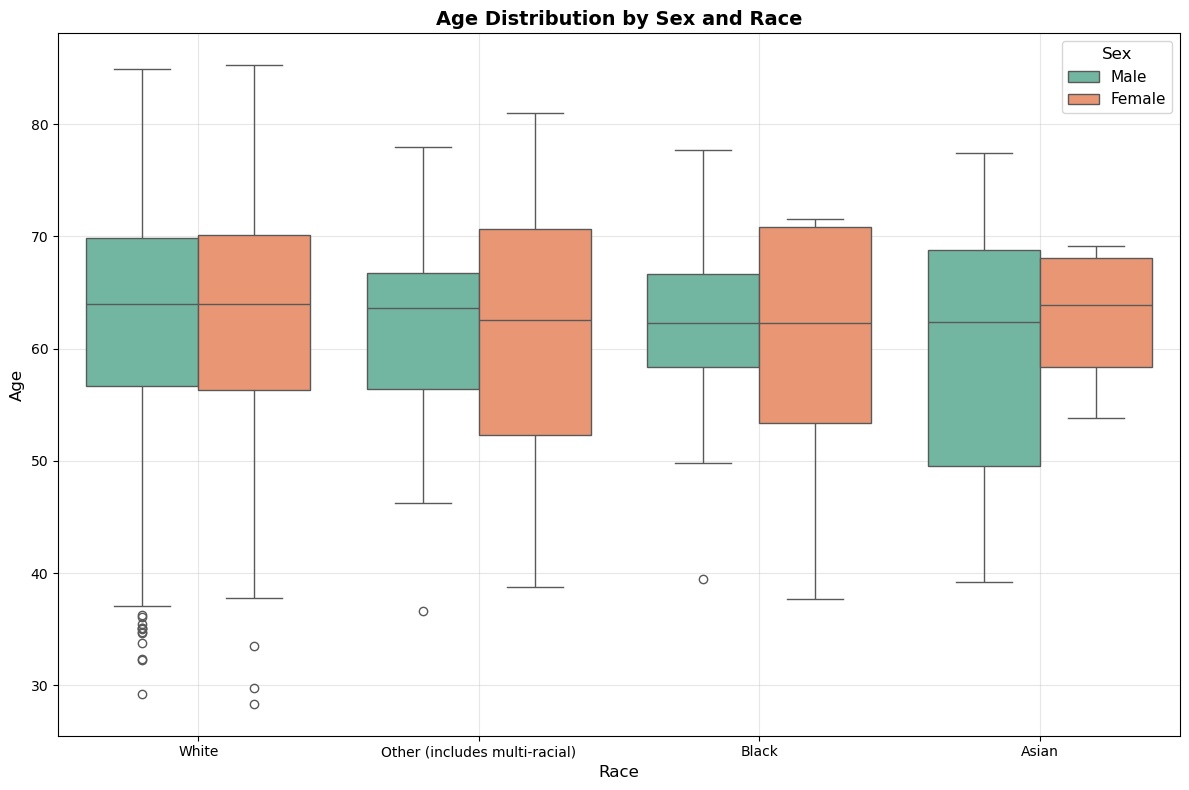


Statistical Summary by Race and Sex:
                                      count   mean    std  median
race                          sex                                
White                         Female    510  63.14   9.62   63.98
                              Male      846  62.83   9.87   63.93
Black                         Female     11  60.38  11.48   62.24
                              Male       11  61.19  10.09   62.25
Asian                         Female      8  62.74   6.06   63.87
                              Male       11  58.71  12.90   62.34
Other (includes multi-racial) Female     22  61.55  10.77   62.57
                              Male       27  61.21   8.87   63.62


In [598]:
# Race & Sex Mapping
race_mapping = {
    1.0: 'White',
    2.0: 'Black', 
    3.0: 'Asian',
    4.0: 'Other (includes multi-racial)'
}
sex_mapping = {0: 'Female', 1: 'Male'} 

plot_data = curated_patient_baseline_df.dropna(subset=['race', 'sex']).drop_duplicates(subset=['patno']).copy()
plot_data['race_label'] = plot_data['race'].map(race_mapping)
plot_data['sex_label'] = plot_data['sex'].map(sex_mapping)

# Set up the figure and axes
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=plot_data, 
                 x='race_label', y='age', hue='sex_label', palette='Set2')
plt.title('Age Distribution by Sex and Race', fontsize=14, fontweight='bold')
plt.xlabel('Race', fontsize=12)
plt.ylabel('Age', fontsize=12)
# plt.xticks(rotation=45)
plt.legend(title='Sex', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Statistical summary table
print("\nStatistical Summary by Race and Sex:")
summary_stats = plot_data.groupby(['race', 'sex'])['age'].agg(['count', 'mean', 'std', 'median']).round(2)
summary_stats.index = summary_stats.index.map(lambda x: (race_mapping.get(x[0], x[0]), sex_mapping.get(x[1], x[1])))
print(summary_stats)

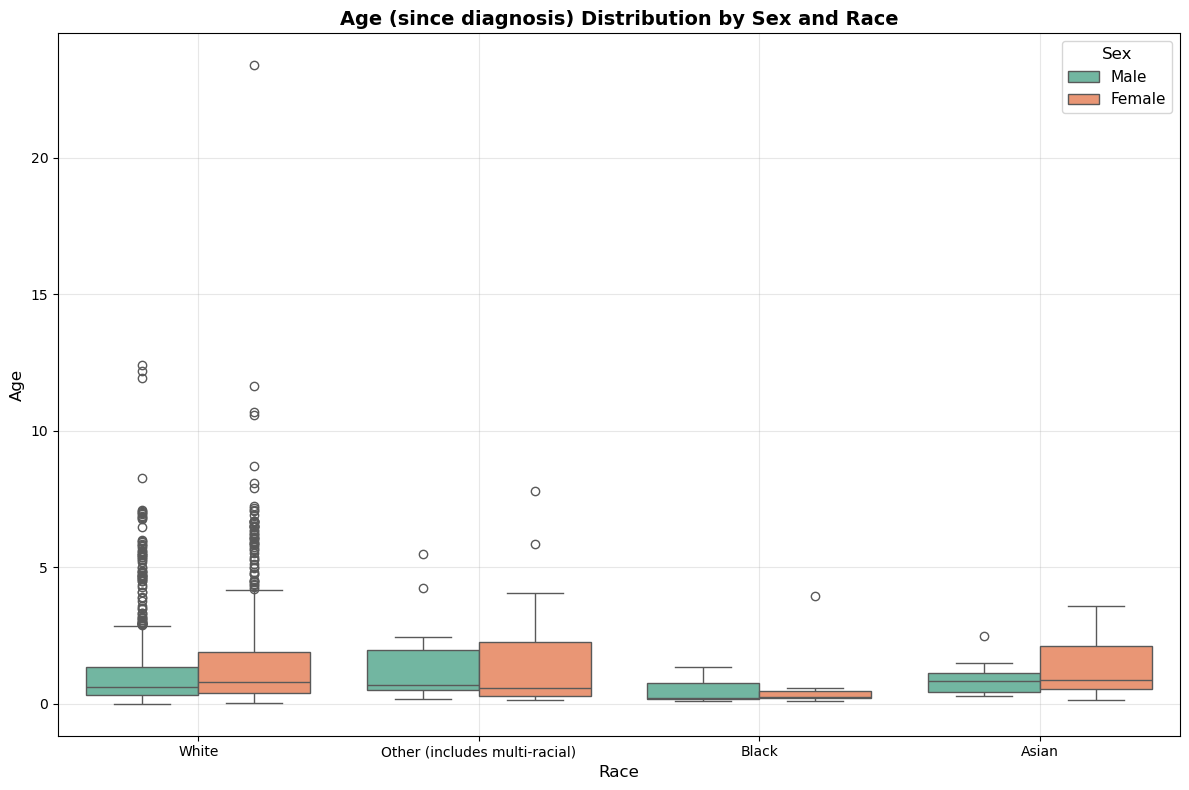

In [599]:
# Set up the figure and axes
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=plot_data, 
                 x='race_label', y='duration_yrs', hue='sex_label', palette='Set2')
plt.title('Age (since diagnosis) Distribution by Sex and Race', fontsize=14, fontweight='bold')
plt.xlabel('Race', fontsize=12)
plt.ylabel('Age', fontsize=12)
# plt.xticks(rotation=45)
plt.legend(title='Sex', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

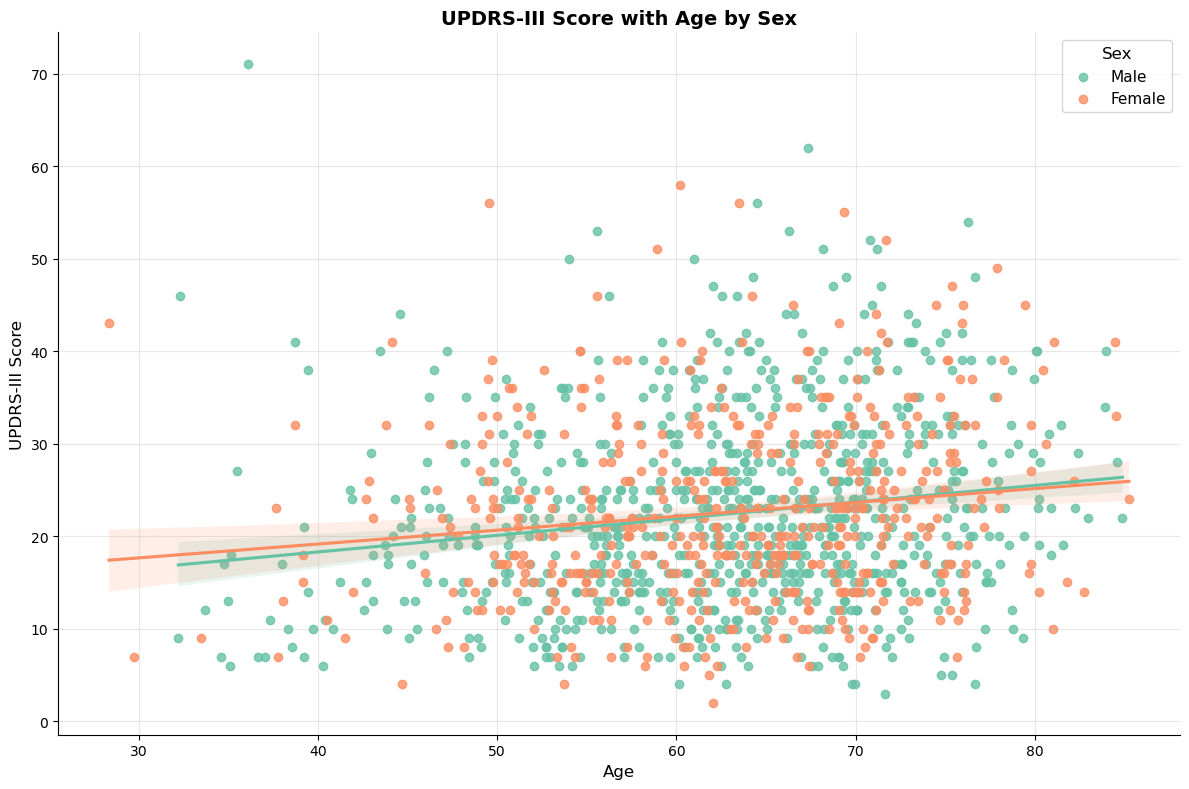

In [600]:
# Plot HY and UPDRS-III Score with Sex and Race
plt.figure(figsize=(12, 8))
sns.lmplot(data=plot_data, 
                x='age', y='updrs3_score', hue='sex_label', palette='Set2', height=8, aspect=1.5, legend=False)
plt.title('UPDRS-III Score with Age by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('UPDRS-III Score', fontsize=12)
plt.legend(title='Sex', title_fontsize=12, fontsize=11)
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()
# plt.title('UPDRS-III Score with

<Figure size 1200x800 with 0 Axes>

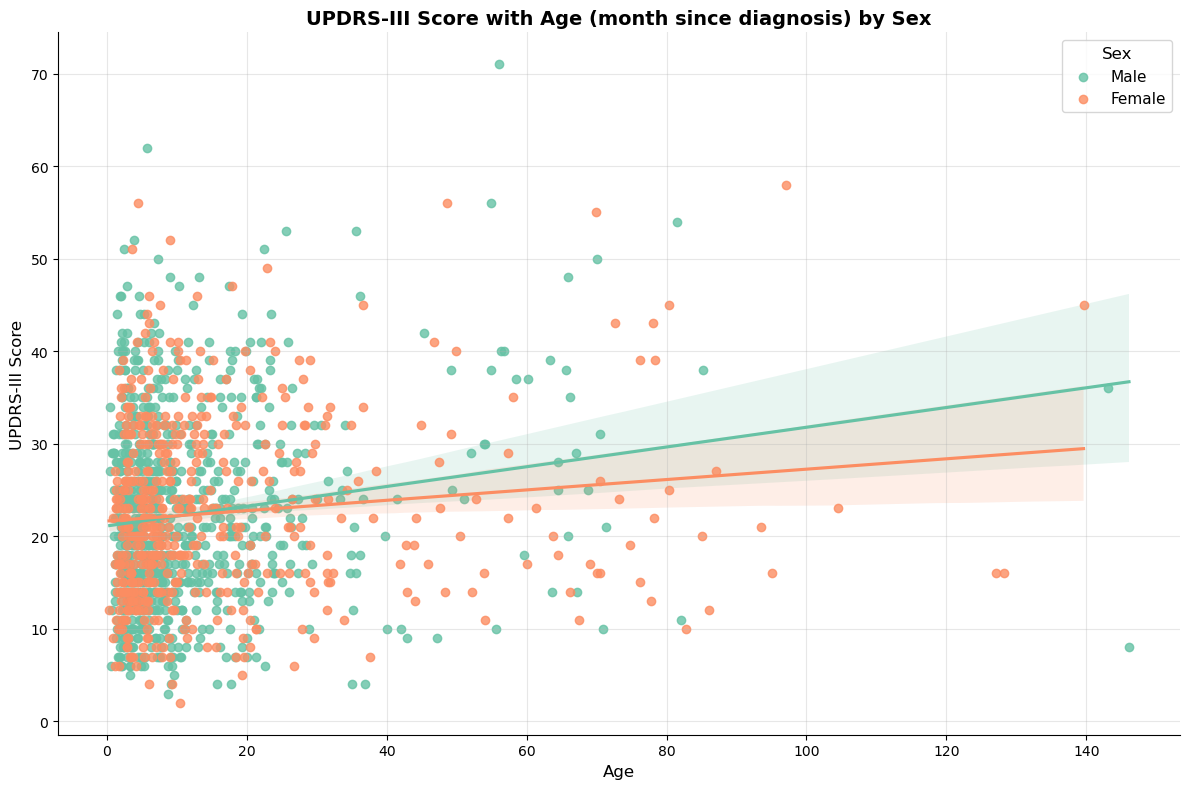

In [601]:
# Plot HY and UPDRS-III Score with Sex and Race
plt.figure(figsize=(12, 8))
sns.lmplot(data=plot_data, 
                x='duration', y='updrs3_score', hue='sex_label', palette='Set2', height=8, aspect=1.5, legend=False)
plt.title('UPDRS-III Score with Age (month since diagnosis) by Sex', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('UPDRS-III Score', fontsize=12)
plt.legend(title='Sex', title_fontsize=12, fontsize=11)
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

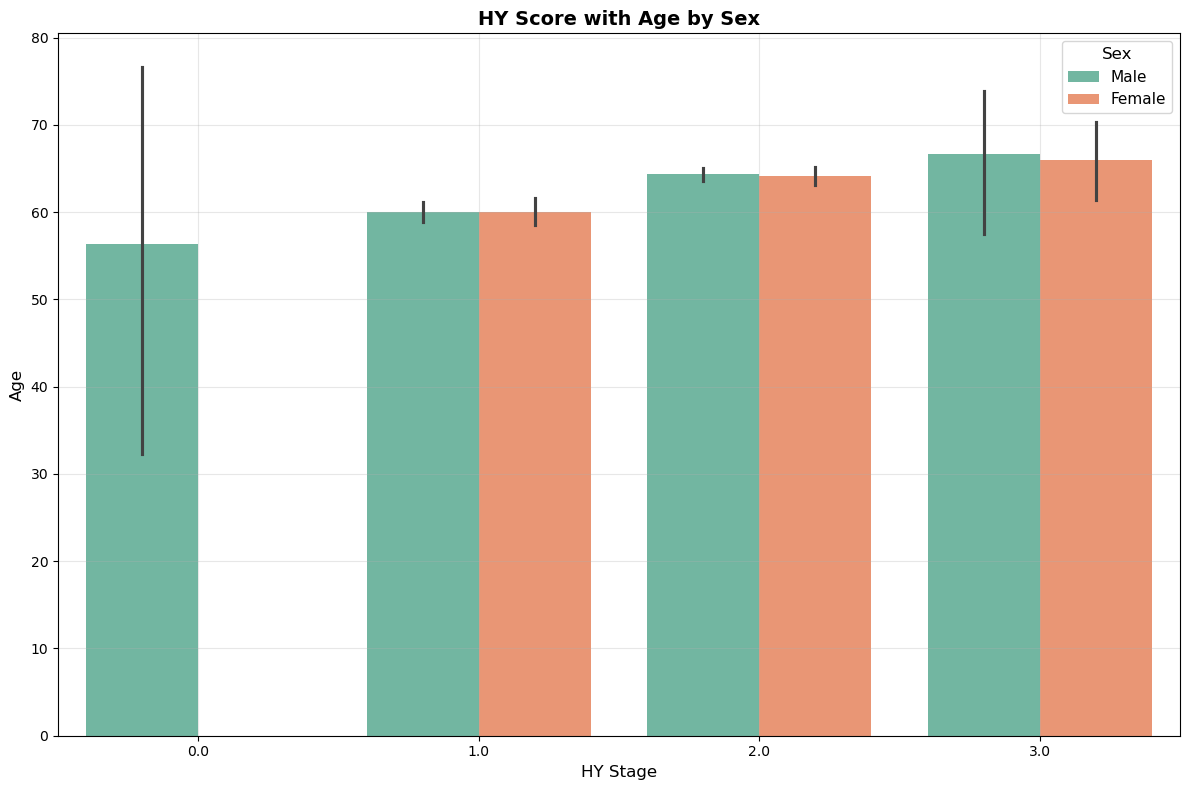

In [602]:
# Plot HY and UPDRS-III Score with Sex and Race
plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data, 
                x='hy', y='age', hue='sex_label', palette='Set2')
plt.title('HY Score with Age by Sex', fontsize=14, fontweight='bold')
plt.xlabel('HY Stage', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Sex', title_fontsize=12, fontsize=11)
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()
# plt.title('UPDRS-III Score with

# 3. Missing Values
**3Q:** How many missing values are there in each column?

In [603]:
curated_patient_baseline_df.isnull().sum().sort_values(ascending=False)

analytic_subgroup       1454
enroll_source           1454
hiq_rbd                 1454
othneuro                1444
stage_g                 1308
bd_tau_plasma           1290
ptau217_plasma          1289
nfl_csf                 1237
updrs4_score            1183
sex_orient              1096
howlive                 1095
hemohi                   941
asyn                     940
abeta                    886
ptau                     882
nfl_serum                859
tau                      845
abeta_ulod               834
abeta_llod               834
tau_llod                 829
ptau_llod                829
_2_2__di_22_6_bmp        817
total_di_22_6_bmp        817
total_di_18_1_bmp        817
dvs_bnt                  755
pctl_bnt                 755
modbnt                   725
dvt_fas                  710
lexical                  708
dvs_fas                  708
dvz_tmta                 706
dvz_tmtb                 706
tmt_a                    705
dvz_clckdraw             705
clockdraw     

In [604]:
curated_patient_baseline_df['nsd_stage'].isnull().sum()

np.int64(245)

In [605]:
# # check for missing values in specific features
# feature_name = 'updrs3_score'
# patno_list_with_feature_missing = curated_patient_baseline_df[curated_patient_baseline_df[feature_name].isna()]['patno'].unique()
# curated_patient_baseline_df[curated_patient_baseline_df['patno'].isin(patno_list_with_feature_missing)][['patno', 'year', feature_name]]

##########################################################
# Imputation (Deprecated for now)
##########################################################
# # Check for a feature, if a patient only have one unique value and null value, just impute with that value
# def impute_single_value_feature(df, feature):
#     unique_values = df[feature].dropna().unique()
#     if len(unique_values) == 1:
#         # If there's only one unique value, fill NaNs with that value
#         fill_value = unique_values[0]
#         df[feature].fillna(fill_value, inplace=True)
#         print(f"Imputed {feature} with value: {fill_value}")
#     else:
#         print(f"{feature} has multiple unique values or no NaNs to impute.")
#     return df

# 4. Duplicates
**4Q**: Are there any duplicate entries for the same `PATNO` and `EVENT_ID`?

In [606]:
duplicated_number = curated_patient_baseline_df.duplicated(subset=['patno', 'year']).sum()
if duplicated_number > 0:
    print(f"Number of duplicated rows based on PATNO and YEAR: {duplicated_number}")
else:
    print("No duplicated rows based on PATNO and YEAR.")

No duplicated rows based on PATNO and YEAR.


# 5. Outliers
**5Q** Are there any outliers in clinical scores such as `updrs3_score`, `hy`, etc.?

In [607]:
curated_patient_baseline_df.describe()

site          patno  cohort  enroll_phase  hiq_rbd   nsd_status  \
count  1454.000000    1454.000000  1454.0   1454.000000      0.0  1277.000000   
mean     39.742091  109582.128611     1.0      1.505502      NaN     0.878622   
std      20.119674  103173.812434     0.0      0.500142      NaN     0.326694   
min      10.000000    3001.000000     1.0      1.000000      NaN     0.000000   
25%      24.000000    4025.250000     1.0      1.000000      NaN     1.000000   
50%      33.000000  100142.500000     1.0      2.000000      NaN     1.000000   
75%      62.000000  181680.750000     1.0      2.000000      NaN     1.000000   
max      79.000000  466157.000000     1.0      2.000000      NaN     1.000000   

          primdiag    year          age  age_at_visit          sex  \
count  1438.000000  1454.0  1454.000000   1454.000000  1454.000000   
mean      1.039638     0.0    62.782618     62.770941     0.618982   
std       0.776634     0.0     9.848705      9.849322     0.485804   
min       1.000000     0.0    28.345205     28.345205     0.000000   
25%       1.000000     0.0    56.326027     56.284247     0.000000   
50%       1.000000     0.0    63.850685     63.850685     1.000000   
75%       1.000000     0.0    69.879452     69.884247     1.000000   
max      24.000000     0.0    85.246575     85.246575     1.000000   

           educyrs         race      hisplat      ashkjew     aficberb  \
count  1452.000000  1446.000000  1440.000000  1153.000000  1161.000000   
mean     15.776171     1.143154     0.058333     0.163053     0.003445   
std       3.094231     0.593720     0.234454     0.369574     0.058621   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%      14.000000     1.000000     0.000000     0.000000     0.000000   
50%      16.000000     1.000000     0.000000     0.000000     0.000000   
75%      18.000000     1.000000     0.000000     0.000000     0.000000   
max      20.000000     4.000000     1.000000     1.000000     1.000000   

            basque       fampd    fampd_bin       handed     howlive  \
count  1159.000000  1453.00000  1453.000000  1453.000000  359.000000   
mean      0.017256     2.43565     1.649690     1.149346    1.632312   
std       0.130281     0.82122     0.477231     0.434871    0.499903   
min       0.000000     1.00000     1.000000     1.000000    1.000000   
25%       0.000000     2.00000     1.000000     1.000000    1.000000   
50%       0.000000     3.00000     2.000000     1.000000    2.000000   
75%       0.000000     3.00000     2.000000     1.000000    2.000000   
max       1.000000     3.00000     2.000000     3.000000    4.000000   

       sex_orient           bmi      agediag     ageonset     duration  \
count  358.000000   1436.000000  1453.000000  1437.000000  1453.000000   
mean     2.019553     65.951925    61.467409    59.827925    15.726497   
std      0.552213   1482.360891    10.084832    10.395035    20.947135   
min      1.000000     15.622619    22.290411    19.013699     0.000000   
25%      2.000000     23.885993    55.019178    53.372603     4.166667   
50%      2.000000     26.207504    62.630137    61.079452     7.900000   
75%      2.000000     29.419642    68.876712    67.345205    18.366667   
max      9.000000  56200.000000    84.786301    83.747945   280.733333   

       duration_yrs      domside   sym_tremor    sym_rigid    sym_brady  \
count   1453.000000  1444.000000  1431.000000  1371.000000  1395.000000   
mean       1.309849     1.583102     0.781272     0.757841     0.835842   
std        1.745636     0.538875     0.413528     0.428546     0.370551   
min        0.000000     1.000000     0.000000     0.000000     0.000000   
25%        0.347945     1.000000     1.000000     1.000000     1.000000   
50%        0.660274     2.000000     1.000000     1.000000     1.000000   
75%        1.531507     2.000000     1.000000     1.000000     1.000000   
max       23.389041     3.000000     1.000000     1.000000     1.00000

> **BMI** (Body Mass Index) is a measure of body fat based on height and weight. It is calculated using the formula: BMI = weight(kg) / (height(m)^2). A higher BMI can indicate higher body fatness. The maximum value of BMI can theoretically be unlimited, but in practice, extremely high values are often seen as outliers or indicative of measurement error.

In [608]:
print(curated_patient_baseline_df['bmi'].sort_values(ascending=False).head(30))

1341     56200.000000
1097        73.461892
382         63.544536
1619        59.171598
357         49.209033
3236        48.277821
1728        47.184699
4952        44.626557
6614        43.761154
11494       43.564014
6162        42.070177
3293        41.952024
10811       41.641880
8000        41.574074
2481        41.574074
295         41.314228
5988        41.049383
7396        40.820312
11892       40.755947
11455       40.642313
10349       39.874764
3471        39.845679
5682        39.733333
11220       39.646814
12570       39.442074
9145        39.177043
10106       39.062500
4630        38.625904
5934        38.578795
11194       38.368735
Name: bmi, dtype: float64


In [609]:
# BMI should be clipped to a reasonable range
bmi_lower_bound, bmi_upper_bound = 10, 100
curated_patient_baseline_df['bmi'] = curated_patient_baseline_df['bmi'].clip(lower=bmi_lower_bound, upper=bmi_upper_bound)

/tmp/ipykernel_99635/1911307432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curated_patient_baseline_df['bmi'] = curated_patient_baseline_df['bmi'].clip(lower=bmi_lower_bound, upper=bmi_upper_bound)


# 6. Feature Engineering
## 6.1 Feature Encoding (for categorical variables)
- Basic Feature Engineering (New Feature)
- Perform one-hot encoding to categorical variables (e.g. `subgroup`, `race` and `csfsaa_assay`)

In [610]:
# Before Processing, should remove the null value
curated_patient_baseline_df.isnull().sum().sort_values(ascending=False)

analytic_subgroup       1454
enroll_source           1454
hiq_rbd                 1454
othneuro                1444
stage_g                 1308
bd_tau_plasma           1290
ptau217_plasma          1289
nfl_csf                 1237
updrs4_score            1183
sex_orient              1096
howlive                 1095
hemohi                   941
asyn                     940
abeta                    886
ptau                     882
nfl_serum                859
tau                      845
abeta_ulod               834
abeta_llod               834
tau_llod                 829
ptau_llod                829
_2_2__di_22_6_bmp        817
total_di_22_6_bmp        817
total_di_18_1_bmp        817
dvs_bnt                  755
pctl_bnt                 755
modbnt                   725
dvt_fas                  710
lexical                  708
dvs_fas                  708
dvz_tmta                 706
dvz_tmtb                 706
tmt_a                    705
dvz_clckdraw             705
clockdraw     

In [611]:
print(f"Before Drop CSFSAA/RACE/Subgroup: {curated_patient_baseline_df.shape}")
curated_patient_baseline_df = curated_patient_baseline_df.dropna(subset=['csfsaa', 'race', 'subgroup', 'domside'])
print(f"After Drop CSFSAA/RACE/Subgroup: {curated_patient_baseline_df.shape}")

Before Drop CSFSAA/RACE/Subgroup: (1454, 177)
After Drop CSFSAA/RACE/Subgroup: (1254, 177)


In [612]:
curated_patient_baseline_df['subgroup'].value_counts()

subgroup
Sporadic PD    966
LRRK2          162
GBA             84
PRKN            21
SNCA            12
LRRK2 + GBA      8
Normosmic        1
Name: count, dtype: int64

In [613]:
######################################################
# Create new feature
######################################################
def create_contralateral_putamen_full(row):
    domside = row['domside']
    putamen_l = row.get('mia_putamen_l', np.nan)
    putamen_r = row.get('mia_putamen_r', np.nan)
    
    if pd.isna(domside):
        return np.nan
    elif domside == 1:  # Left side is the most affected, so return right side
        return putamen_r
    elif domside == 2:  # Right side is the most affected, so return left side
        return putamen_l
    elif domside == 3:  # Both sides are affected, choose the minimum
        if pd.isna(putamen_l) and pd.isna(putamen_r):
            return np.nan
        elif pd.isna(putamen_l):
            return putamen_r
        elif pd.isna(putamen_r):
            return putamen_l
        else:
            return min(putamen_l, putamen_r)
    else:
        return np.nan

# Create a proper copy of the DataFrame first to avoid warnings
curated_patient_df = curated_patient_df.copy()

# Create contralateral putamen feature using .loc to avoid the warning
curated_patient_df.loc[:, 'contralateral_putamen'] = curated_patient_df.apply(
    create_contralateral_putamen_full, axis=1
)

In [614]:
print(curated_patient_baseline_df.info(), end='\n\n')
print(f"Object columns: {curated_patient_baseline_df.select_dtypes(include=['object']).columns}", end='\n\n')
print(f"Int columns: {curated_patient_baseline_df.select_dtypes(include=['int64']).columns}")

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 16038
Columns: 177 entries, site to stage_g
dtypes: float64(161), int64(6), object(10)
memory usage: 1.7+ MB
None

Object columns: Index(['subgroup', 'enroll_source', 'analytic_subgroup', 'study_status',
       'nsd_stage', 'othneuro', 'event_id', 'visit_date', 'pctl_bnt', 'apoe'],
      dtype='object')

Int columns: Index(['site', 'patno', 'cohort', 'enroll_phase', 'year', 'sex'], dtype='object')


In [615]:
curated_patient_baseline_df['subgroup'].unique()

array(['Sporadic PD', 'PRKN', 'GBA', 'LRRK2', 'LRRK2 + GBA', 'SNCA',
       'Normosmic'], dtype=object)

In [616]:
######################################################
# Perform one-hot encoding for 'subgroup' and 'race'
######################################################
curated_patient_baseline_df = pd.get_dummies(curated_patient_baseline_df, columns=['subgroup', 'race'], prefix=['subgroup', 'race'])

# Handle the combined 'subgroup_LRRK2 + GBA' category
if 'subgroup_LRRK2 + GBA' in curated_patient_baseline_df.columns:
    # Get IDs with LRRK2 + GBA combination
    lrrk2_gba_ids = curated_patient_baseline_df[curated_patient_baseline_df['subgroup_LRRK2 + GBA'] == True]['patno'].values
    
    # Set both LRRK2 and GBA to True for these patients
    curated_patient_baseline_df.loc[curated_patient_baseline_df['patno'].isin(lrrk2_gba_ids), 'subgroup_LRRK2'] = True
    curated_patient_baseline_df.loc[curated_patient_baseline_df['patno'].isin(lrrk2_gba_ids), 'subgroup_GBA'] = True
    
    # Drop the combined column
    curated_patient_baseline_df.drop(columns=['subgroup_LRRK2 + GBA'], inplace=True)

#######################################################
# Handle DOMSIDE encoding
#######################################################

domside_map = {1: 'left', 2: 'right', 3: 'symmetric'}
curated_patient_baseline_df['domside_categorical'] = curated_patient_baseline_df['domside'].map(domside_map)

# Perform one-hot encoding
domside_dummies = pd.get_dummies(curated_patient_baseline_df['domside_categorical'], prefix='domside')

# Concat and remove old columns
curated_patient_baseline_df = pd.concat([curated_patient_baseline_df, domside_dummies], axis=1)
curated_patient_baseline_df = curated_patient_baseline_df.drop(columns=['domside', 'domside_categorical'])

######################################################
# Handle CSFSAA encoding (One-hot for nominal categorical)
######################################################
print("Processing CSFSAA encoding...")
if 'csfsaa' in curated_patient_baseline_df.columns:
    # Check original values
    print("Original CSFSAA values:")
    print(curated_patient_baseline_df['csfsaa'].value_counts().sort_index())
    
    # Map to meaningful names first
    csfsaa_mapping = {
        0: 'negative',
        1: 'positive_lbd_like', 
        2: 'inconclusive',
        3: 'positive_msa_like'
    }
    
    # Create categorical version with meaningful names
    curated_patient_baseline_df['csfsaa_categorical'] = curated_patient_baseline_df['csfsaa'].map(csfsaa_mapping)
    
    # One-hot encode with meaningful names
    csfsaa_dummies = pd.get_dummies(curated_patient_baseline_df['csfsaa_categorical'], 
                                   prefix='csfsaa')
    csfsaa_dummies.drop(columns=['csfsaa_negative'], inplace=True)  # Drop negative to avoid multicollinearity

    curated_patient_baseline_df = pd.concat([curated_patient_baseline_df, csfsaa_dummies], axis=1)
    curated_patient_baseline_df.drop(columns=['csfsaa', 'csfsaa_categorical'], inplace=True)
    
    print(f"Created CSFSAA dummy columns: {list(csfsaa_dummies.columns)}")
    
    # Show distribution of dummy variables
    print("\nCSFSAA one-hot encoding distribution:")
    for col in csfsaa_dummies.columns:
        count = curated_patient_baseline_df[col].sum()
        print(f"  {col}: {count} patients")
        
else:
    print("csfsaa column not found in dataset")

######################################################
# Handle CSFSAA_ASSAY encoding (One-hot for nominal categorical)
######################################################
print("Processing CSFSAA_ASSAY encoding...")
if 'csfsaa_assay' in curated_patient_baseline_df.columns:
    # Check original values
    print("Original CSFSAA_ASSAY values:")
    print(curated_patient_baseline_df['csfsaa_assay'].value_counts().sort_index())
    
    # One-hot encode csfsaa_assay (nominal categorical: 1=150-hour, 2=24-hour, 3=35-hour)
    csfsaa_dummies = pd.get_dummies(curated_patient_baseline_df['csfsaa_assay'], 
                                   prefix='csfsaa_assay', drop_first=True)
    
    curated_patient_baseline_df = pd.concat([curated_patient_baseline_df, csfsaa_dummies], axis=1)
    curated_patient_baseline_df.drop(columns=['csfsaa_assay'], inplace=True)
    
    print(f"Created CSFSAA_ASSAY dummy columns: {list(csfsaa_dummies.columns)}")
else:
    print("csfsaa_assay column not found in dataset")

######################################################
# Handle FAMPD encoding
######################################################
print("Processing FAMPD encoding...")
if 'fampd' in curated_patient_baseline_df.columns:
    print("Original FAMPD values:")
    print(curated_patient_baseline_df['fampd'].value_counts().sort_index())

    # Create Standardized Encoding
    curated_patient_baseline_df['fampd'] = curated_patient_baseline_df['fampd'].map({
        3: 0,  # No Family History → 0 (Low Risk)
        2: 1,  # Not First-degree Relative → 1 (Medium Risk)
        1: 2   # First-degree Relative → 2 (High Risk)
    })
    
    print("FAMPD encoding completed:")
    print("Original fampd: 1=highest risk, 2=medium risk, 3=lowest risk")
    print("New fampd_encoded: 0=lowest risk, 1=medium risk, 2=highest risk")
    
else:
    print("fampd column not found in dataset")

######################################################
# Handle TD_PIGD encoding (Binary: 1=TD, 2=non-TD → 1=TD, 0=non-TD)
######################################################
print("Processing TD_PIGD encoding...")
if 'td_pigd' in curated_patient_baseline_df.columns:
    print("Original TD_PIGD values:")
    print(curated_patient_baseline_df['td_pigd'].value_counts().sort_index())
    
    # Binary encoding: 1=TD (Tremor Dominant), 2=non-TD → 1=TD, 0=non-TD
    curated_patient_baseline_df['td_pigd'] = curated_patient_baseline_df['td_pigd'].map({
        1: 1,  # TD (Tremor Dominant) → 1
        2: 0   # non-TD (PIGD) → 0
    })
    
    print("TD_PIGD encoding completed:")
    print("Original td_pigd: 1=TD, 2=non-TD")
    print("New td_pigd: 1=TD, 0=non-TD")
    print("Final TD_PIGD values:")
    print(curated_patient_baseline_df['td_pigd'].value_counts().sort_index())
else:
    print("td_pigd column not found in dataset")

# Create rename mapping for all possible subgroup columns
subgroup_rename_mapping = {
    'subgroup_GBA': 'subgroup_gba',
    'subgroup_LRRK2': 'subgroup_lrrk2', 
    'subgroup_PRKN': 'subgroup_prkn',
    'subgroup_Sporadic PD': 'subgroup_sporadic_pd',
    'subgroup_SNCA': 'subgroup_snca',
    'subgroup_PINK1': 'subgroup_pink1',
    'subgroup_Normosmic': 'subgroup_normosmic'
}

# Create rename mapping for race columns
race_rename_mapping = {
    'race_1.0': 'race_white',
    'race_2.0': 'race_black', 
    'race_3.0': 'race_asian',
    'race_4.0': 'race_other'
}

# Create rename mapping for csfsaa_array
csfsaa_rename_mapping = {
    'csfsaa_assay_1.0': 'csfsaa_assay_150_hour',
    'csfsaa_assay_2.0': 'csfsaa_assay_24_hour',
    'csfsaa_assay_3.0': 'csfsaa_assay_35_hour'
}

# Combine all rename mappings and only include columns that exist
all_rename_mapping = {}
for old_name, new_name in {**subgroup_rename_mapping, **race_rename_mapping, **csfsaa_rename_mapping}.items():
    if old_name in curated_patient_baseline_df.columns:
        all_rename_mapping[old_name] = new_name

# Apply the renaming
curated_patient_baseline_df.rename(columns=all_rename_mapping, inplace=True)

# Print info about all encoding results
print(f"\n" + "="*60)
print("ENCODING RESULTS SUMMARY")
print("="*60)
print(f"Subgroup columns created: {[col for col in curated_patient_baseline_df.columns if col.startswith('subgroup_')]}")
print(f"Race columns created: {[col for col in curated_patient_baseline_df.columns if col.startswith('race_')]}")
print(f"CSFSAA_ASSAY columns created: {[col for col in curated_patient_baseline_df.columns if col.startswith('csfsaa_assay_')]}")
print(f"CSFSAA columns created: {[col for col in curated_patient_baseline_df.columns if col.startswith('csfsaa_')]}")

# Final shape and info
print(f"\nFinal dataset shape: {curated_patient_baseline_df.shape}")
print(f"Total columns: {len(curated_patient_baseline_df.columns)}")

Processing CSFSAA encoding...
Original CSFSAA values:
csfsaa
0.0     151
1.0    1083
2.0       8
3.0      12
Name: count, dtype: int64
Created CSFSAA dummy columns: ['csfsaa_inconclusive', 'csfsaa_positive_lbd_like', 'csfsaa_positive_msa_like']

CSFSAA one-hot encoding distribution:
  csfsaa_inconclusive: 8 patients
  csfsaa_positive_lbd_like: 1083 patients
  csfsaa_positive_msa_like: 12 patients
Processing CSFSAA_ASSAY encoding...
Original CSFSAA_ASSAY values:
csfsaa_assay
1.0    431
2.0    822
3.0      1
Name: count, dtype: int64
Created CSFSAA_ASSAY dummy columns: ['csfsaa_assay_2.0', 'csfsaa_assay_3.0']
Processing FAMPD encoding...
Original FAMPD values:
fampd
1.0    254
2.0    174
3.0    826
Name: count, dtype: int64
FAMPD encoding completed:
Original fampd: 1=highest risk, 2=medium risk, 3=lowest risk
New fampd_encoded: 0=lowest risk, 1=medium risk, 2=highest risk
Processing TD_PIGD encoding...
Original TD_PIGD values:
td_pigd
1.0    833
2.0    365
Name: count, dtype: int64
TD_PI

## 6.2 Target Feature
**Calculate Slope of MDS-UPDRS / MoCA score (from Baseline)**

In [617]:
patnos = list(curated_patient_baseline_df['patno'].unique())
curated_patient_df = curated_patient_df[curated_patient_df['patno'].isin(patnos)]
curated_patient_df[curated_patient_df['event_id'] == 'BL'].shape

(1254, 178)

Calculating slopes (Year 0-3) for MoCA, SCOPA, Putamen Variables and MDS-UPDRS


Slope analysis before outlier removal:

MOCA:
  Valid slopes: N=1144
  Mean=0.0028, Std=1.5003
  Median=0.0000
  Range: [-8.0000, 7.0000]

SCOPA:
  Valid slopes: N=1143
  Mean=0.8606, Std=2.8760
  Median=0.8000
  Range: [-15.0000, 14.0000]

CONTRALATERAL_PUTAMEN:
  Valid slopes: N=980
  Mean=-0.0629, Std=0.0829
  Median=-0.0550
  Range: [-0.5800, 0.3200]

MIA_PUTAMEN_MEAN:
  Valid slopes: N=980
  Mean=-0.0767, Std=0.0809
  Median=-0.0700
  Range: [-0.6700, 0.2600]

UPDRS1_SCORE:
  Valid slopes: N=1147
  Mean=0.7023, Std=2.2706
  Median=0.6000
  Range: [-9.0000, 10.0000]

UPDRS2_SCORE:
  Valid slopes: N=1149
  Mean=0.8579, Std=2.6042
  Median=0.6000
  Range: [-12.0000, 14.0000]

UPDRS3_SCORE:
  Valid slopes: N=992
  Mean=2.2455, Std=6.0244
  Median=2.0000
  Range: [-22.0000, 52.0000]

UPDRS_TOTSCORE:
  Valid slopes: N=984
  Mean=3.9003, Std=8.2337
  Median=4.0000
  Range: [-31.0000, 54.0000]

Outlier Detection Results

IQR method results (threshold=1.5):
  moca: 90 outliers (7.9%)
    B

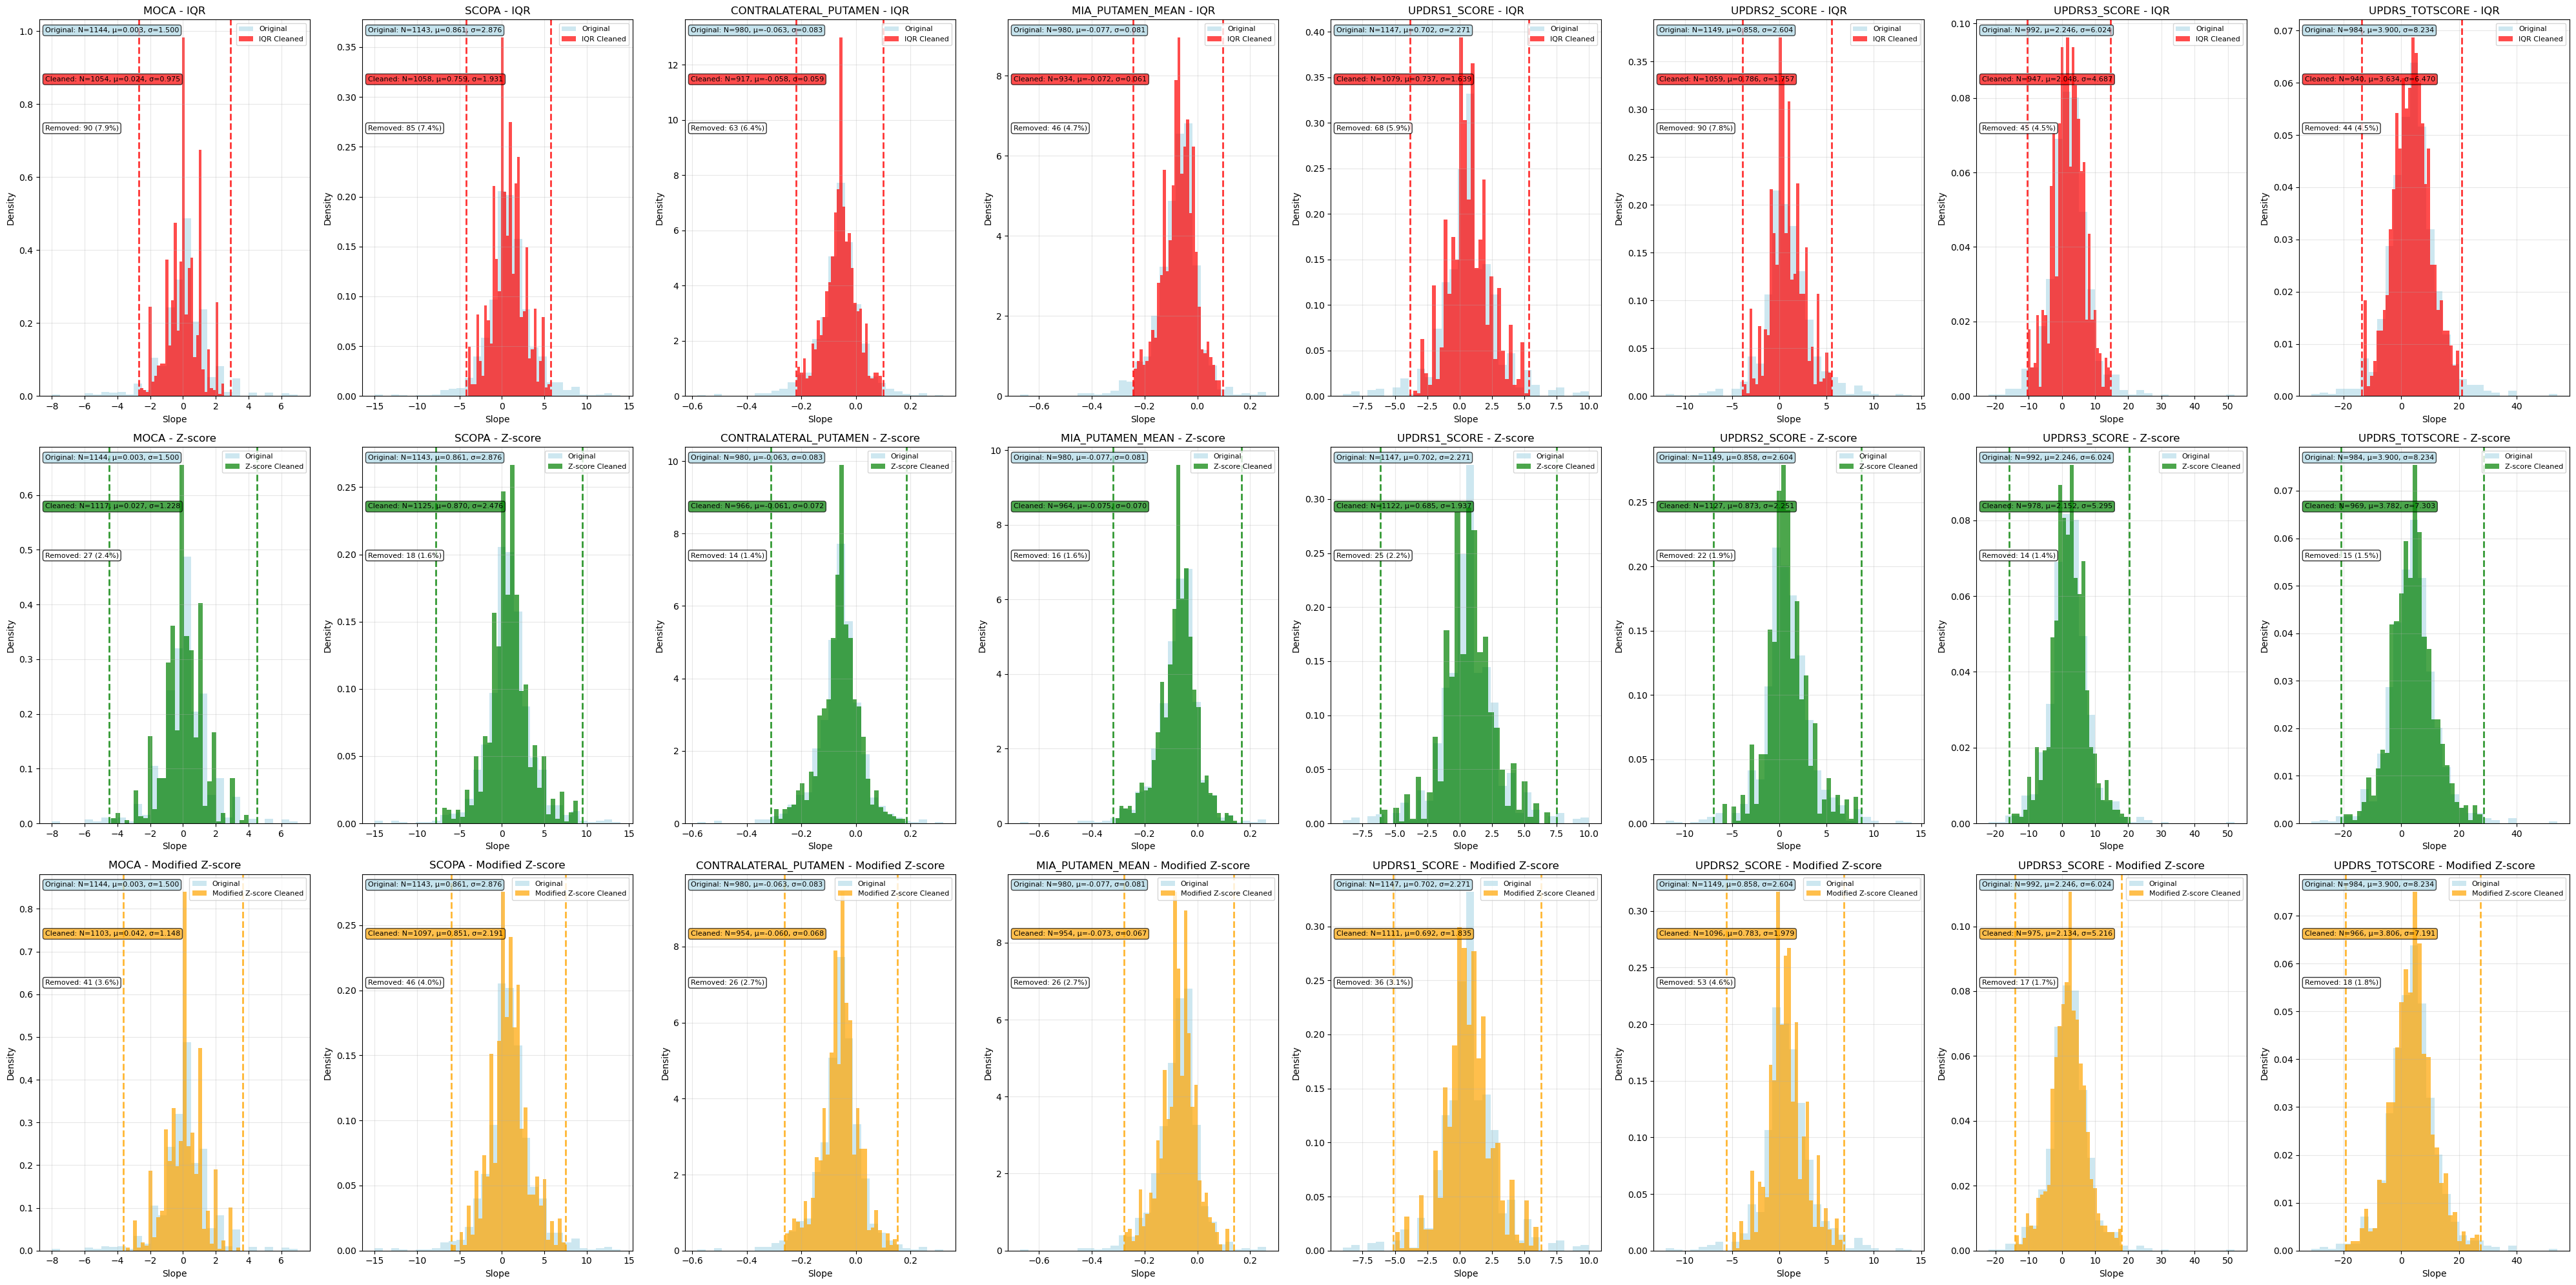

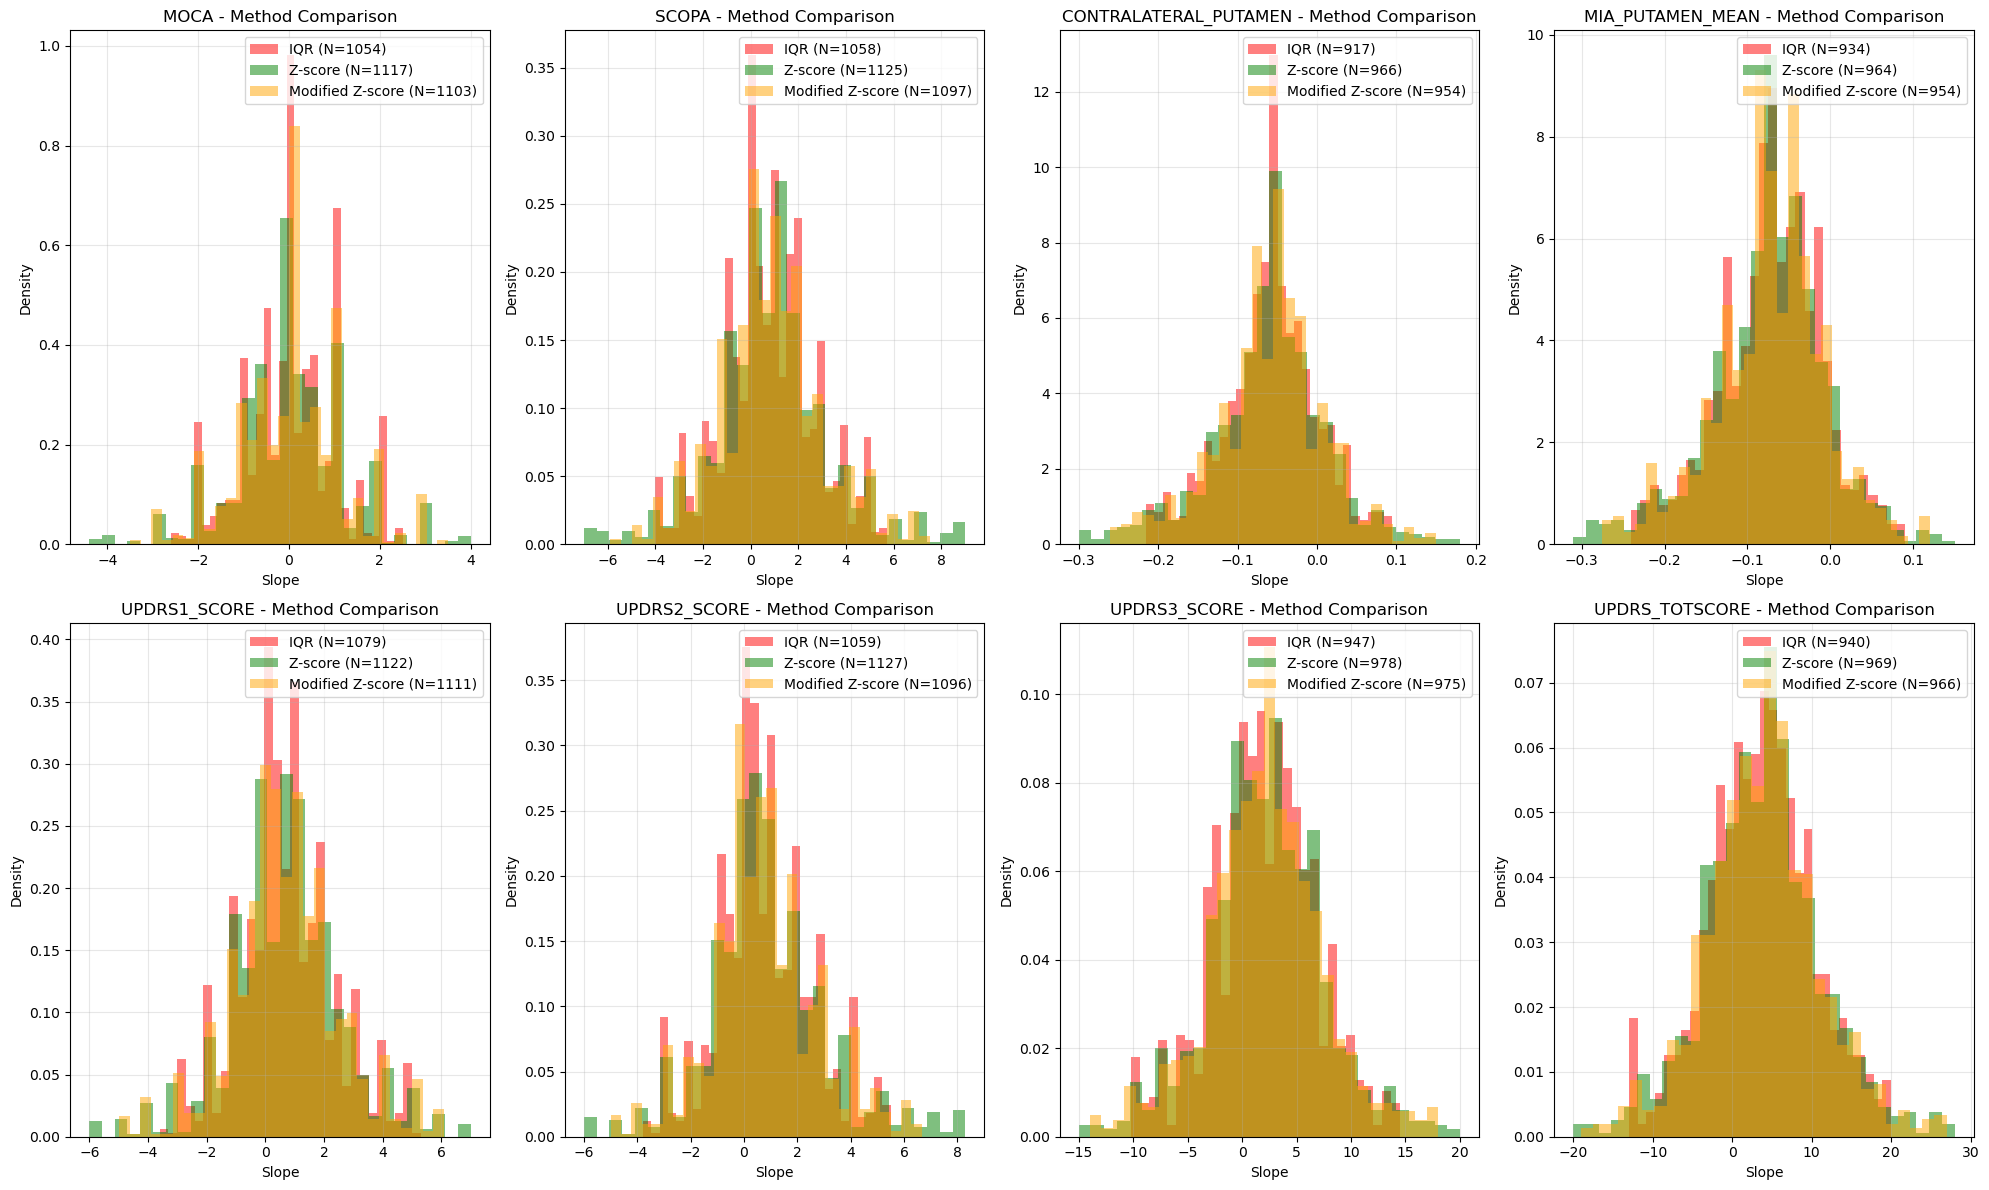

/tmp/ipykernel_99635/2601492515.py:394: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(plot_data, labels=labels, patch_artist=True)
/tmp/ipykernel_99635/2601492515.py:394: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(plot_data, labels=labels, patch_artist=True)
/tmp/ipykernel_99635/2601492515.py:394: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(plot_data, labels=labels, patch_artist=True)
/tmp/ipykernel_99635/2601492515.py:394: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support fo

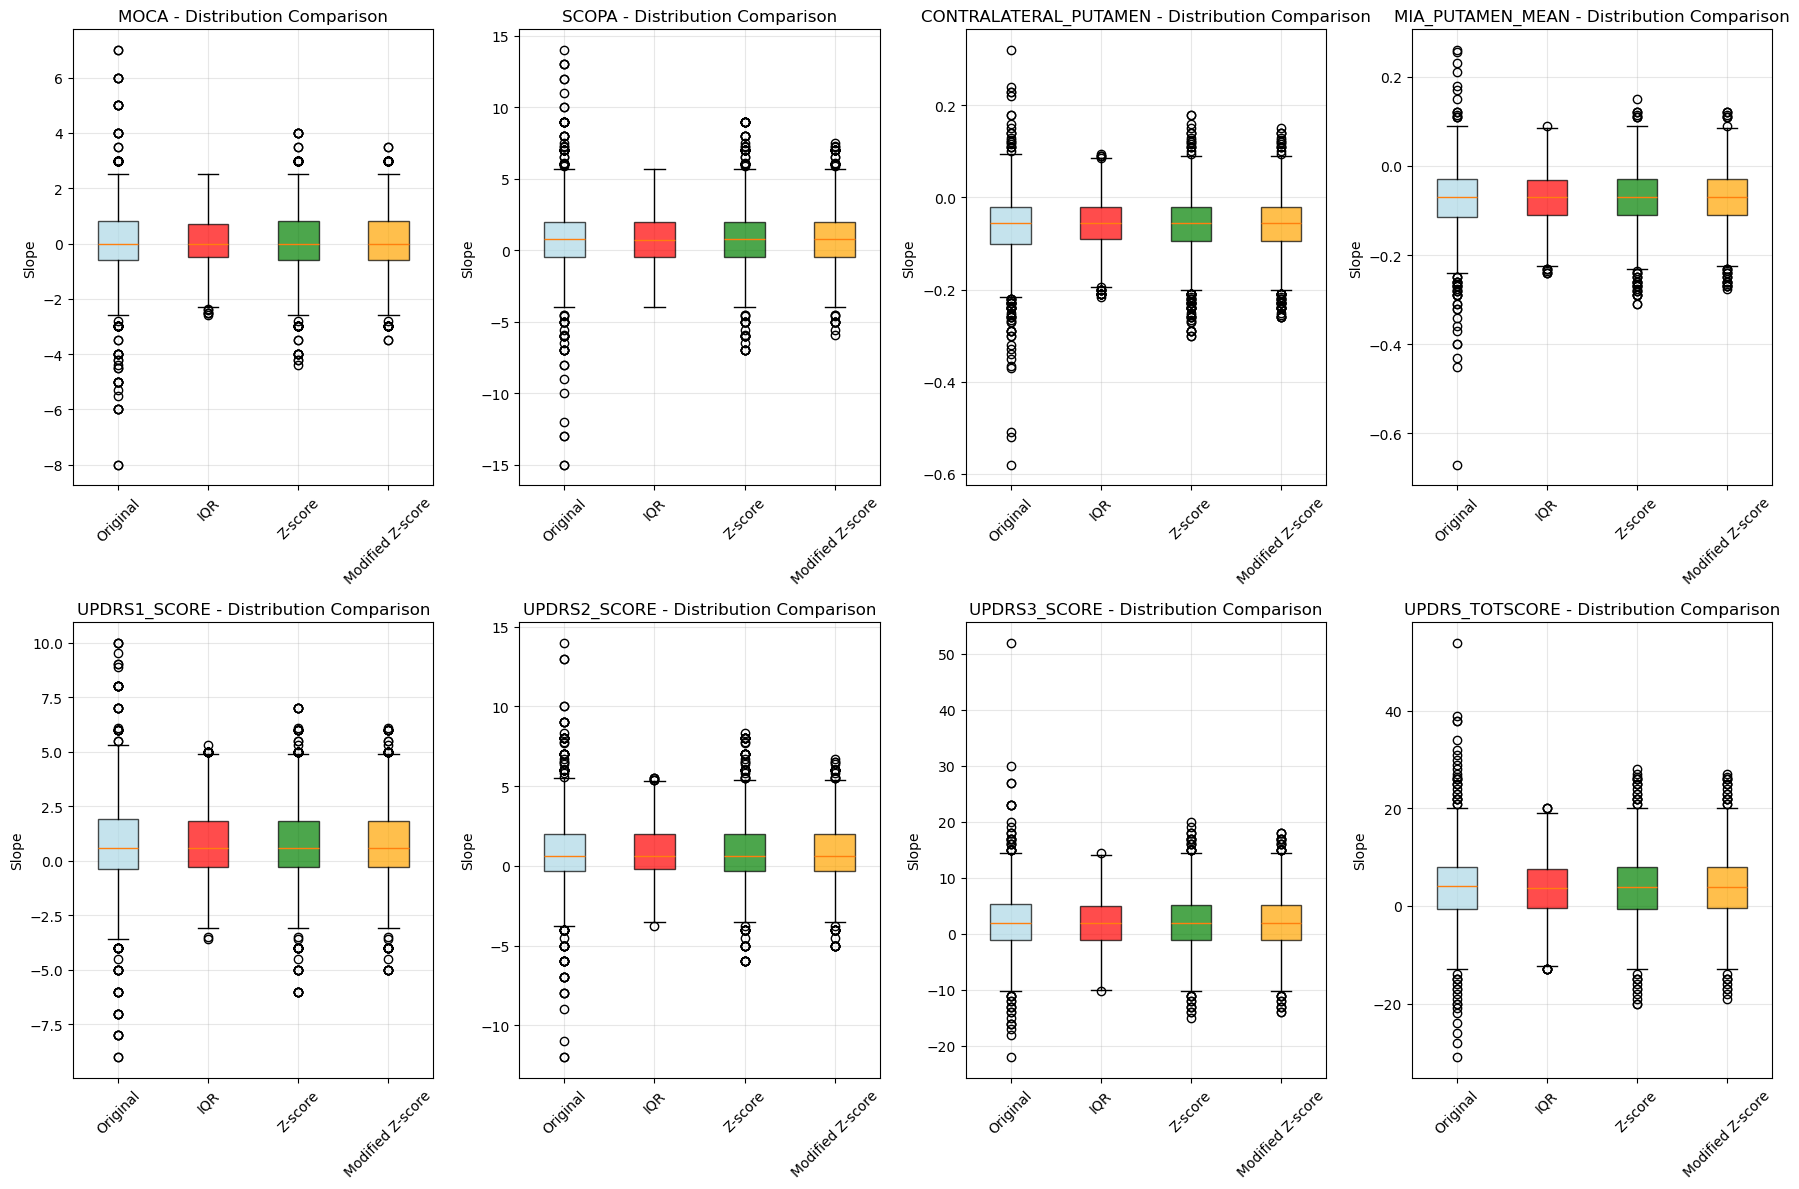

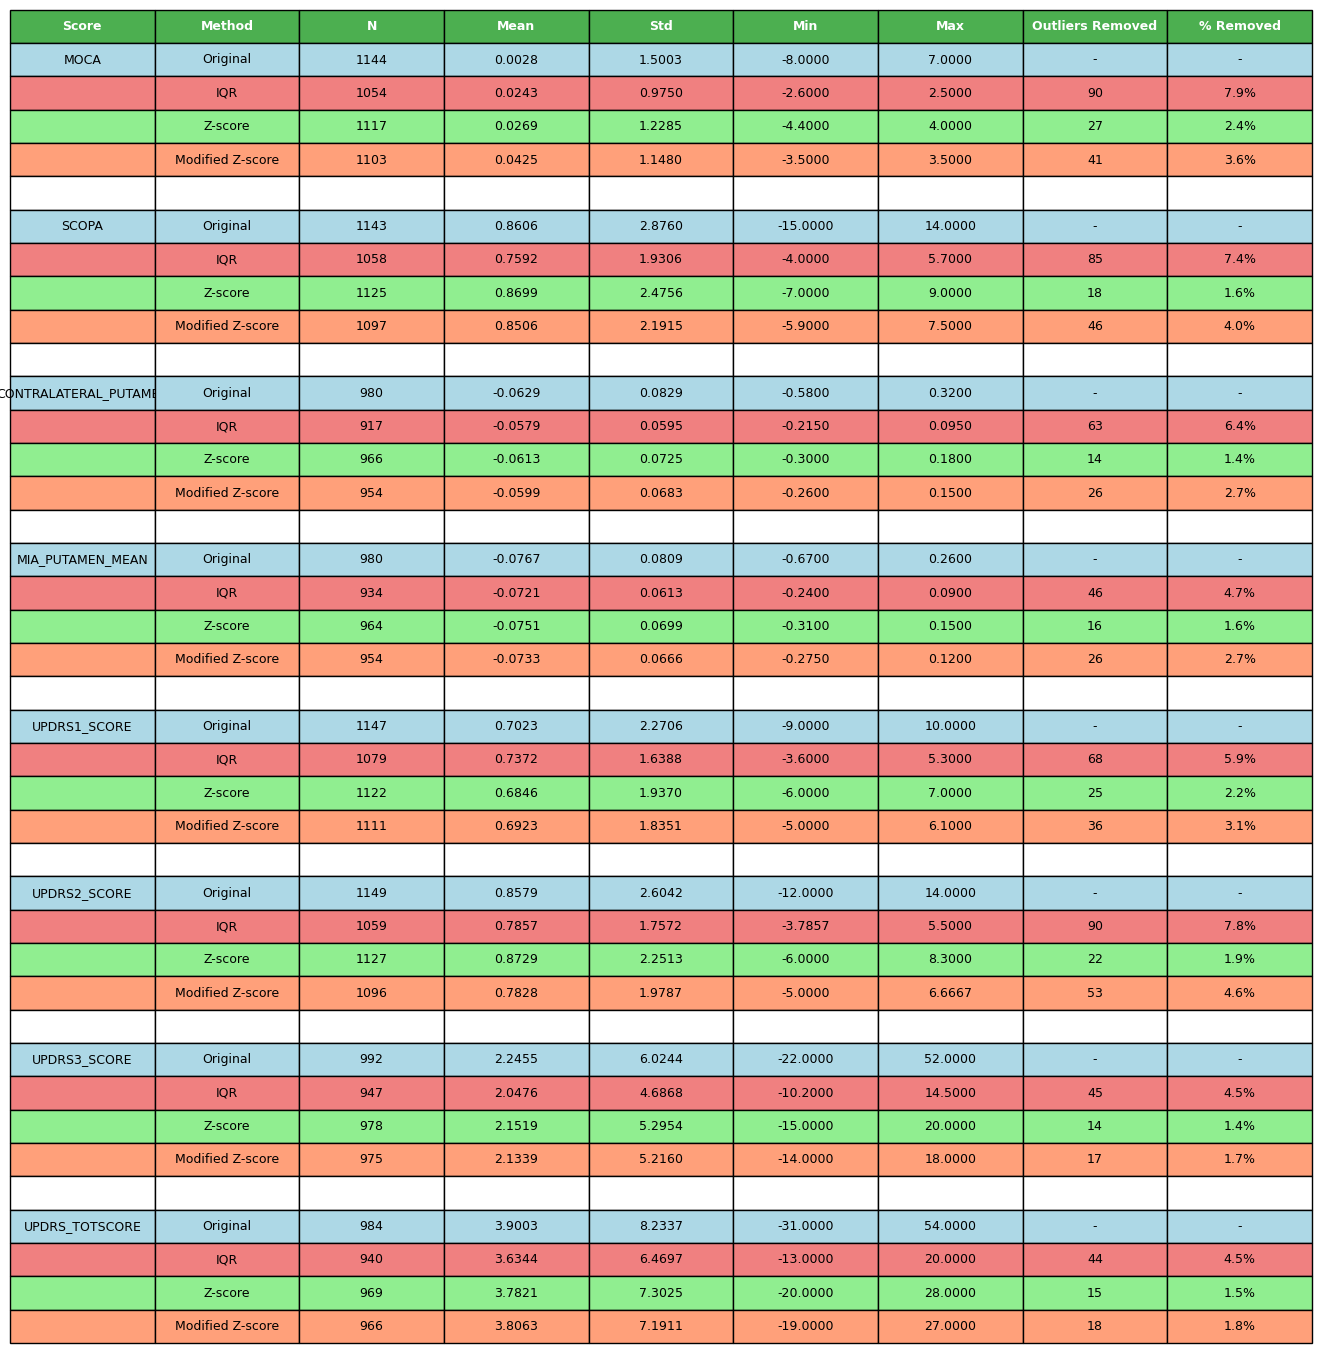


Visualization completed with separate comparisons for better clarity!
Generated 4 different visualization sets:
1. Side-by-side comparison: Original vs Each method
2. Method comparison overview: All cleaned methods together
3. Box plot comparison: Distribution shapes
4. Summary statistics table: Detailed numerical comparison

Detailed Method Comparison Table
                   Score  Original_N  Original_Mean  Original_Std  Iqr_N  \
0                   MOCA        1144         0.0028        1.5003   1054   
1                  SCOPA        1143         0.8606        2.8760   1058   
2  CONTRALATERAL_PUTAMEN         980        -0.0629        0.0829    917   
3       MIA_PUTAMEN_MEAN         980        -0.0767        0.0809    934   
4           UPDRS1_SCORE        1147         0.7023        2.2706   1079   
5           UPDRS2_SCORE        1149         0.8579        2.6042   1059   
6           UPDRS3_SCORE         992         2.2455        6.0244    947   
7         UPDRS_TOTSCORE      

In [618]:
def calculate_slope_recent_years(df, patno, score_column, years_window=3, min_points=3):
    """
    Calculate slope for a specific patient's score over a time window.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing patient data
    patno : int/str
        Patient ID
    score_column : str
        Column name for the score to calculate slope
    years_window : int, default=3
        Time window in years (0 to years_window)
    min_points : int, default=2
        Minimum number of data points required for slope calculation
    
    Returns:
    --------
    dict : Dictionary containing slope, R², p-value, number of points, and status
    """
    
    # Get patient data
    patient_data = df[df['patno'] == patno].copy()
    
    if patient_data.empty:
        return {
            'slope': np.nan, 'r_squared': np.nan, 'p_value': np.nan, 
            'n_points': 0, 'max_year': np.nan,
            'status': 'no_data'
        }
    
    # Filter data within the specified time window (Year 0-3)
    window_data = patient_data[
        (patient_data['year'] >= 0) & 
        (patient_data['year'] <= years_window) &
        (patient_data[score_column].notna())
    ].copy()
    
    if len(window_data) < min_points:
        return {
            'slope': np.nan, 'r_squared': np.nan, 'p_value': np.nan,
            'n_points': len(window_data), 'max_year': patient_data['year'].max(),
            'status': 'insufficient_data'
        }
    
    # Calculate linear regression
    try:
        slope, intercept, r_value, p_value, std_err = linregress(window_data['year'], window_data[score_column])
        r_squared = r_value ** 2
        
        return {
            'slope': slope,
            'r_squared': r_squared,
            'p_value': p_value,
            'n_points': len(window_data),
            'max_year': patient_data['year'].max(),
            'status': 'success'
        }
    
    except Exception as e:
        return {
            'slope': np.nan, 'r_squared': np.nan, 'p_value': np.nan,
            'n_points': len(window_data), 'max_year': patient_data['year'].max(),
            'status': f'error: {str(e)}'
        }

def calculate_slopes_for_all_patients(df, score_columns, **kwargs):
    """
    Calculate slopes for all patients across multiple score columns.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing patient data
    score_columns : list
        List of score column names to calculate slopes for
    **kwargs : dict
        Additional arguments passed to calculate_slope_recent_years
    
    Returns:
    --------
    pandas.DataFrame : DataFrame with slope results for all patients
    """
    unique_patnos = df['patno'].unique()
    results = []
    
    for patno in unique_patnos:
        patient_result = {'patno': patno}
        
        for score_col in score_columns:
            slope_result = calculate_slope_recent_years(df, patno, score_col, **kwargs)
            
            # Add prefix for each score column
            for key, value in slope_result.items():
                patient_result[f'{score_col}_{key}'] = value
        
        results.append(patient_result)
    
    return pd.DataFrame(results)

def remove_slope_outliers(slopes_df, outlier_info, score_columns):
    """
    Remove outliers from slope DataFrame.
    
    Parameters:
    -----------
    slopes_df : pandas.DataFrame
        DataFrame containing slope results
    outlier_info : dict
        Outlier information from detect_slope_outliers
    score_columns : list
        List of score column names
    
    Returns:
    --------
    pandas.DataFrame : DataFrame with outliers removed
    """
    cleaned_df = slopes_df.copy()
    
    for score_col in score_columns:
        slope_col = f'{score_col}_slope'
        if score_col in outlier_info:
            outlier_mask = outlier_info[score_col]['outlier_mask']
            cleaned_df.loc[outlier_mask, slope_col] = np.nan
    
    return cleaned_df

def detect_slope_outliers(slopes_df, score_columns, method='iqr', threshold=1.5):
    """
    Detect outliers in calculated slopes using specified method.
    
    Parameters:
    -----------
    slopes_df : pandas.DataFrame
        DataFrame containing slope results
    score_columns : list
        List of score column names
    method : str, default='iqr'
        Outlier detection method ('iqr', 'zscore', 'modified_zscore')
    threshold : float, default=1.5
        Threshold for outlier detection (1.5 for IQR, 3.0 for z-score)
    
    Returns:
    --------
    dict : Dictionary containing outlier information for each score
    """
    outlier_info = {}
    
    for score_col in score_columns:
        slope_col = f'{score_col}_slope'
        valid_slopes = slopes_df[slope_col].dropna()
        
        if len(valid_slopes) == 0:
            outlier_info[score_col] = {
                'outlier_mask': pd.Series([], dtype=bool),
                'outlier_count': 0,
                'outlier_patnos': [],
                'bounds': None,
                'threshold_value': threshold
            }
            continue
        
        if method == 'iqr':
            Q1 = valid_slopes.quantile(0.25)
            Q3 = valid_slopes.quantile(0.75)
            IQR = Q3 - Q1
            if IQR > 0:
                lower_bound = Q1 - threshold * IQR
                upper_bound = Q3 + threshold * IQR
                outlier_mask = (slopes_df[slope_col] < lower_bound) | (slopes_df[slope_col] > upper_bound)
                bounds = (lower_bound, upper_bound)
            else:
                outlier_mask = pd.Series([False] * len(slopes_df))
                bounds = None
        
        elif method == 'zscore':
            if valid_slopes.std() > 0:
                mean_val = valid_slopes.mean()
                std_val = valid_slopes.std()
                z_scores = np.abs((slopes_df[slope_col] - mean_val) / std_val)
                outlier_mask = z_scores > threshold
                # Calculate bounds based on z-score threshold
                lower_bound = mean_val - threshold * std_val
                upper_bound = mean_val + threshold * std_val
                bounds = (lower_bound, upper_bound)
            else:
                outlier_mask = pd.Series([False] * len(slopes_df))
                bounds = None
        
        elif method == 'modified_zscore':
            median = valid_slopes.median()
            mad = np.median(np.abs(valid_slopes - median))
            if mad > 0:
                modified_z_scores = 0.6745 * np.abs(slopes_df[slope_col] - median) / mad
                outlier_mask = modified_z_scores > threshold
                # Calculate bounds based on modified z-score threshold
                mad_threshold = threshold / 0.6745
                lower_bound = median - mad_threshold * mad
                upper_bound = median + mad_threshold * mad
                bounds = (lower_bound, upper_bound)
            else:
                outlier_mask = pd.Series([False] * len(slopes_df))
                bounds = None
        
        outlier_patnos = slopes_df.loc[outlier_mask & slopes_df[slope_col].notna(), 'patno'].tolist()
        
        outlier_info[score_col] = {
            'outlier_mask': outlier_mask,
            'outlier_count': outlier_mask.sum(),
            'outlier_patnos': outlier_patnos,
            'bounds': bounds,
            'threshold_value': threshold
        }
    
    return outlier_info

# Calculate slopes
print("=" * 60)
print("Calculating slopes (Year 0-3) for MoCA, SCOPA, Putamen Variables and MDS-UPDRS")
print("=" * 60)

# Define score columns to calculate slopes for
score_columns = ['moca', 'scopa', 'contralateral_putamen', 'mia_putamen_mean', 'updrs1_score', 'updrs2_score', 'updrs3_score', 'updrs_totscore']

# Calculate slopes for all patients
slopes_df = calculate_slopes_for_all_patients(
    curated_patient_df, 
    score_columns,
    years_window=3,
    min_points=2
)

# Analyze slope distributions before outlier removal
print("Slope analysis before outlier removal:")
for score_col in score_columns:
    slope_col = f'{score_col}_slope'
    valid_slopes = slopes_df[slope_col].dropna()
    print(f"\n{score_col.upper()}:")
    print(f"  Valid slopes: N={len(valid_slopes)}")
    if len(valid_slopes) > 0:
        print(f"  Mean={valid_slopes.mean():.4f}, Std={valid_slopes.std():.4f}")
        print(f"  Median={valid_slopes.median():.4f}")
        print(f"  Range: [{valid_slopes.min():.4f}, {valid_slopes.max():.4f}]")

# Detect outliers using different methods
print("\n" + "=" * 60)
print("Outlier Detection Results")
print("=" * 60)

outlier_methods = ['iqr', 'zscore', 'modified_zscore']
outlier_results = {}

for method in outlier_methods:
    if method == 'iqr':
        threshold = 1.5
    elif method == 'zscore':
        threshold = 3.0
    else:  # modified_zscore
        threshold = 3.5
    
    outlier_info = detect_slope_outliers(slopes_df, score_columns, method=method, threshold=threshold)
    outlier_results[method] = outlier_info
    
    print(f"\n{method.upper()} method results (threshold={threshold}):")
    for score_col in score_columns:
        outlier_count = outlier_info[score_col]['outlier_count']
        total_valid = slopes_df[f'{score_col}_slope'].notna().sum()
        outlier_pct = (outlier_count / total_valid * 100) if total_valid > 0 else 0
        print(f"  {score_col}: {outlier_count} outliers ({outlier_pct:.1f}%)")
        
        if outlier_info[score_col]['bounds']:
            bounds = outlier_info[score_col]['bounds']
            print(f"    Bounds: [{bounds[0]:.4f}, {bounds[1]:.4f}]")

# Create cleaned datasets with outliers removed
cleaned_datasets = {}
for method in outlier_methods:
    cleaned_df = remove_slope_outliers(slopes_df, outlier_results[method], score_columns)
    cleaned_datasets[method] = cleaned_df

# Enhanced visualization - separate comparisons for better clarity
print("\nGenerating separate visualizations for each outlier detection method...")

# 1. First set: Original vs Each method (side by side) 
fig, axes = plt.subplots(3, 8, figsize=(40, 20)) 
# fig.suptitle('Slope Distribution: Original vs Different Outlier Detection Methods', fontsize=16, fontweight='bold')

methods = ['iqr', 'zscore', 'modified_zscore']
method_names = ['IQR', 'Z-score', 'Modified Z-score']
colors_original = 'lightblue'
colors_cleaned = ['red', 'green', 'orange']

for method_idx, (method, method_name, clean_color) in enumerate(zip(methods, method_names, colors_cleaned)):
    for score_idx, score_col in enumerate(score_columns): 
        ax = axes[method_idx, score_idx]
        slope_col = f'{score_col}_slope'
        
        # Get data
        original_data = slopes_df[slope_col].dropna()
        cleaned_data = cleaned_datasets[method][slope_col].dropna()
        
        if len(original_data) > 0:
            # Plot histograms
            ax.hist(original_data, bins=30, alpha=0.6, label='Original', color=colors_original, density=True)
            ax.hist(cleaned_data, bins=30, alpha=0.7, label=f'{method_name} Cleaned', color=clean_color, density=True)
            
            # Add bounds
            if outlier_results[method][score_col]['bounds']:
                bounds = outlier_results[method][score_col]['bounds']
                ax.axvline(bounds[0], color=clean_color, linestyle='--', alpha=0.8, linewidth=2)
                ax.axvline(bounds[1], color=clean_color, linestyle='--', alpha=0.8, linewidth=2)
            
            # Statistics text
            original_stats = f"N={len(original_data)}, μ={original_data.mean():.3f}, σ={original_data.std():.3f}"
            cleaned_stats = f"N={len(cleaned_data)}, μ={cleaned_data.mean():.3f}, σ={cleaned_data.std():.3f}"
            outliers_removed = len(original_data) - len(cleaned_data)
            outlier_pct = (outliers_removed / len(original_data) * 100) if len(original_data) > 0 else 0
            
            # Add statistics as text
            ax.text(0.02, 0.98, f'Original: {original_stats}', transform=ax.transAxes, 
                   verticalalignment='top', fontsize=8, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
            ax.text(0.02, 0.85, f'Cleaned: {cleaned_stats}', transform=ax.transAxes, 
                   verticalalignment='top', fontsize=8, bbox=dict(boxstyle='round', facecolor=clean_color, alpha=0.7))
            ax.text(0.02, 0.72, f'Removed: {outliers_removed} ({outlier_pct:.1f}%)', transform=ax.transAxes, 
                   verticalalignment='top', fontsize=8, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            ax.set_title(f'{score_col.upper()} - {method_name}')
            ax.set_xlabel('Slope')
            ax.set_ylabel('Density')
            ax.legend(loc='upper right', fontsize=8)
            ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Second set: Method comparison overview (all cleaned methods together)
fig, axes = plt.subplots(2, 4, figsize=(20, 12)) 
axes = axes.ravel()
# fig.suptitle('Comparison of Different Outlier Detection Methods', fontsize=16, fontweight='bold')

method_colors = {'iqr': 'red', 'zscore': 'green', 'modified_zscore': 'orange'}
method_labels = {'iqr': 'IQR', 'zscore': 'Z-score', 'modified_zscore': 'Modified Z-score'}

for i, score_col in enumerate(score_columns):  
    if i < 8: 
        slope_col = f'{score_col}_slope'
        
        # Plot cleaned data for all methods
        for method in methods:
            cleaned_data = cleaned_datasets[method][slope_col].dropna()
            if len(cleaned_data) > 0:
                axes[i].hist(cleaned_data, bins=30, alpha=0.5, label=f'{method_labels[method]} (N={len(cleaned_data)})', 
                            color=method_colors[method], density=True)
        
        axes[i].set_title(f'{score_col.upper()} - Method Comparison')
        axes[i].set_xlabel('Slope')
        axes[i].set_ylabel('Density')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Hide excess subplots
# if len(score_columns) < 6:
#     axes[5].axis('off')

plt.tight_layout()
plt.show()

# 3. Third set: Box plots for better comparison
fig, axes = plt.subplots(2, 4, figsize=(18, 12))  
axes = axes.ravel()
# fig.suptitle('Box Plot Comparison: Original vs Cleaned Data', fontsize=16, fontweight='bold')

for i, score_col in enumerate(score_columns):
    if i < 8:  # Restrict the plot number
        slope_col = f'{score_col}_slope'
        
        # Prepare data for box plot
        plot_data = []
        labels = []
        
        # Original data
        original_data = slopes_df[slope_col].dropna()
        plot_data.append(original_data.values)
        labels.append('Original')
        
        # Cleaned data for each method
        for method in methods:
            cleaned_data = cleaned_datasets[method][slope_col].dropna()
            plot_data.append(cleaned_data.values)
            labels.append(method_labels[method])
        
        # Create box plot
        bp = axes[i].boxplot(plot_data, labels=labels, patch_artist=True)
        
        # Color the boxes
        colors = [colors_original] + list(method_colors.values())
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        axes[i].set_title(f'{score_col.upper()} - Distribution Comparison')
        axes[i].set_ylabel('Slope')
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)

# Hide excess subplots
# if len(score_columns) < 6:
#     axes[5].axis('off')

plt.tight_layout()
plt.show()

# 4. Fourth set: Summary statistics table visualization
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')

# Create summary table data
table_data = []
headers = ['Score', 'Method', 'N', 'Mean', 'Std', 'Min', 'Max', 'Outliers Removed', '% Removed']

for score_col in score_columns:
    slope_col = f'{score_col}_slope'
    original_data = slopes_df[slope_col].dropna()
    
    # Original row
    table_data.append([
        score_col.upper(), 'Original', len(original_data), 
        f"{original_data.mean():.4f}", f"{original_data.std():.4f}",
        f"{original_data.min():.4f}", f"{original_data.max():.4f}",
        '-', '-'
    ])
    
    # Cleaned rows
    for method in methods:
        cleaned_data = cleaned_datasets[method][slope_col].dropna()
        outliers_removed = len(original_data) - len(cleaned_data)
        outlier_pct = (outliers_removed / len(original_data) * 100) if len(original_data) > 0 else 0
        
        table_data.append([
            '', method_labels[method], len(cleaned_data),
            f"{cleaned_data.mean():.4f}", f"{cleaned_data.std():.4f}",
            f"{cleaned_data.min():.4f}", f"{cleaned_data.max():.4f}",
            f"{outliers_removed}", f"{outlier_pct:.1f}%"
        ])
    
    # Add separator
    table_data.append([''] * len(headers))

# Remove last separator
table_data = table_data[:-1]

# Create table
table = ax.table(cellText=table_data, colLabels=headers, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 2)

# Style the table
for i in range(len(headers)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color code the rows
row_colors = ['lightgray', 'lightcoral', 'lightgreen', 'lightsalmon']
for i, row in enumerate(table_data):
    if row[0]:  # Score name row
        color = 'lightblue'
    elif row[1] == 'Original':
        color = 'lightgray'
    elif row[1] == 'IQR':
        color = 'lightcoral'
    elif row[1] == 'Z-score':
        color = 'lightgreen'
    elif row[1] == 'Modified Z-score':
        color = 'lightsalmon'
    else:
        color = 'white'
    
    for j in range(len(headers)):
        table[(i+1, j)].set_facecolor(color)

# plt.title('Detailed Comparison of Outlier Detection Methods', fontsize=14, fontweight='bold', pad=20)
plt.show()

print("\nVisualization completed with separate comparisons for better clarity!")
print("Generated 4 different visualization sets:")
print("1. Side-by-side comparison: Original vs Each method")
print("2. Method comparison overview: All cleaned methods together")  
print("3. Box plot comparison: Distribution shapes")
print("4. Summary statistics table: Detailed numerical comparison")

# Create a detailed comparison table
print("\n" + "=" * 80)
print("Detailed Method Comparison Table")
print("=" * 80)

comparison_data = []
for score_col in score_columns:
    slope_col = f'{score_col}_slope'
    original = slopes_df[slope_col].dropna()
    
    row_data = {
        'Score': score_col.upper(),
        'Original_N': len(original),
        'Original_Mean': original.mean() if len(original) > 0 else np.nan,
        'Original_Std': original.std() if len(original) > 0 else np.nan
    }
    
    for method in outlier_methods:
        cleaned = cleaned_datasets[method][slope_col].dropna()
        outliers_removed = len(original) - len(cleaned)
        outlier_pct = (outliers_removed / len(original) * 100) if len(original) > 0 else 0
        
        method_name = method.replace('_', ' ').title()
        row_data[f'{method_name}_N'] = len(cleaned)
        row_data[f'{method_name}_Mean'] = cleaned.mean() if len(cleaned) > 0 else np.nan
        row_data[f'{method_name}_Std'] = cleaned.std() if len(cleaned) > 0 else np.nan
        row_data[f'{method_name}_Removed'] = outliers_removed
        row_data[f'{method_name}_Removed_Pct'] = outlier_pct
        
        # Add bounds information
        if outlier_results[method][score_col]['bounds']:
            bounds = outlier_results[method][score_col]['bounds']
            row_data[f'{method_name}_Lower_Bound'] = bounds[0]
            row_data[f'{method_name}_Upper_Bound'] = bounds[1]
        else:
            row_data[f'{method_name}_Lower_Bound'] = np.nan
            row_data[f'{method_name}_Upper_Bound'] = np.nan
    
    comparison_data.append(row_data)

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Save results
# slopes_df.to_csv('./data/1_1_patient_slopes_original.csv', index=False)
# cleaned_datasets['iqr'].to_csv('./data/1_1_patient_slopes_iqr_cleaned.csv', index=False)
# cleaned_datasets['zscore'].to_csv('./data/1_1_patient_slopes_zscore_cleaned.csv', index=False)
# cleaned_datasets['modified_zscore'].to_csv('./data/1_1_patient_slopes_modified_zscore_cleaned.csv', index=False)

In [619]:
# baseline_with_slopes.isnull().sum().sort_values(ascending=False)
# curated_df[curated_df['patno'] == 102418][['patno', 'year', 'mia_putamen_l', 'mia_putamen_r', 'mia_putamen_mean']].sort_values(by='year')

Merging Slope Results with Baseline Data
Merging slope data with baseline data...
After merging original slopes: (1254, 198)
After merging IQR cleaned slopes: (1254, 206)
After merging Z-score cleaned slopes: (1254, 214)
After merging Modified Z-score cleaned slopes: (1254, 222)

Slope columns added to baseline data:
  moca_slope_original
  scopa_slope_original
  contralateral_putamen_slope_original
  mia_putamen_mean_slope_original
  updrs1_score_slope_original
  updrs2_score_slope_original
  updrs3_score_slope_original
  updrs_totscore_slope_original
  moca_slope_iqr_cleaned
  scopa_slope_iqr_cleaned
  contralateral_putamen_slope_iqr_cleaned
  mia_putamen_mean_slope_iqr_cleaned
  updrs1_score_slope_iqr_cleaned
  updrs2_score_slope_iqr_cleaned
  updrs3_score_slope_iqr_cleaned
  updrs_totscore_slope_iqr_cleaned
  moca_slope_zscore_cleaned
  scopa_slope_zscore_cleaned
  contralateral_putamen_slope_zscore_cleaned
  mia_putamen_mean_slope_zscore_cleaned
  updrs1_score_slope_zscore_cleaned

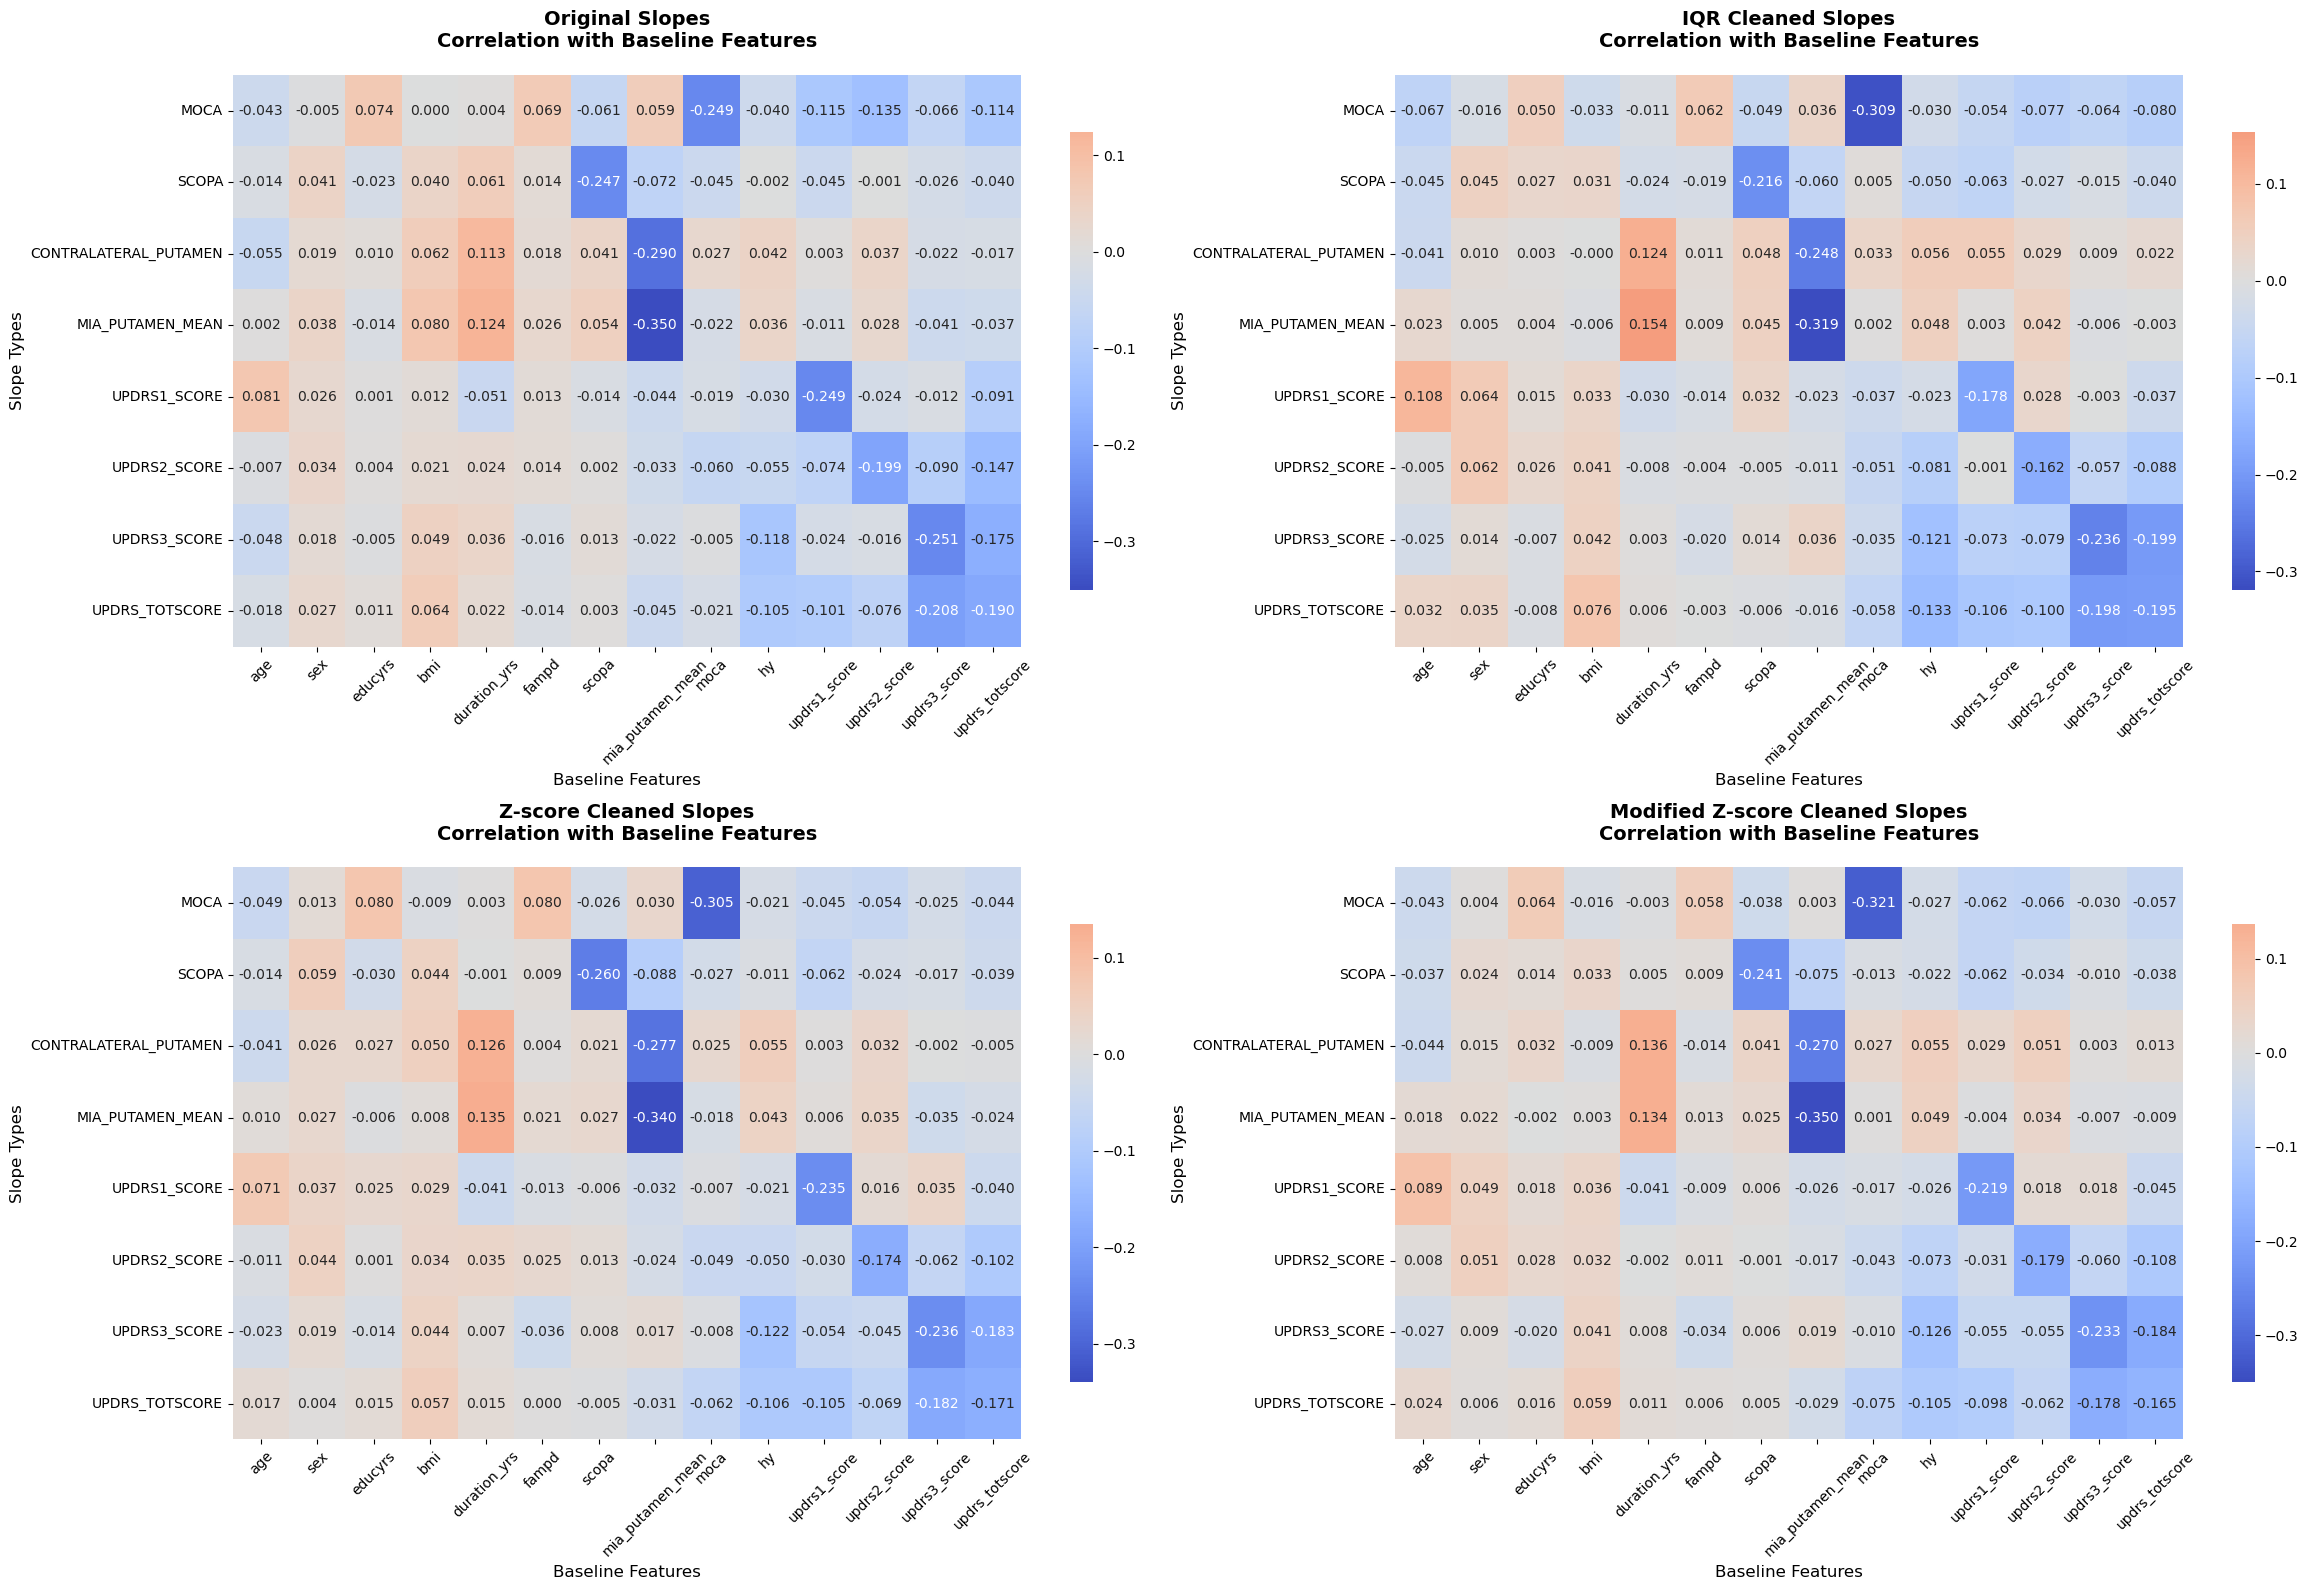


Generating comprehensive comparison heatmap...


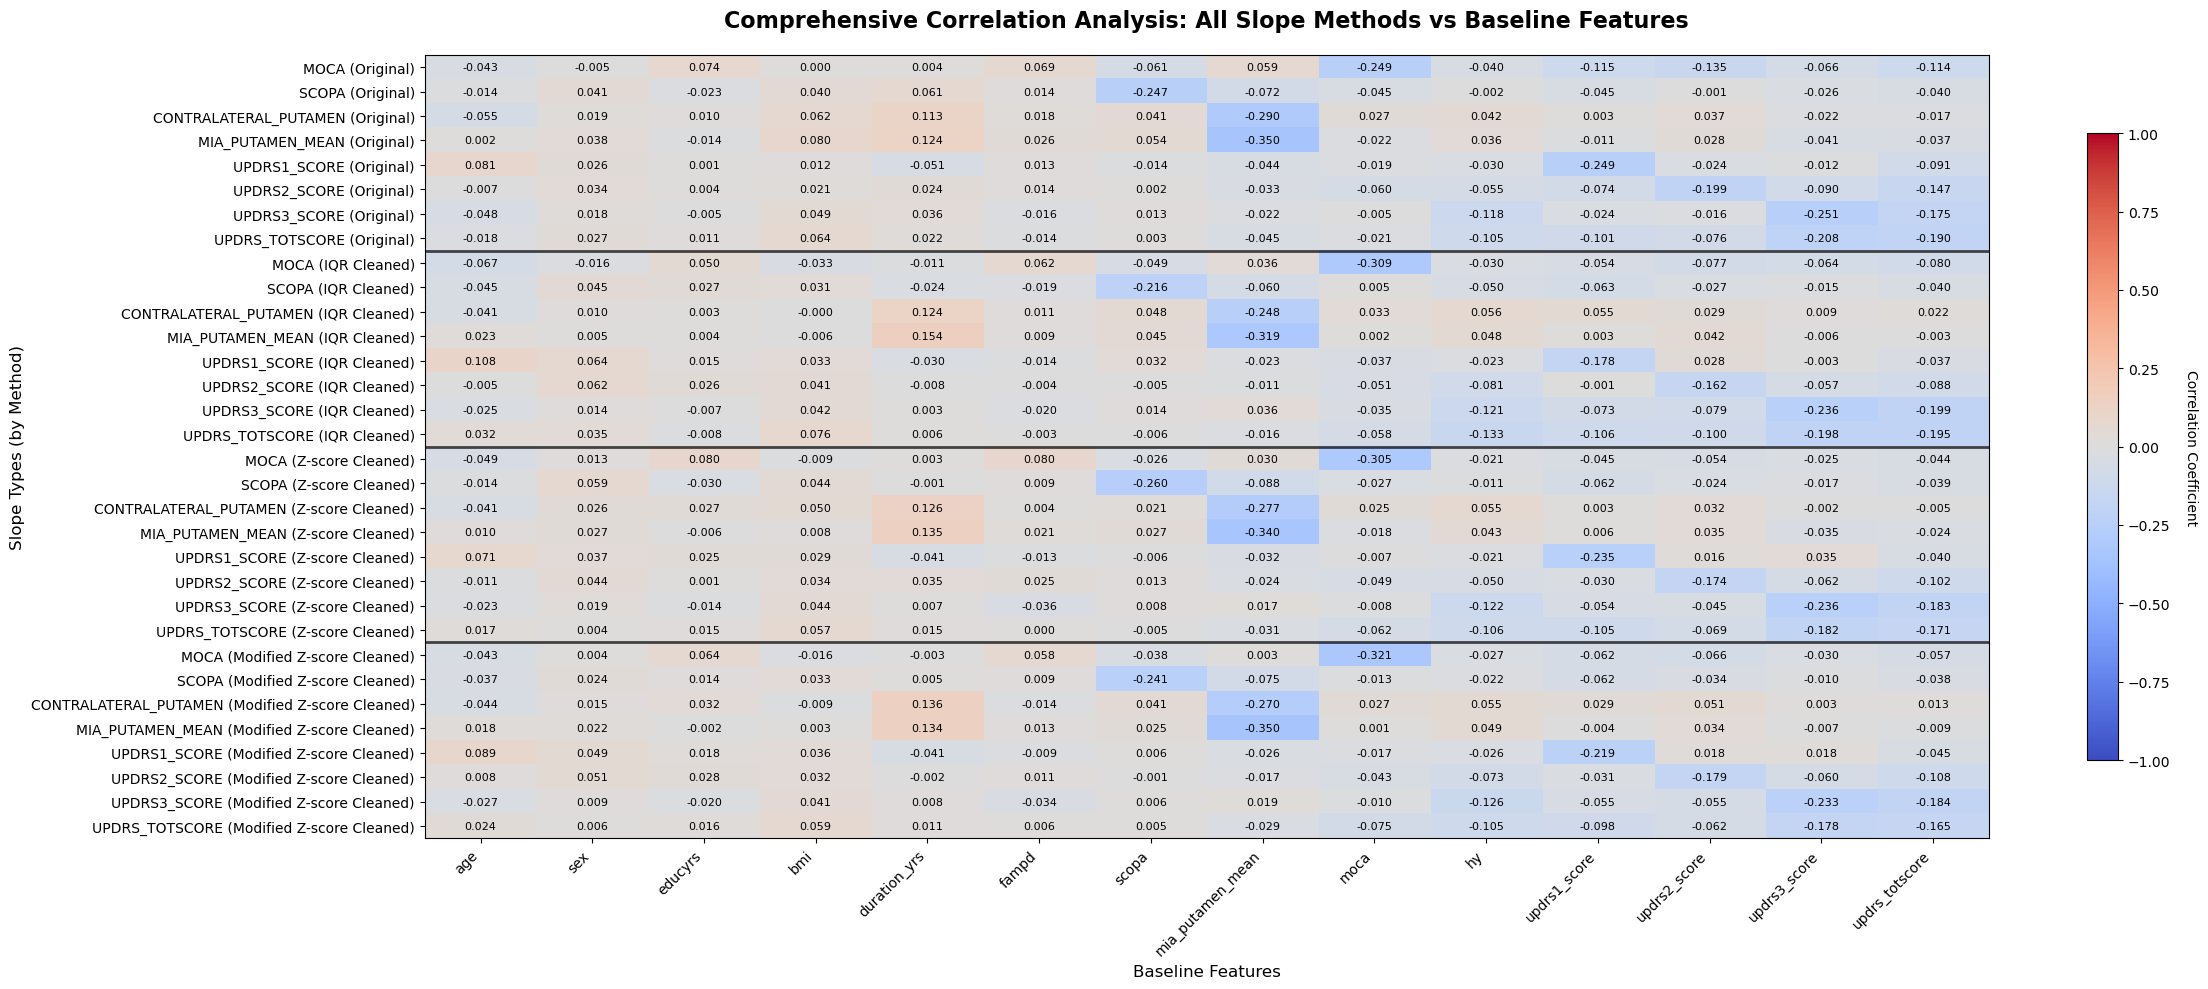


Correlation Pattern Analysis Across Methods:

AGE:
  MOCA slope correlations:
    Original: -0.0430
    IQR Cleaned: -0.0674
    Z-score Cleaned: -0.0489
    Modified Z-score Cleaned: -0.0428
    Std Dev: 0.0101, Range: 0.0246
  SCOPA slope correlations:
    Original: -0.0145
    IQR Cleaned: -0.0447
    Z-score Cleaned: -0.0138
    Modified Z-score Cleaned: -0.0367
    Std Dev: 0.0136, Range: 0.0309
  CONTRALATERAL_PUTAMEN slope correlations:
    Original: -0.0549
    IQR Cleaned: -0.0412
    Z-score Cleaned: -0.0407
    Modified Z-score Cleaned: -0.0440
    Std Dev: 0.0057, Range: 0.0142
  MIA_PUTAMEN_MEAN slope correlations:
    Original: 0.0019
    IQR Cleaned: 0.0229
    Z-score Cleaned: 0.0096
    Modified Z-score Cleaned: 0.0179
    Std Dev: 0.0080, Range: 0.0211
  UPDRS1_SCORE slope correlations:
    Original: 0.0813
    IQR Cleaned: 0.1080
    Z-score Cleaned: 0.0711
    Modified Z-score Cleaned: 0.0895
    Std Dev: 0.0135, Range: 0.0370
  UPDRS2_SCORE slope correlations:
   

In [620]:
print("=" * 60)
print("Merging Slope Results with Baseline Data")
print("=" * 60)

# Extract slope columns for each method
slope_cols = ['moca_slope', 'scopa_slope', 'contralateral_putamen_slope', 'mia_putamen_mean_slope', 'updrs1_score_slope', 'updrs2_score_slope', 'updrs3_score_slope', 'updrs_totscore_slope']
# Create slope datasets for merging
slope_data_original = slopes_df[['patno'] + slope_cols].copy()
slope_data_original.columns = ['patno'] + [f'{col}_original' for col in slope_cols]

slope_data_iqr = cleaned_datasets['iqr'][['patno'] + slope_cols].copy()
slope_data_iqr.columns = ['patno'] + [f'{col}_iqr_cleaned' for col in slope_cols]

slope_data_zscore = cleaned_datasets['zscore'][['patno'] + slope_cols].copy()
slope_data_zscore.columns = ['patno'] + [f'{col}_zscore_cleaned' for col in slope_cols]

slope_data_modified_zscore = cleaned_datasets['modified_zscore'][['patno'] + slope_cols].copy()
slope_data_modified_zscore.columns = ['patno'] + [f'{col}_modified_zscore_cleaned' for col in slope_cols]

# Merge all slope data with baseline data
print("Merging slope data with baseline data...")
baseline_with_slopes = curated_patient_baseline_df.copy()

# Merge original slopes
baseline_with_slopes = baseline_with_slopes.merge(slope_data_original, on='patno', how='left')
print(f"After merging original slopes: {baseline_with_slopes.shape}")

# Merge IQR cleaned slopes
baseline_with_slopes = baseline_with_slopes.merge(slope_data_iqr, on='patno', how='left')
print(f"After merging IQR cleaned slopes: {baseline_with_slopes.shape}")

# Merge Z-score cleaned slopes
baseline_with_slopes = baseline_with_slopes.merge(slope_data_zscore, on='patno', how='left')
print(f"After merging Z-score cleaned slopes: {baseline_with_slopes.shape}")

# Merge Modified Z-score cleaned slopes
baseline_with_slopes = baseline_with_slopes.merge(slope_data_modified_zscore, on='patno', how='left')
print(f"After merging Modified Z-score cleaned slopes: {baseline_with_slopes.shape}")

# Display slope column names
print("\nSlope columns added to baseline data:")
slope_columns_added = [col for col in baseline_with_slopes.columns if 'slope' in col]
for col in slope_columns_added:
    print(f"  {col}")

# Check missing values in slope columns
print(f"\nMissing values in slope columns:")
slope_missing = baseline_with_slopes[slope_columns_added].isnull().sum()
for col, missing_count in slope_missing.items():
    missing_pct = (missing_count / len(baseline_with_slopes)) * 100
    print(f"  {col}: {missing_count} ({missing_pct:.1f}%)")

# Display basic statistics for slope columns
print(f"\nBasic statistics for slope columns:")
slope_stats = baseline_with_slopes[slope_columns_added].describe()
print(slope_stats.round(4))

# Create a comparison of slopes across methods
print(f"\nSlope comparison across methods:")
for base_score in ['moca', 'updrs1_score', 'updrs2_score', 'updrs3_score', 'updrs_totscore']:
    print(f"\n{base_score.upper()} Slopes:")
    
    original_col = f'{base_score}_slope_original'
    iqr_col = f'{base_score}_slope_iqr_cleaned'
    zscore_col = f'{base_score}_slope_zscore_cleaned'
    modified_col = f'{base_score}_slope_modified_zscore_cleaned'
    
    # Count valid slopes for each method
    original_valid = baseline_with_slopes[original_col].notna().sum()
    iqr_valid = baseline_with_slopes[iqr_col].notna().sum()
    zscore_valid = baseline_with_slopes[zscore_col].notna().sum()
    modified_valid = baseline_with_slopes[modified_col].notna().sum()
    
    print(f"  Original: {original_valid} valid slopes")
    print(f"  IQR cleaned: {iqr_valid} valid slopes")
    print(f"  Z-score cleaned: {zscore_valid} valid slopes")
    print(f"  Modified Z-score cleaned: {modified_valid} valid slopes")
    
    # Calculate means for comparison
    if original_valid > 0:
        print(f"  Mean slopes:")
        print(f"    Original: {baseline_with_slopes[original_col].mean():.4f}")
        if iqr_valid > 0:
            print(f"    IQR cleaned: {baseline_with_slopes[iqr_col].mean():.4f}")
        if zscore_valid > 0:
            print(f"    Z-score cleaned: {baseline_with_slopes[zscore_col].mean():.4f}")
        if modified_valid > 0:
            print(f"    Modified Z-score cleaned: {baseline_with_slopes[modified_col].mean():.4f}")

# Save the comprehensive baseline data with slopes
# output_filename = './data/2_1_baseline_with_all_slopes.csv'
# baseline_with_slopes.to_csv(output_filename, index=False)
# print(f"\nBaseline data with all slope methods saved to: {output_filename}")

# Create a summary DataFrame showing the relationship between baseline features and slopes
print(f"\nCreating correlation analysis between baseline features and slopes...")

# Select key baseline features for correlation analysis
key_baseline_features = ['age', 'sex', 'educyrs', 'bmi', 'duration_yrs', 'fampd', 
                         'scopa', 'mia_putamen_mean',
                         'moca', 'hy', 'updrs1_score', 'updrs2_score', 'updrs3_score', 'updrs_totscore']

# Define slope methods and their labels
slope_methods = ['original', 'iqr_cleaned', 'zscore_cleaned', 'modified_zscore_cleaned']
method_labels = {'original': 'Original', 'iqr_cleaned': 'IQR Cleaned', 
                'zscore_cleaned': 'Z-score Cleaned', 'modified_zscore_cleaned': 'Modified Z-score Cleaned'}

# Create correlation analysis for each method
correlation_results = {}

for method in slope_methods:
    print(f"\nCalculating correlations for {method_labels[method]} slopes...")
    correlation_data = []
    
    for feature in key_baseline_features:
        if feature in baseline_with_slopes.columns:
            row_data = {'baseline_feature': feature}
            
            for base_score in score_columns:
                slope_col = f'{base_score}_slope_{method}'
                if slope_col in baseline_with_slopes.columns:
                    corr_val = baseline_with_slopes[feature].corr(baseline_with_slopes[slope_col])
                    row_data[f'{base_score}_slope_corr'] = corr_val
            
            correlation_data.append(row_data)
    
    correlation_df = pd.DataFrame(correlation_data)
    correlation_results[method] = correlation_df
    
    print(f"Correlation between baseline features and {method_labels[method]} slopes:")
    print(correlation_df.round(3))

# Generate separate heatmaps for each method
print(f"\nGenerating correlation heatmaps for each slope method...")

fig, axes = plt.subplots(2, 2, figsize=(24, 16))
axes = axes.ravel()

for idx, method in enumerate(slope_methods):
    ax = axes[idx]
    correlation_df = correlation_results[method]
    
    # Prepare correlation matrix
    corr_columns = [col for col in correlation_df.columns if 'slope_corr' in col]
    corr_matrix = correlation_df[corr_columns].T
    
    # Create heatmap
    sns.heatmap(corr_matrix, 
               xticklabels=correlation_df['baseline_feature'],
               yticklabels=[col.replace('_slope_corr', '').upper() for col in corr_columns],
               annot=True, 
               cmap='coolwarm', 
               center=0,
               fmt='.3f',
               ax=ax,
               cbar_kws={'shrink': 0.8})
    
    ax.set_title(f'{method_labels[method]} Slopes\nCorrelation with Baseline Features', 
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Baseline Features', fontsize=12)
    ax.set_ylabel('Slope Types', fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', rotation=0, labelsize=10)

plt.tight_layout()
plt.show()

# Create a comprehensive comparison heatmap showing all methods side by side
print(f"\nGenerating comprehensive comparison heatmap...")

fig, ax = plt.subplots(figsize=(24, 10))

# Combine all correlation data
combined_corr_data = []
combined_labels_y = []
combined_labels_method = []

for method in slope_methods:
    correlation_df = correlation_results[method]
    corr_columns = [col for col in correlation_df.columns if 'slope_corr' in col]
    corr_matrix = correlation_df[corr_columns].T
    
    for score_type in corr_matrix.index:
        combined_corr_data.append(corr_matrix.loc[score_type].values)
        score_name = score_type.replace('_slope_corr', '').upper()
        combined_labels_y.append(f"{score_name} ({method_labels[method]})")

# Create combined correlation matrix
combined_matrix = np.array(combined_corr_data)

# Create comprehensive heatmap
im = ax.imshow(combined_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Set ticks and labels
ax.set_xticks(range(len(key_baseline_features)))
ax.set_xticklabels(key_baseline_features, rotation=45, ha='right')
ax.set_yticks(range(len(combined_labels_y)))
ax.set_yticklabels(combined_labels_y, fontsize=10)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# Add correlation values as text
for i in range(len(combined_labels_y)):
    for j in range(len(key_baseline_features)):
        text = ax.text(j, i, f'{combined_matrix[i, j]:.3f}',
                      ha="center", va="center", color="black" if abs(combined_matrix[i, j]) < 0.5 else "white",
                      fontsize=8)

ax.set_title('Comprehensive Correlation Analysis: All Slope Methods vs Baseline Features', 
            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Baseline Features', fontsize=12)
ax.set_ylabel('Slope Types (by Method)', fontsize=12)

# Add horizontal lines to separate methods
method_boundaries = [8, 16, 24]  # 4 scores per method
for boundary in method_boundaries:
    ax.axhline(y=boundary-0.5, color='black', linewidth=2, alpha=0.7)

plt.tight_layout()
plt.show()

# Generate summary statistics comparing correlation patterns across methods
print(f"\nCorrelation Pattern Analysis Across Methods:")
print("=" * 60)

for feature in key_baseline_features:
    print(f"\n{feature.upper()}:")
    for base_score in score_columns:
        print(f"  {base_score.upper()} slope correlations:")
        correlations = []
        for method in slope_methods:
            slope_col = f'{base_score}_slope_{method}'
            if slope_col in baseline_with_slopes.columns:
                corr_val = baseline_with_slopes[feature].corr(baseline_with_slopes[slope_col])
                correlations.append(corr_val)
                print(f"    {method_labels[method]}: {corr_val:.4f}")
        
        if correlations:
            corr_std = np.std(correlations)
            corr_range = max(correlations) - min(correlations)
            print(f"    Std Dev: {corr_std:.4f}, Range: {corr_range:.4f}")

# # Save correlation results to CSV
# print(f"\nSaving correlation results...")
# for method in slope_methods:
#     filename = f'./data/1_correlations_{method}.csv'
#     correlation_results[method].to_csv(filename, index=False)
#     print(f"  {method_labels[method]} correlations saved to: {filename}")

# print(f"\nCorrelation analysis completed for all slope methods!")

print(f"Final dataset shape: {baseline_with_slopes.shape}")
print(f"Total slope columns added: {len(slope_columns_added)}")

**Calculate Time to achieving a Hoehn Yahr stage of 3 or greater (from Baseline)**

CALCULATING TIME TO HY STAGE 3+


SURVIVAL ANALYSIS SUMMARY REPORT
Total patients: 1254

Excluded patients: 251 (20.0%)
  - no_follow_up: 180
  - missing_baseline_hy: 54
  - baseline_hy3_plus: 17

Analysable patients: 1003 (80.0%)

Event occurrence: 178 (17.7%)
Censored: 825 (82.3%)

Event time statistics:
  Median time: 5.0 years
  Mean time: 5.5 years
  Range: 1.0 - 13.0 years

Follow-up time statistics:
  Median follow-up: 3.0 years
  Maximum follow-up: 14.0 years


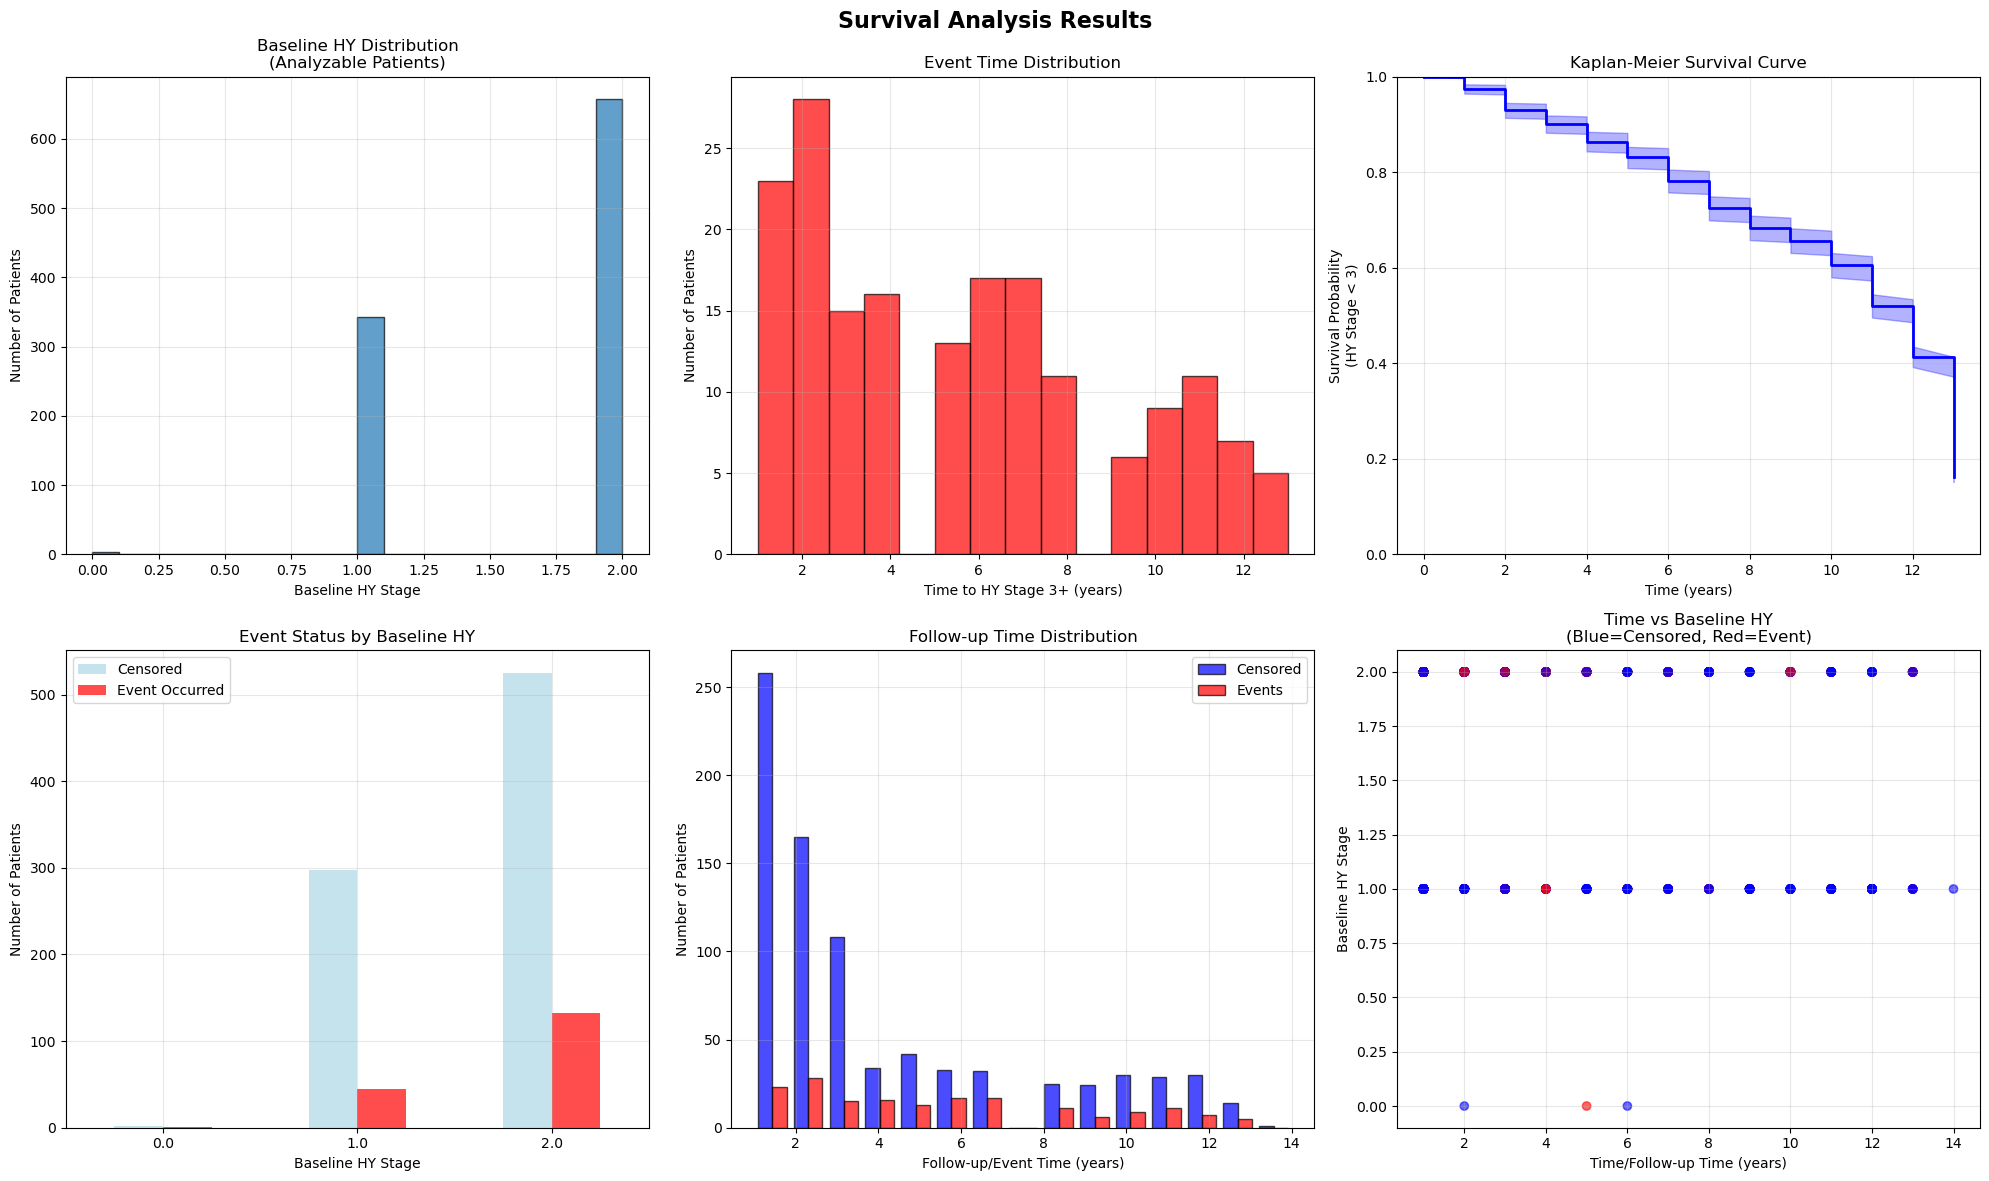


DETAILED ANALYSIS BY BASELINE HY STAGE:
   baseline_hy  n_total  n_events  event_rate_pct  mean_time_to_event  \
0          0.0        3       1.0           33.33                5.00   
1          1.0      343      45.0           13.12                6.38   
2          2.0      657     132.0           20.09                5.18   

   median_time_to_event  median_follow_up  
0                   5.0               5.0  
1                   6.0               4.0  
2                   4.0               2.0  

MODELING DATASET SUMMARY:
  Total samples: 1003
  Events: 178.0
  Censored: 825
  Event rate: 17.7%

CORRELATION ANALYSIS: SLOPES vs SURVIVAL
Correlation between slopes and survival time (events only):
              slope_type  correlation_with_survival_time  n_patients
0                   moca                          0.0893         178
1                  scopa                         -0.1281         178
2  contralateral_putamen                          0.0425         156
3       mia

In [621]:
def calculate_time_to_hy3_plus_corrected(df, patno):
    # Get patient data
    patient_data = df[df['patno'] == patno].copy()
    
    if patient_data.empty:
        return {
            'patno': patno,
            'time_to_hy3_plus': np.nan,
            'event_occurred': np.nan,
            'censored': np.nan,
            'baseline_hy': np.nan,
            'final_hy': np.nan,
            'last_visit_year': np.nan,
            'total_visits': 0,
            'status': 'no_data',
            'exclude_reason': 'no_data'
        }
    
    # Sort and get baseline data
    patient_data = patient_data.sort_values('year')
    baseline_data = patient_data[patient_data['year'] == 0]
    
    # Check baseline data availability
    if baseline_data.empty:
        return {
            'patno': patno,
            'time_to_hy3_plus': np.nan,
            'event_occurred': np.nan,
            'censored': np.nan,
            'baseline_hy': np.nan,
            'final_hy': np.nan,
            'last_visit_year': patient_data['year'].max(),
            'total_visits': len(patient_data),
            'status': 'excluded',
            'exclude_reason': 'no_baseline'
        }
    
    baseline_hy = baseline_data['hy'].iloc[0] if not baseline_data['hy'].isna().all() else np.nan
    
    # Exclude patients with baseline HY3+
    if pd.notna(baseline_hy) and baseline_hy >= 3.0:
        return {
            'patno': patno,
            'time_to_hy3_plus': np.nan,
            'event_occurred': np.nan,
            'censored': np.nan,
            'baseline_hy': baseline_hy,
            'final_hy': baseline_hy,
            'last_visit_year': patient_data['year'].max(),
            'total_visits': len(patient_data),
            'status': 'excluded',
            'exclude_reason': 'baseline_hy3_plus'
        }
    
    # Exclude patients with missing baseline HY
    if pd.isna(baseline_hy):
        return {
            'patno': patno,
            'time_to_hy3_plus': np.nan,
            'event_occurred': np.nan,
            'censored': np.nan,
            'baseline_hy': np.nan,
            'final_hy': np.nan,
            'last_visit_year': patient_data['year'].max(),
            'total_visits': len(patient_data),
            'status': 'excluded',
            'exclude_reason': 'missing_baseline_hy'
        }
    
    # Get follow-up data
    follow_up_data = patient_data[patient_data['year'] > 0]
    valid_follow_up = follow_up_data.dropna(subset=['hy'])
    
    if valid_follow_up.empty:
        # Only baseline data, no follow-up
        return {
            'patno': patno,
            'time_to_hy3_plus': np.nan,
            'event_occurred': np.nan,
            'censored': np.nan,
            'baseline_hy': baseline_hy,
            'final_hy': baseline_hy,
            'last_visit_year': patient_data['year'].max(),
            'total_visits': len(patient_data),
            'status': 'excluded',
            'exclude_reason': 'no_follow_up'
        }
    
    # Look for event occurrence
    event_visits = valid_follow_up[valid_follow_up['hy'] >= 3.0]
    last_visit_year = valid_follow_up['year'].max()
    last_hy = valid_follow_up.iloc[-1]['hy']
    
    if not event_visits.empty:
        # Event occurred
        event_year = event_visits['year'].min()
        return {
            'patno': patno,
            'time_to_hy3_plus': event_year,
            'event_occurred': 1,  # Use 1/0 instead of True/False for statistical analysis
            'censored': 0,
            'baseline_hy': baseline_hy,
            'final_hy': event_visits.iloc[0]['hy'],
            'last_visit_year': last_visit_year,
            'total_visits': len(patient_data),
            'status': 'event',
            'exclude_reason': None
        }
    else:
        # Event did not occur, right censored
        return {
            'patno': patno,
            'time_to_hy3_plus': last_visit_year,
            'event_occurred': 0,
            'censored': 1,
            'baseline_hy': baseline_hy,
            'final_hy': last_hy,
            'last_visit_year': last_visit_year,
            'total_visits': len(patient_data),
            'status': 'censored',
            'exclude_reason': None
        }

def survival_analysis_summary(time_to_event_df):
    """
    Generate comprehensive survival analysis summary
    """
    print("=" * 70)
    print("SURVIVAL ANALYSIS SUMMARY REPORT")
    print("=" * 70)
    
    # Overall statistics
    total_patients = len(time_to_event_df)
    print(f"Total patients: {total_patients}")
    
    # Exclusion statistics
    excluded = time_to_event_df[time_to_event_df['status'] == 'excluded']
    if len(excluded) > 0:
        print(f"\nExcluded patients: {len(excluded)} ({len(excluded)/total_patients*100:.1f}%)")
        exclude_reasons = excluded['exclude_reason'].value_counts()
        for reason, count in exclude_reasons.items():
            print(f"  - {reason}: {count}")
    
    # Analysable patients
    analysable = time_to_event_df[time_to_event_df['status'].isin(['event', 'censored'])]
    n_analysable = len(analysable)

    if n_analysable == 0:
        print("\n❌ No analysable patients found!")
        return None
    
    print(f"\nAnalysable patients: {n_analysable} ({n_analysable/total_patients*100:.1f}%)")
    
    # Event statistics
    events = analysable[analysable['event_occurred'] == 1]
    censored = analysable[analysable['event_occurred'] == 0]
    
    n_events = len(events)
    n_censored = len(censored)
    event_rate = n_events / n_analysable * 100
    
    print(f"\nEvent occurrence: {n_events} ({event_rate:.1f}%)")
    print(f"Censored: {n_censored} ({100-event_rate:.1f}%)")
    
    # Time statistics
    if n_events > 0:
        print(f"\nEvent time statistics:")
        print(f"  Median time: {events['time_to_hy3_plus'].median():.1f} years")
        print(f"  Mean time: {events['time_to_hy3_plus'].mean():.1f} years")
        print(f"  Range: {events['time_to_hy3_plus'].min():.1f} - {events['time_to_hy3_plus'].max():.1f} years")
    
    # Follow-up time statistics
    print(f"\nFollow-up time statistics:")
    all_times = analysable['time_to_hy3_plus'].dropna()
    if len(all_times) > 0:
        print(f"  Median follow-up: {all_times.median():.1f} years")
        print(f"  Maximum follow-up: {all_times.max():.1f} years")
    
    return analysable

def create_kaplan_meier_curve(analysable_data):
    """
    Create a proper Kaplan-Meier survival curve
    """
    if len(analysable_data) == 0:
        return None, None
    
    # Sort by time
    sorted_data = analysable_data.sort_values('time_to_hy3_plus').reset_index(drop=True)
    
    times = [0]  # Start at time 0
    survival_probs = [1.0]  # Start with 100% survival
    
    n_at_risk = len(sorted_data)
    
    for i, row in sorted_data.iterrows():
        time = row['time_to_hy3_plus']
        event = row['event_occurred']
        
        if event == 1:  # Event occurred
            # Calculate new survival probability using Kaplan-Meier formula
            survival_prob = survival_probs[-1] * (1 - 1/n_at_risk)
            times.append(time)
            survival_probs.append(survival_prob)
        
        n_at_risk -= 1
    
    return times, survival_probs

# Recalculate time-to-event with corrected method
print("CALCULATING TIME TO HY STAGE 3+")
print("=" * 60)

# Calculate for all patients
results = []
for patno in curated_patient_df['patno'].unique():
    result = calculate_time_to_hy3_plus_corrected(curated_patient_df, patno)
    results.append(result)

time_to_event_df = pd.DataFrame(results)

# Generate summary report
analysable_patients = survival_analysis_summary(time_to_event_df)

# Enhanced visualizations
if analysable_patients is not None and len(analysable_patients) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Survival Analysis Results', fontsize=16, fontweight='bold')
    
    # 1. Baseline HY distribution
    ax1 = axes[0, 0]
    analysable_patients['baseline_hy'].hist(bins=20, ax=ax1, alpha=0.7, edgecolor='black')
    ax1.set_xlabel('Baseline HY Stage')
    ax1.set_ylabel('Number of Patients')
    ax1.set_title('Baseline HY Distribution\n(Analyzable Patients)')
    ax1.grid(True, alpha=0.3)
    
    # 2. Event time distribution (events only)
    ax2 = axes[0, 1]
    events_only = analysable_patients[analysable_patients['event_occurred'] == 1]
    if len(events_only) > 0:
        events_only['time_to_hy3_plus'].hist(bins=15, ax=ax2, alpha=0.7, 
                                            color='red', edgecolor='black')
        ax2.set_xlabel('Time to HY Stage 3+ (years)')
        ax2.set_ylabel('Number of Patients')
        ax2.set_title('Event Time Distribution')
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No Events\nOccurred', ha='center', va='center', 
                transform=ax2.transAxes, fontsize=14)
        ax2.set_title('Event Time Distribution')
    
    # 3. Kaplan-Meier survival curve
    ax3 = axes[0, 2]
    km_times, km_probs = create_kaplan_meier_curve(analysable_patients)
    
    if km_times and km_probs:
        ax3.step(km_times, km_probs, where='post', linewidth=2, color='blue')
        ax3.set_xlabel('Time (years)')
        ax3.set_ylabel('Survival Probability\n(HY Stage < 3)')
        ax3.set_title('Kaplan-Meier Survival Curve')
        ax3.set_ylim(0, 1)
        ax3.grid(True, alpha=0.3)
        
        # Add confidence bands (simplified)
        n = len(analysable_patients)
        se = [prob * np.sqrt((1-prob)/(n-i)) for i, prob in enumerate(km_probs)]
        upper_ci = [min(1, p + 1.96*s) for p, s in zip(km_probs, se)]
        lower_ci = [max(0, p - 1.96*s) for p, s in zip(km_probs, se)]
        
        ax3.fill_between(km_times, lower_ci, upper_ci, alpha=0.3, color='blue')
    
    # 4. Event status by baseline HY
    ax4 = axes[1, 0]
    baseline_hy_valid = analysable_patients[analysable_patients['baseline_hy'].notna()]
    if len(baseline_hy_valid) > 0:
        event_counts = baseline_hy_valid.groupby(['baseline_hy', 'event_occurred']).size().unstack(fill_value=0)
        event_counts.plot(kind='bar', ax=ax4, color=['lightblue', 'red'], alpha=0.7)
        ax4.set_xlabel('Baseline HY Stage')
        ax4.set_ylabel('Number of Patients')
        ax4.set_title('Event Status by Baseline HY')
        ax4.legend(['Censored', 'Event Occurred'])
        ax4.tick_params(axis='x', rotation=0)
        ax4.grid(True, alpha=0.3)
    
    # 5. Follow-up time distribution
    ax5 = axes[1, 1]
    follow_up_times = analysable_patients['time_to_hy3_plus'].dropna()
    colors = ['blue' if x == 0 else 'red' for x in analysable_patients['event_occurred']]
    ax5.hist([analysable_patients[analysable_patients['event_occurred']==0]['time_to_hy3_plus'].dropna(),
              analysable_patients[analysable_patients['event_occurred']==1]['time_to_hy3_plus'].dropna()],
             bins=15, alpha=0.7, color=['blue', 'red'], 
             label=['Censored', 'Events'], edgecolor='black')
    ax5.set_xlabel('Follow-up/Event Time (years)')
    ax5.set_ylabel('Number of Patients')
    ax5.set_title('Follow-up Time Distribution')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # 6. Time vs baseline HY scatter
    ax6 = axes[1, 2]
    colors = ['blue' if x == 0 else 'red' for x in analysable_patients['event_occurred']]
    scatter = ax6.scatter(analysable_patients['time_to_hy3_plus'], 
                         analysable_patients['baseline_hy'],
                         c=colors, alpha=0.6)
    ax6.set_xlabel('Time/Follow-up Time (years)')
    ax6.set_ylabel('Baseline HY Stage')
    ax6.set_title('Time vs Baseline HY\n(Blue=Censored, Red=Event)')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create detailed analysis by baseline HY stage
print("\nDETAILED ANALYSIS BY BASELINE HY STAGE:")
print("=" * 60)

if analysable_patients is not None and len(analysable_patients) > 0:
    baseline_analysis = []
    for hy_stage in sorted(analysable_patients['baseline_hy'].dropna().unique()):
        subset = analysable_patients[analysable_patients['baseline_hy'] == hy_stage]
        
        n_total = len(subset)
        n_events = subset['event_occurred'].sum()
        event_rate = (n_events / n_total) * 100 if n_total > 0 else 0
        
        event_subset = subset[subset['event_occurred'] == 1]
        mean_time = event_subset['time_to_hy3_plus'].mean() if len(event_subset) > 0 else np.nan
        median_time = event_subset['time_to_hy3_plus'].median() if len(event_subset) > 0 else np.nan
        
        baseline_analysis.append({
            'baseline_hy': hy_stage,
            'n_total': n_total,
            'n_events': n_events,
            'event_rate_pct': event_rate,
            'mean_time_to_event': mean_time,
            'median_time_to_event': median_time,
            'median_follow_up': subset['time_to_hy3_plus'].median()
        })
    
    baseline_analysis_df = pd.DataFrame(baseline_analysis)
    print(baseline_analysis_df.round(2))

# Save results
# output_file = './data/1_2_time_to_hy3_corrected.csv'
# time_to_event_df.to_csv(output_file, index=False)
# print(f"\nCorrected time-to-event data saved to: {output_file}")

# Merge with baseline data (only analysable patients for modeling)
if analysable_patients is not None and len(analysable_patients) > 0:
    # Merge data
    baseline_with_tte_corrected = baseline_with_slopes.merge(
        time_to_event_df[['patno', 'time_to_hy3_plus', 'event_occurred', 'censored', 'status', 'exclude_reason']], 
        on='patno', 
        how='left'
    )
    
    # Create modeling dataset with only analysable patients
    modeling_dataset = baseline_with_tte_corrected[
        baseline_with_tte_corrected['status'].isin(['event', 'censored'])
    ].copy()
    
    print(f"\nMODELING DATASET SUMMARY:")
    print(f"  Total samples: {len(modeling_dataset)}")
    print(f"  Events: {modeling_dataset['event_occurred'].sum()}")
    print(f"  Censored: {(modeling_dataset['event_occurred'] == 0).sum()}")
    print(f"  Event rate: {(modeling_dataset['event_occurred'].sum() / len(modeling_dataset) * 100):.1f}%")
    
    # Save modeling dataset
    # modeling_file = './data/2_2_baseline_with_all_slopes_and_tte.csv'
    # modeling_dataset.to_csv(modeling_file, index=False)
    # print(f"  Saved to: {modeling_file}")
    
    # Correlation analysis between slopes and survival
    print(f"\nCORRELATION ANALYSIS: SLOPES vs SURVIVAL")
    print("=" * 50)
    
    # For event patients only
    event_patients_complete = modeling_dataset[
        (modeling_dataset['event_occurred'] == 1) & 
        (modeling_dataset['time_to_hy3_plus'].notna())
    ]
    
    if len(event_patients_complete) > 5:  # Need reasonable sample size
        slope_columns_for_analysis = [col for col in modeling_dataset.columns if 'slope_original' in col]
        
        correlations_with_survival = []
        for slope_col in slope_columns_for_analysis:
            if slope_col in event_patients_complete.columns:
                corr = event_patients_complete[slope_col].corr(event_patients_complete['time_to_hy3_plus'])
                correlations_with_survival.append({
                    'slope_type': slope_col.replace('_slope_original', ''),
                    'correlation_with_survival_time': corr,
                    'n_patients': event_patients_complete[slope_col].notna().sum()
                })
        
        correlations_survival_df = pd.DataFrame(correlations_with_survival)
        print("Correlation between slopes and survival time (events only):")
        print(correlations_survival_df.round(4))
        
        # Interpretation guide
        print("\nInterpretation:")
        print("- Negative correlation: Faster progression (higher slope) → Shorter survival time")
        print("- Positive correlation: Faster progression → Longer survival time (unexpected)")
    else:
        print("Insufficient event data for correlation analysis")

PERFORMING ENHANCED SURVIVAL ANALYSIS WITH CONFIDENCE INTERVALS...
Total modeling dataset size: 1003
Events: 178.0
Event rate: 17.7%

COMPREHENSIVE KAPLAN-MEIER ANALYSIS WITH CONFIDENCE INTERVALS
Sex 'Female': n=369
Sex 'Male': n=634
HY Stage 0.0: n=3
HY Stage 1.0: n=343
HY Stage 2.0: n=657
Age group '<60 years': n=355
Age group '60-70 years': n=432
Age group '≥70 years': n=216

Genetic Subgroup Distribution:
  Sporadic PD: 805 patients
  LRRK2+: 104 patients
  GBA+: 67 patients
  Other/Unknown: 27 patients
Genetic subgroup 'GBA+': n=67
Genetic subgroup 'LRRK2+': n=104
Genetic subgroup 'Sporadic PD': n=805
Genetic subgroup 'Other/Unknown': n=27

Race Group Distribution:
  White: 937 patients
  Other: 32 patients
  Black: 18 patients
  Asian: 16 patients
Race group 'White': n=937
Race group 'Black': n=18
Race group 'Asian': n=16
Race group 'Other': n=32


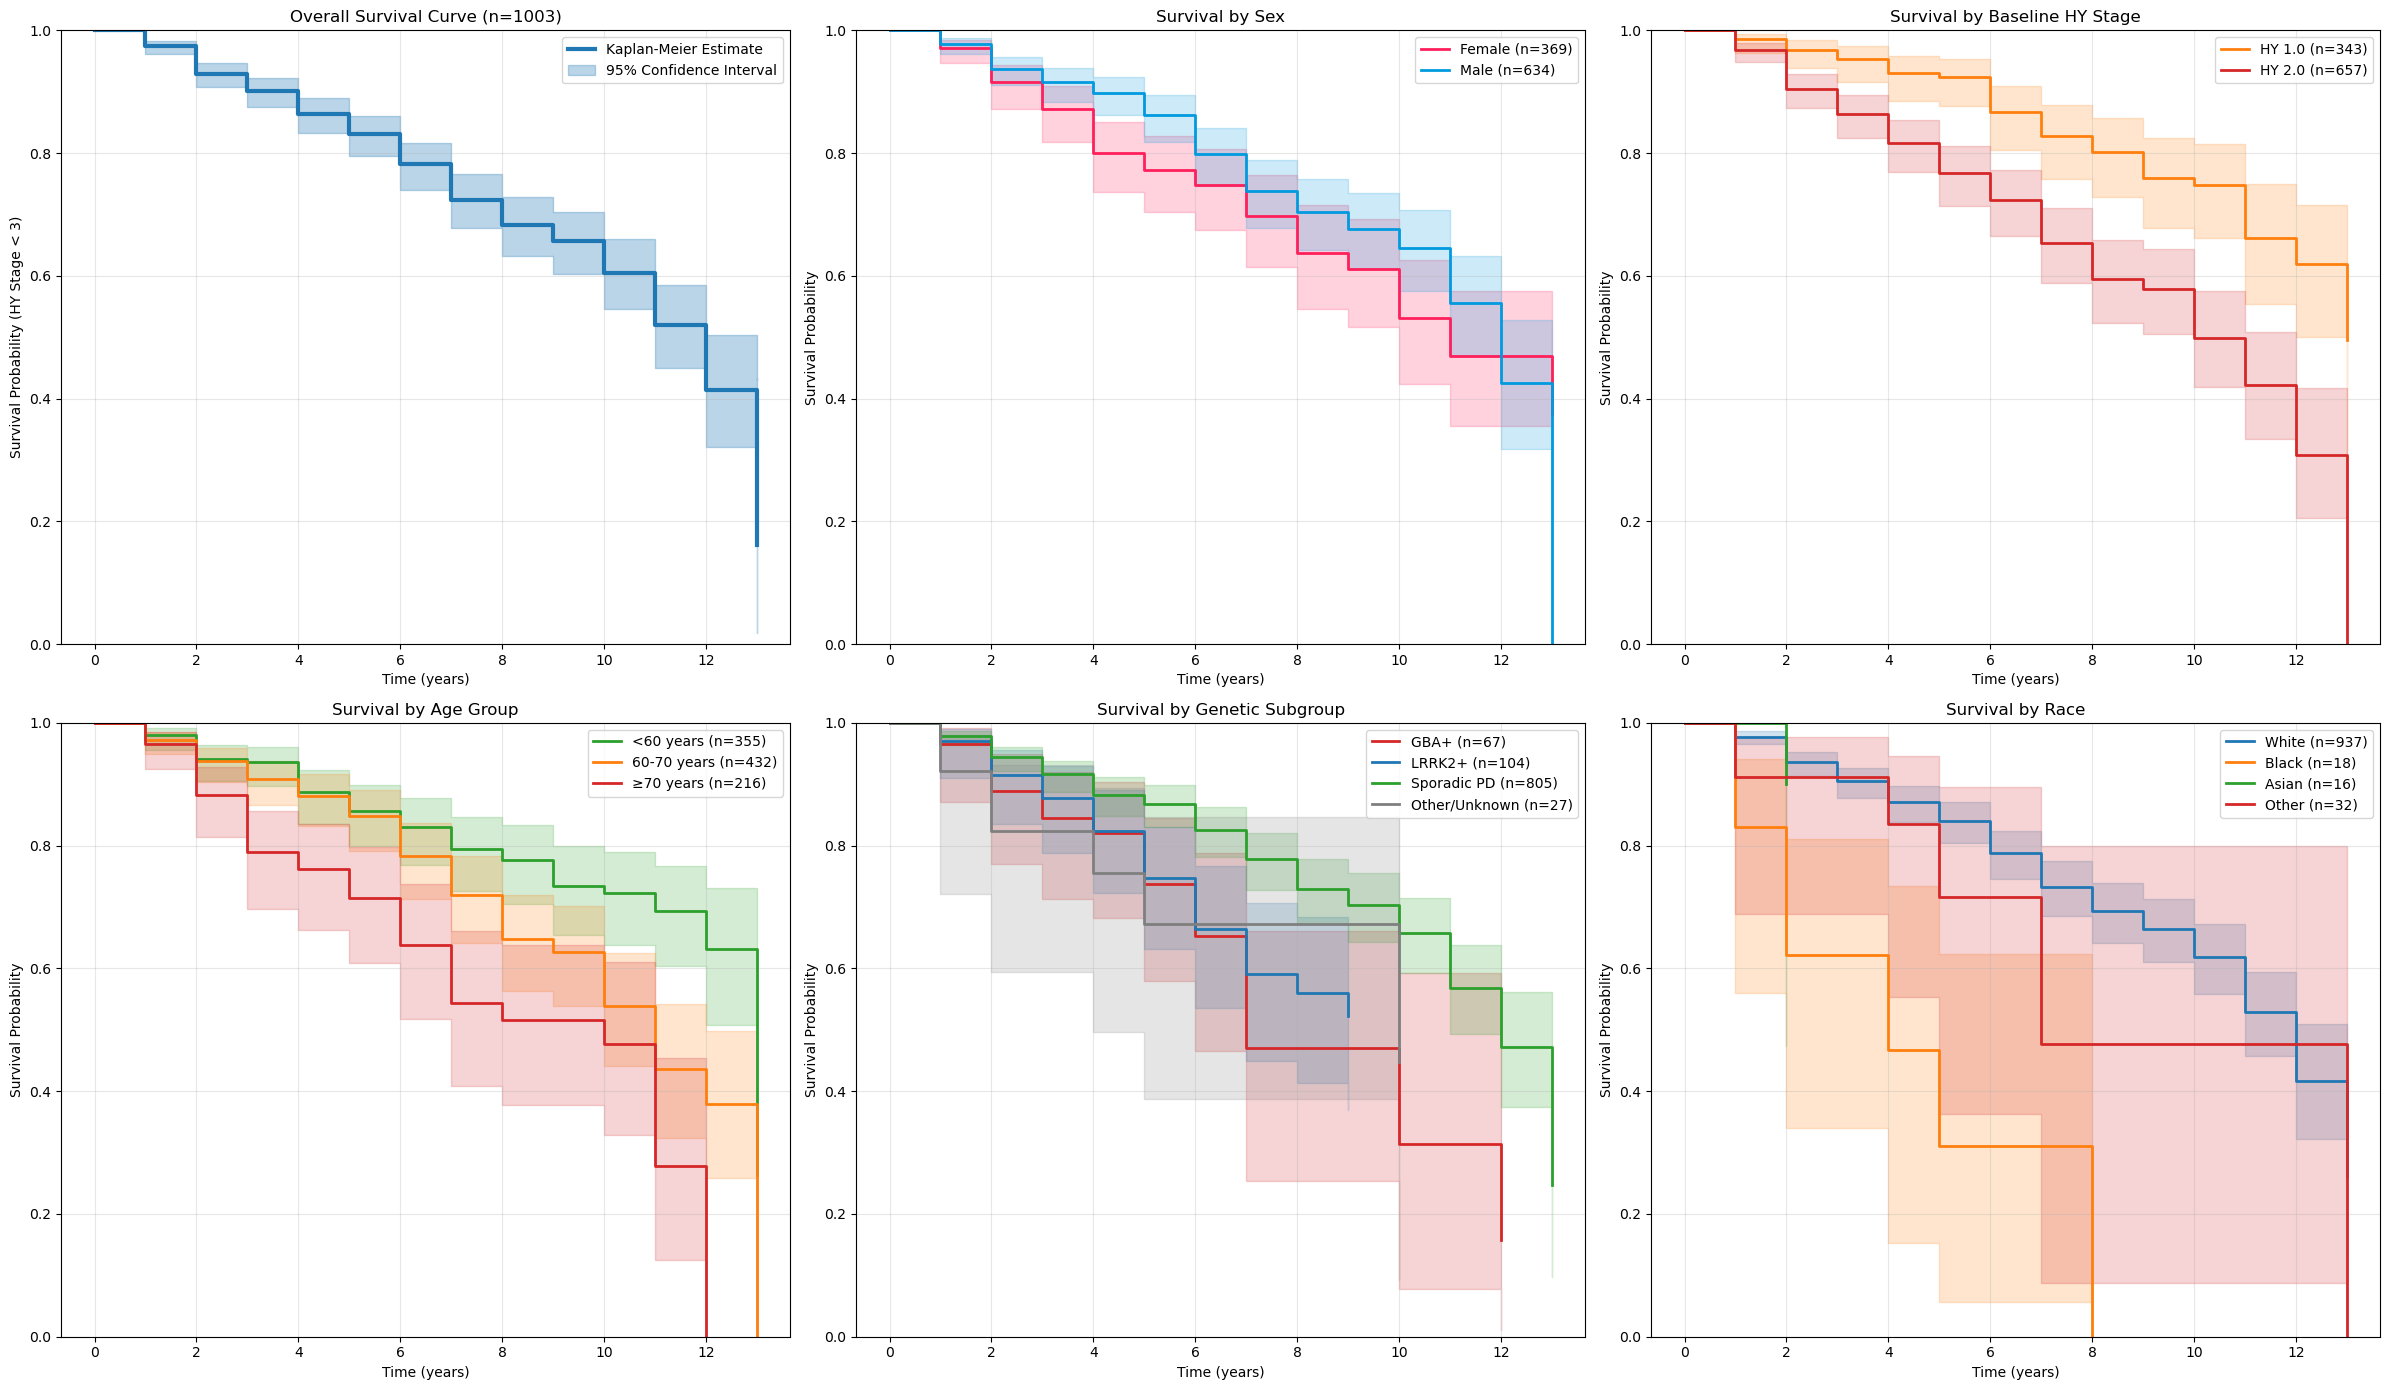


ENHANCED SURVIVAL STATISTICS WITH CONFIDENCE INTERVALS
Median survival time: 12.00 years
95% CI for median survival: [11.00, 13.00] years

Survival probabilities at specific time points:
  At 1 year(s): 0.999 (95% CI: [0.993, 1.000])
  At 2 year(s): 0.973 (95% CI: [0.960, 0.982])
  At 3 year(s): 0.928 (95% CI: [0.906, 0.945])
  At 5 year(s): 0.862 (95% CI: [0.830, 0.888])

STRATIFIED SURVIVAL ANALYSIS WITH CONFIDENCE INTERVALS

STRATIFIED SURVIVAL ANALYSIS
Checking baseline HY distribution:
hy
0.0      3
1.0    343
2.0    657
Name: count, dtype: int64

Group distributions:

Detailed HY grouping:
baseline_hy_group_detailed
HY 2 (Bilateral)     657
HY 1 (Unilateral)    343
HY 0 (No signs)        3
Name: count, dtype: int64

Simple HY grouping:
baseline_hy_group_simple
HY 1-2 (Symptomatic)    1000
HY 0 (No signs)            3
Name: count, dtype: int64

Sex grouping:
sex_group
Male      634
Female    369
Name: count, dtype: int64

Age grouping:
age_group
60-70 years (Middle)       432
<60

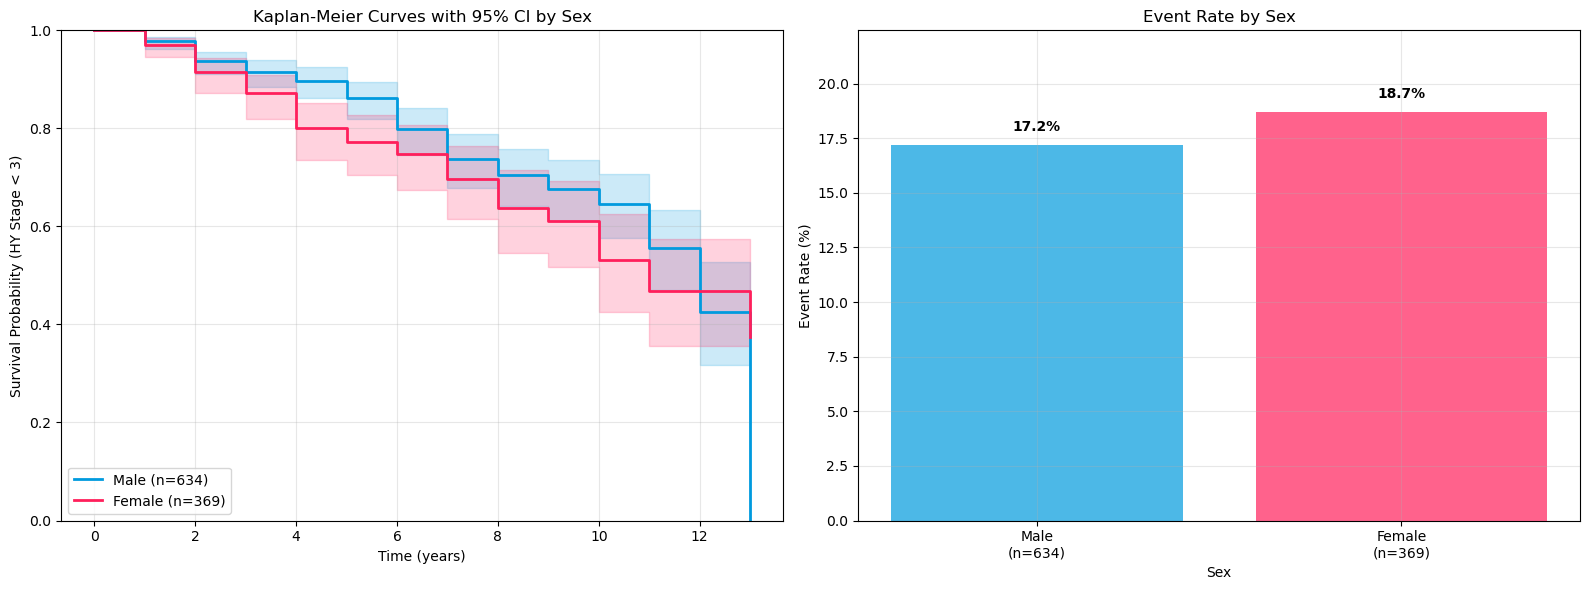

Successfully created KM curves with CI for Sex

ANALYSIS BY BASELINE HY STAGE (SIMPLE) (WITH CONFIDENCE INTERVALS)
Group distribution:
  HY 1-2 (Symptomatic): 1000 patients
  HY 0 (No signs): 3 patients
Skipping Baseline HY Stage (Simple) - insufficient data for comparison (need at least 2 groups with ≥15 patients each)

ANALYSIS BY BASELINE HY STAGE (DETAILED) (WITH CONFIDENCE INTERVALS)
Group distribution:
  HY 2 (Bilateral): 657 patients
  HY 1 (Unilateral): 343 patients
  HY 0 (No signs): 3 patients
Group variable: baseline_hy_group_detailed
Available groups: ['HY 2 (Bilateral)', 'HY 1 (Unilateral)', 'HY 0 (No signs)']
Color map: {'HY 0 (No signs)': '#2ca02c', 'HY 1 (Unilateral)': '#ff7f0e', 'HY 2 (Bilateral)': '#d62728', 'HY 3+ (Advanced)': '#9467bd'}
Skipping group 'HY 0 (No signs)' in Baseline HY Stage (Detailed): insufficient sample size (n=3)


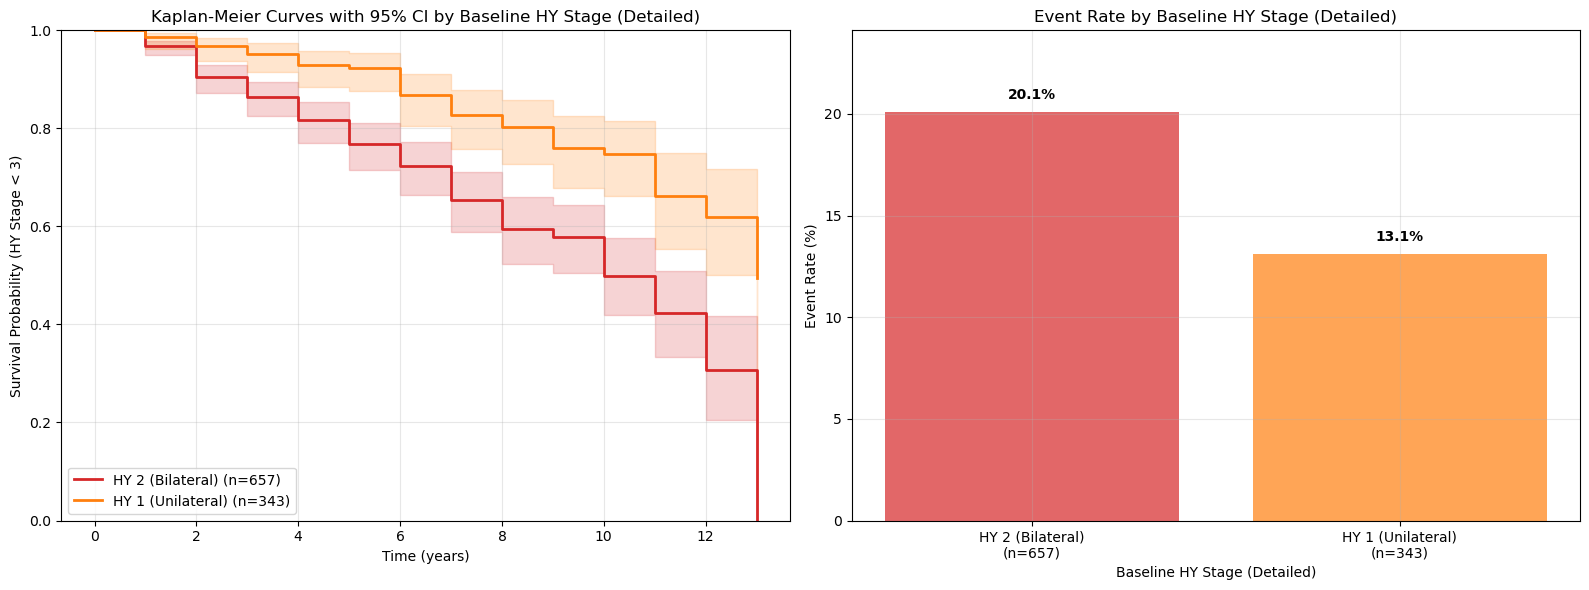

Successfully created KM curves with CI for Baseline HY Stage (Detailed)

ANALYSIS BY AGE GROUP (WITH CONFIDENCE INTERVALS)
Group distribution:
  60-70 years (Middle): 432 patients
  <60 years (Young onset): 355 patients
  ≥70 years (Late onset): 216 patients
Group variable: age_group
Available groups: ['60-70 years (Middle)', '<60 years (Young onset)', '≥70 years (Late onset)']
Color map: {'<60 years (Young onset)': '#2ca02c', '60-70 years (Middle)': '#ff7f0e', '≥70 years (Late onset)': '#d62728'}


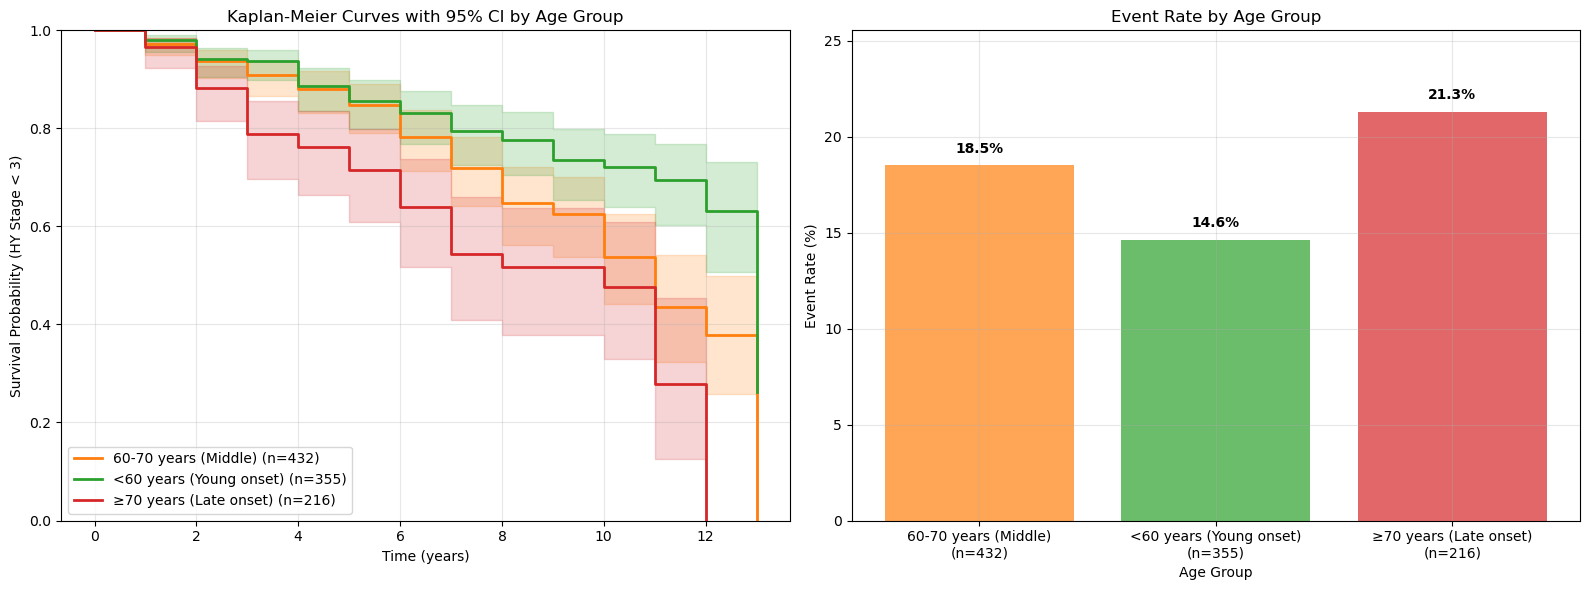

Successfully created KM curves with CI for Age Group

ANALYSIS BY GENETIC SUBGROUP (WITH CONFIDENCE INTERVALS)
Group distribution:
  Sporadic PD: 805 patients
  LRRK2+: 104 patients
  GBA+: 67 patients
  Other/Unknown: 27 patients
Group variable: genetic_subgroup
Available groups: ['Sporadic PD', 'Other/Unknown', 'LRRK2+', 'GBA+']
Color map: {'GBA+': '#d62728', 'LRRK2+': '#1f77b4', 'Sporadic PD': '#2ca02c', 'Other/Unknown': '#7f7f7f'}


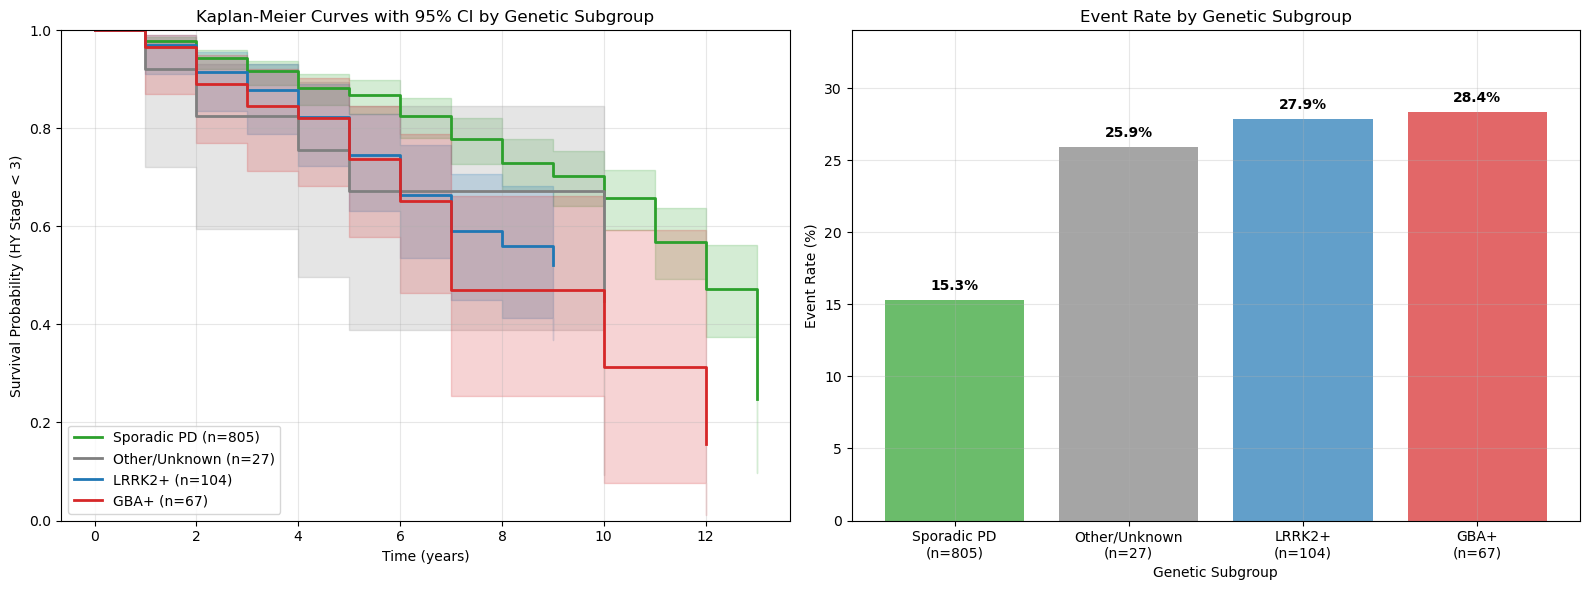

Successfully created KM curves with CI for Genetic Subgroup

ANALYSIS BY RACE (WITH CONFIDENCE INTERVALS)
Group distribution:
  White: 937 patients
  Other: 32 patients
  Black: 18 patients
  Asian: 16 patients
Group variable: race_group
Available groups: ['White', 'Other', 'Black', 'Asian']
Color map: {'White': '#1f77b4', 'Black': '#ff7f0e', 'Asian': '#2ca02c', 'Other': '#d62728'}


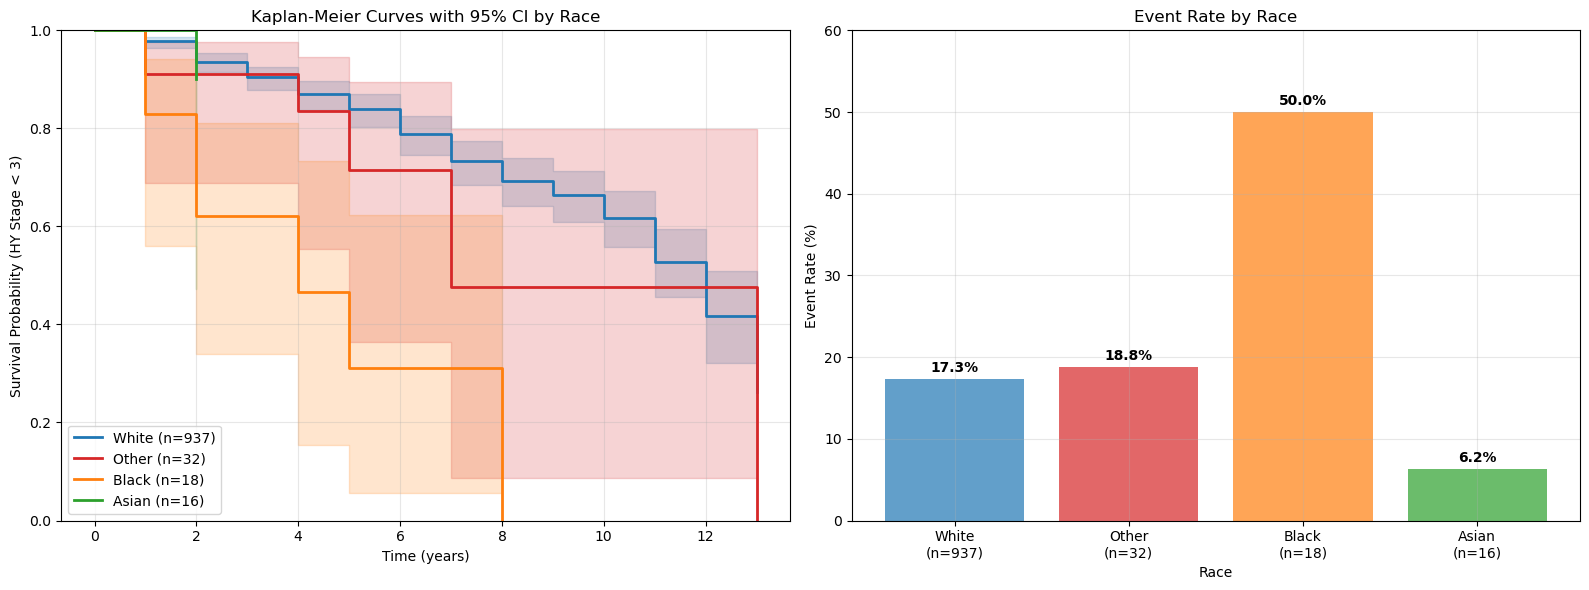

Successfully created KM curves with CI for Race


In [ ]:
ANALYSIS_COLORS = {
    'overall': '#1f77b4',  # Blue
    'sex': {
        'Female': '#ff1f5b',  # Red
        'Male': '#009ade'     # Blue
    },
    'sex_group': {
        'Female': '#ff1f5b',  # Red
        'Male': '#009ade'     # Blue
    },
    'hy': {
        0: '#2ca02c',    # Green
        1: '#ff7f0e',    # Orange
        2: '#d62728',    # Red
        3: '#9467bd'     # Purple
    },
    'baseline_hy_group_simple': {
        'HY 0 (No signs)': '#2ca02c',         # Green
        'HY 1-2 (Symptomatic)': '#ff7f0e',   # Orange
        'HY 3+ (Advanced)': '#d62728'        # Red
    },
    'baseline_hy_group_detailed': {
        'HY 0 (No signs)': '#2ca02c',      # Green
        'HY 1 (Unilateral)': '#ff7f0e',    # Orange
        'HY 2 (Bilateral)': '#d62728',     # Red
        'HY 3+ (Advanced)': '#9467bd'      # Purple
    },
    'age': {
        '<60 years': '#2ca02c',      # Green
        '60-70 years': '#ff7f0e',    # Orange
        '≥70 years': '#d62728'       # Red
    },
    'age_group': {
        '<60 years (Young onset)': '#2ca02c',    # Green
        '60-70 years (Middle)': '#ff7f0e',       # Orange
        '≥70 years (Late onset)': '#d62728'      # Red
    },
    'genetic': {
        'GBA+': '#d62728',           # Red
        'LRRK2+': '#1f77b4',         # Blue
        'Sporadic PD': '#2ca02c',    # Green
        'Other/Unknown': '#7f7f7f'   # Gray
    },
    'genetic_subgroup': { 
        'GBA+': '#d62728',           # Red
        'LRRK2+': '#1f77b4',         # Blue
        'Sporadic PD': '#2ca02c',    # Green
        'Other/Unknown': '#7f7f7f'   # Gray
    },
    'race': {
        'White': '#1f77b4',          # Blue
        'Black': '#ff7f0e',          # Orange
        'Asian': '#2ca02c',          # Green
        'Other': '#d62728'           # Red
    },
    'race_group': {
        'White': '#1f77b4',          # Blue
        'Black': '#ff7f0e',          # Orange
        'Asian': '#2ca02c',          # Green
        'Other': '#d62728'           # Red
    },
    'duration_group': {
        '≤1 year (Very early)': '#2ca02c',     # Green
        '1-3 years (Early)': '#ff7f0e',        # Orange
        '>3 years (Established)': '#d62728'    # Red
    }
}

def enhanced_survival_statistics_with_ci(modeling_dataset):
    """
    Enhanced survival statistics including median survival times with CI
    """
    print("\n" + "=" * 70)
    print("ENHANCED SURVIVAL STATISTICS WITH CONFIDENCE INTERVALS")
    print("=" * 70)
    
    # Overall statistics
    times, probs, lower_ci, upper_ci = create_kaplan_meier_curve_with_ci(modeling_dataset)
    
    if times and probs:
        # Find median survival time (when survival probability drops to 0.5)
        median_survival_idx = None
        for i, prob in enumerate(probs):
            if prob <= 0.5:
                median_survival_idx = i
                break
        
        if median_survival_idx is not None:
            median_survival = times[median_survival_idx]
            median_ci_lower = None
            median_ci_upper = None
            
            # Find CI for median survival
            for i, ci_lower in enumerate(lower_ci):
                if ci_lower <= 0.5 and median_ci_lower is None:
                    median_ci_lower = times[i]
            
            for i, ci_upper in enumerate(upper_ci):
                if ci_upper <= 0.5 and median_ci_upper is None:
                    median_ci_upper = times[i]
            
            print(f"Median survival time: {median_survival:.2f} years")
            if median_ci_lower is not None and median_ci_upper is not None:
                print(f"95% CI for median survival: [{median_ci_lower:.2f}, {median_ci_upper:.2f}] years")
            else:
                print(f"95% CI for median survival: Could not be estimated")
        else:
            print("Median survival time: Not reached (>50% of patients remain event-free)")
        
        # Survival probabilities at specific time points
        time_points = [1, 2, 3, 5]
        print(f"\nSurvival probabilities at specific time points:")
        for time_point in time_points:
            # Find closest time point
            closest_idx = None
            for i, t in enumerate(times):
                if t >= time_point:
                    closest_idx = i
                    break
            
            if closest_idx is not None:
                prob_at_t = probs[closest_idx]
                ci_lower_at_t = lower_ci[closest_idx]
                ci_upper_at_t = upper_ci[closest_idx]
                print(f"  At {time_point} year(s): {prob_at_t:.3f} (95% CI: [{ci_lower_at_t:.3f}, {ci_upper_at_t:.3f}])")

def create_comprehensive_km_plot_with_ci(modeling_dataset):
    """
    Create comprehensive Kaplan-Meier plot with confidence intervals including genetic subgroups and race
    """
    print("\n" + "=" * 70)
    print("COMPREHENSIVE KAPLAN-MEIER ANALYSIS WITH CONFIDENCE INTERVALS")
    print("=" * 70)
    
    # Create 2x3 subplot layout for 6 plots
    fig, axes = plt.subplots(2, 3, figsize=(24, 14))
    # fig.suptitle('Comprehensive Survival Analysis with Confidence Intervals', fontsize=16, fontweight='bold')
    
    # Flatten axes for easier indexing
    axes = axes.ravel()
    
    # 1. Overall survival curve
    ax1 = axes[0]
    times, probs, lower_ci, upper_ci = create_kaplan_meier_curve_with_ci(modeling_dataset)
    
    if times and probs:
        ax1.step(times, probs, where='post', linewidth=3, color=ANALYSIS_COLORS['overall'], 
                label='Kaplan-Meier Estimate')
        ax1.fill_between(times, lower_ci, upper_ci, step='post', alpha=0.3, 
                        color=ANALYSIS_COLORS['overall'], label='95% Confidence Interval')
        ax1.set_xlabel('Time (years)')
        ax1.set_ylabel('Survival Probability (HY Stage < 3)')
        ax1.set_title(f'Overall Survival Curve (n={len(modeling_dataset)})')
        ax1.set_ylim(0, 1)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # # Add risk table
        # max_time = max(times) if times else 5
        # risk_times = np.arange(0, min(max_time + 1, 8), 1)
        # n_at_risk_values = []
        # for t in risk_times:
        #     n_at_risk = len(modeling_dataset[modeling_dataset['time_to_hy3_plus'] >= t])
        #     n_at_risk_values.append(n_at_risk)
        
        # # Add risk table as text
        # risk_table_text = "Number at risk:\n" + "".join([f"{t:.0f}" for t in risk_times]) + "\n" + " ".join([f"{n}" for n in n_at_risk_values])
        # ax1.text(0.02, 0.02, risk_table_text, transform=ax1.transAxes, fontsize=8, 
        #         verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 2. Survival by Sex with CI
    ax2 = axes[1]
    sex_mapping = {0: 'Female', 1: 'Male'}
    modeling_dataset_sex = modeling_dataset.copy()
    modeling_dataset_sex['sex_label'] = modeling_dataset_sex['sex'].map(sex_mapping)
    
    sex_plotted = False
    
    for sex in ['Female', 'Male']:
        sex_data = modeling_dataset_sex[modeling_dataset_sex['sex_label'] == sex]
        print(f"Sex '{sex}': n={len(sex_data)}")
        
        if len(sex_data) >= 15:
            times_sex, probs_sex, lower_ci_sex, upper_ci_sex = create_kaplan_meier_curve_with_ci(sex_data)
            if times_sex and probs_sex:
                ax2.step(times_sex, probs_sex, where='post', linewidth=2, 
                        color=ANALYSIS_COLORS['sex'][sex], label=f'{sex} (n={len(sex_data)})')
                ax2.fill_between(times_sex, lower_ci_sex, upper_ci_sex, 
                               step='post', alpha=0.2, color=ANALYSIS_COLORS['sex'][sex])
                sex_plotted = True
    
    ax2.set_xlabel('Time (years)')
    ax2.set_ylabel('Survival Probability')
    ax2.set_title('Survival by Sex')
    ax2.set_ylim(0, 1)
    if sex_plotted:
        ax2.legend()
    else:
        ax2.text(0.5, 0.5, 'Insufficient sample size\nfor sex comparison', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # 3. Survival by HY Stage with CI
    ax3 = axes[2]
    hy_groups = modeling_dataset['hy'].unique()
    hy_groups = sorted([hy for hy in hy_groups if not pd.isna(hy)])
    hy_plotted = False
    
    for hy in hy_groups:
        hy_data = modeling_dataset[modeling_dataset['hy'] == hy]
        print(f"HY Stage {hy}: n={len(hy_data)}")
        
        if len(hy_data) >= 15:
            times_hy, probs_hy, lower_ci_hy, upper_ci_hy = create_kaplan_meier_curve_with_ci(hy_data)
            if times_hy and probs_hy:
                color = ANALYSIS_COLORS['hy'].get(hy, '#000000') 
                ax3.step(times_hy, probs_hy, where='post', linewidth=2, 
                        color=color, label=f'HY {hy} (n={len(hy_data)})')
                ax3.fill_between(times_hy, lower_ci_hy, upper_ci_hy, 
                               step='post', alpha=0.2, color=color)
                hy_plotted = True
    
    ax3.set_xlabel('Time (years)')
    ax3.set_ylabel('Survival Probability')
    ax3.set_title('Survival by Baseline HY Stage')
    ax3.set_ylim(0, 1)
    if hy_plotted:
        ax3.legend()
    else:
        ax3.text(0.5, 0.5, 'Insufficient sample size\nfor HY stage comparison', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.grid(True, alpha=0.3)
    
    # 4. Survival by Age Group with CI
    ax4 = axes[3]
    def categorize_age(age):
        if pd.isna(age):
            return None
        elif age < 60:
            return '<60 years'
        elif age < 70:
            return '60-70 years'
        else:
            return '≥70 years'
    
    modeling_dataset_age = modeling_dataset.copy()
    modeling_dataset_age['age_group'] = modeling_dataset_age['age'].apply(categorize_age)
    
    age_groups = ['<60 years', '60-70 years', '≥70 years']
    age_plotted = False
    
    for age_group in age_groups:
        age_data = modeling_dataset_age[modeling_dataset_age['age_group'] == age_group]
        print(f"Age group '{age_group}': n={len(age_data)}")
        
        if len(age_data) >= 15:
            times_age, probs_age, lower_ci_age, upper_ci_age = create_kaplan_meier_curve_with_ci(age_data)
            if times_age and probs_age:
                ax4.step(times_age, probs_age, where='post', linewidth=2, 
                        color=ANALYSIS_COLORS['age'][age_group], label=f'{age_group} (n={len(age_data)})')
                ax4.fill_between(times_age, lower_ci_age, upper_ci_age, 
                               step='post', alpha=0.2, color=ANALYSIS_COLORS['age'][age_group])
                age_plotted = True
    
    ax4.set_xlabel('Time (years)')
    ax4.set_ylabel('Survival Probability')
    ax4.set_title('Survival by Age Group')
    ax4.set_ylim(0, 1)
    if age_plotted:
        ax4.legend()
    else:
        ax4.text(0.5, 0.5, 'Insufficient sample size\nfor age group comparison', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.grid(True, alpha=0.3)
    
    # 5. Survival by Genetic Subgroups with CI
    ax5 = axes[4]
    
    # Create genetic subgroup labels
    def determine_genetic_subgroup(row):
        if pd.notna(row.get('subgroup_gba', 0)) and row.get('subgroup_gba', 0) == True:
            return 'GBA+'
        elif pd.notna(row.get('subgroup_lrrk2', 0)) and row.get('subgroup_lrrk2', 0) == True:
            return 'LRRK2+'
        elif pd.notna(row.get('subgroup_sporadic_pd', 0)) and row.get('subgroup_sporadic_pd', 0) == True:
            return 'Sporadic PD'
        else:
            return 'Other/Unknown'
    
    modeling_dataset_genetic = modeling_dataset.copy()
    modeling_dataset_genetic['genetic_subgroup'] = modeling_dataset_genetic.apply(determine_genetic_subgroup, axis=1)
    
    # Print genetic subgroup distribution
    print("\nGenetic Subgroup Distribution:")
    genetic_counts = modeling_dataset_genetic['genetic_subgroup'].value_counts()
    for subgroup, count in genetic_counts.items():
        print(f"  {subgroup}: {count} patients")
    
    genetic_groups = ['GBA+', 'LRRK2+', 'Sporadic PD', 'Other/Unknown']
    genetic_plotted = False
    
    for genetic_group in genetic_groups:
        genetic_data = modeling_dataset_genetic[modeling_dataset_genetic['genetic_subgroup'] == genetic_group]
        print(f"Genetic subgroup '{genetic_group}': n={len(genetic_data)}")
        
        if len(genetic_data) >= 15:
            times_genetic, probs_genetic, lower_ci_genetic, upper_ci_genetic = create_kaplan_meier_curve_with_ci(genetic_data)
            if times_genetic and probs_genetic:
                ax5.step(times_genetic, probs_genetic, where='post', linewidth=2, 
                        color=ANALYSIS_COLORS['genetic'][genetic_group], label=f'{genetic_group} (n={len(genetic_data)})')
                ax5.fill_between(times_genetic, lower_ci_genetic, upper_ci_genetic, 
                               step='post', alpha=0.2, color=ANALYSIS_COLORS['genetic'][genetic_group])
                genetic_plotted = True
    
    ax5.set_xlabel('Time (years)')
    ax5.set_ylabel('Survival Probability')
    ax5.set_title('Survival by Genetic Subgroup')
    ax5.set_ylim(0, 1)
    if genetic_plotted:
        ax5.legend(loc='upper right')
    else:
        ax5.text(0.5, 0.5, 'Insufficient sample size\nfor genetic subgroup comparison', 
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
    ax5.grid(True, alpha=0.3)
    
    # 6. NEW: Survival by Race with CI
    ax6 = axes[5]
    
    # Create race labels from one-hot encoded columns
    def determine_race_group(row):
        if row.get('race_white', 0) == True:
            return 'White'
        elif row.get('race_black', 0) == True:
            return 'Black'
        elif row.get('race_asian', 0) == True:
            return 'Asian'
        elif row.get('race_other', 0) == True:
            return 'Other'
        else:
            return 'Unknown'
    
    modeling_dataset_race = modeling_dataset.copy()
    modeling_dataset_race['race_group'] = modeling_dataset_race.apply(determine_race_group, axis=1)
    
    # Print race group distribution
    print("\nRace Group Distribution:")
    race_counts = modeling_dataset_race['race_group'].value_counts()
    for race_group, count in race_counts.items():
        print(f"  {race_group}: {count} patients")
    
    race_groups = ['White', 'Black', 'Asian', 'Other']
    race_plotted = False
    
    for race_group in race_groups:
        race_data = modeling_dataset_race[modeling_dataset_race['race_group'] == race_group]
        print(f"Race group '{race_group}': n={len(race_data)}")
        
        if len(race_data) >= 15: 
            times_race, probs_race, lower_ci_race, upper_ci_race = create_kaplan_meier_curve_with_ci(race_data)
            if times_race and probs_race:
                ax6.step(times_race, probs_race, where='post', linewidth=2, 
                        color=ANALYSIS_COLORS['race'][race_group], label=f'{race_group} (n={len(race_data)})')
                ax6.fill_between(times_race, lower_ci_race, upper_ci_race, 
                               step='post', alpha=0.2, color=ANALYSIS_COLORS['race'][race_group])
                race_plotted = True
    
    ax6.set_xlabel('Time (years)')
    ax6.set_ylabel('Survival Probability')
    ax6.set_title('Survival by Race')
    ax6.set_ylim(0, 1)
    if race_plotted:
        ax6.legend()
    else:
        ax6.text(0.5, 0.5, 'Insufficient sample size\nfor race comparison', 
                ha='center', va='center', transform=ax6.transAxes, fontsize=12)
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def create_stratified_survival_analysis(modeling_dataset):
    """
    Create stratified survival analysis by different patient groups
    """
    print("\n" + "=" * 70)
    print("STRATIFIED SURVIVAL ANALYSIS")
    print("=" * 70)
    
    # First, let's check the actual distribution of baseline HY values
    print("Checking baseline HY distribution:")
    hy_distribution = modeling_dataset['hy'].value_counts().sort_index()
    print(hy_distribution)
    print()
    
    # Create derived grouping variables
    dataset_with_groups = modeling_dataset.copy()
    
    # 1. Baseline HY groups - based on actual integer values (0, 1, 2, etc.)
    def categorize_baseline_hy_detailed(hy):
        if pd.isna(hy):
            return 'Missing'
        elif hy == 0:
            return 'HY 0 (No signs)'
        elif hy == 1:
            return 'HY 1 (Unilateral)'
        elif hy == 2:
            return 'HY 2 (Bilateral)'
        else:  # hy >= 3 (this shouldn't exist in our dataset since we excluded HY3+ at baseline)
            return 'HY 3+ (Advanced)'
    
    dataset_with_groups['baseline_hy_group_detailed'] = dataset_with_groups['hy'].apply(categorize_baseline_hy_detailed)
    
    # 2. Simplified HY grouping for better statistical power
    def categorize_baseline_hy_simple(hy):
        if pd.isna(hy):
            return 'Missing'
        elif hy == 0:
            return 'HY 0 (No signs)'
        elif hy in [1, 2]:
            return 'HY 1-2 (Symptomatic)'
        else:
            return 'HY 3+ (Advanced)'  # Shouldn't exist but just in case
    
    dataset_with_groups['baseline_hy_group_simple'] = dataset_with_groups['hy'].apply(categorize_baseline_hy_simple)
    
    # 3. Age groups (at enrollment)
    def categorize_age(age):
        if pd.isna(age):
            return 'Missing'
        elif age < 60:
            return '<60 years (Young onset)'
        elif age < 70:
            return '60-70 years (Middle)'
        else:
            return '≥70 years (Late onset)'
    
    dataset_with_groups['age_group'] = dataset_with_groups['age'].apply(categorize_age)
    
    # 4. Genetic subgroups
    def determine_genetic_subgroup(row):
        if pd.notna(row.get('subgroup_gba', 0)) and row.get('subgroup_gba', 0) == True:
            return 'GBA+'
        elif pd.notna(row.get('subgroup_lrrk2', 0)) and row.get('subgroup_lrrk2', 0) == True:
            return 'LRRK2+'
        elif pd.notna(row.get('subgroup_sporadic_pd', 0)) and row.get('subgroup_sporadic_pd', 0) == True:
            return 'Sporadic PD'
        else:
            return 'Other/Unknown'
    
    dataset_with_groups['genetic_subgroup'] = dataset_with_groups.apply(determine_genetic_subgroup, axis=1)
    
    # 5. Disease duration groups
    def categorize_duration(duration):
        if pd.isna(duration):
            return 'Missing'
        elif duration <= 1:
            return '≤1 year (Very early)'
        elif duration <= 3:
            return '1-3 years (Early)'
        else:
            return '>3 years (Established)'
    
    dataset_with_groups['duration_group'] = dataset_with_groups['duration_yrs'].apply(categorize_duration)
    
    # 6. Sex grouping (simple)
    def categorize_sex(sex):
        if pd.isna(sex):
            return 'Missing'
        elif sex == 0:
            return 'Female'
        elif sex == 1:
            return 'Male'
        else:
            return 'Other'
    
    dataset_with_groups['sex_group'] = dataset_with_groups['sex'].apply(categorize_sex)
    
    # Print group distributions to help decide which grouping to use
    print("Group distributions:")
    print("\nDetailed HY grouping:")
    print(dataset_with_groups['baseline_hy_group_detailed'].value_counts())
    print("\nSimple HY grouping:")
    print(dataset_with_groups['baseline_hy_group_simple'].value_counts())
    print("\nSex grouping:")
    print(dataset_with_groups['sex_group'].value_counts())
    print("\nAge grouping:")
    print(dataset_with_groups['age_group'].value_counts())
    print("\nGenetic grouping:")
    print(dataset_with_groups['genetic_subgroup'].value_counts())
    print("\nDuration grouping:")
    print(dataset_with_groups['duration_group'].value_counts())
    
    return dataset_with_groups

def create_stratified_survival_analysis_with_ci(modeling_dataset):
    """
    Create stratified survival analysis with confidence intervals
    """
    print("\n" + "=" * 70)
    print("STRATIFIED SURVIVAL ANALYSIS WITH CONFIDENCE INTERVALS")
    print("=" * 70)
    
    # Create dataset with grouping variables
    dataset_with_groups = create_stratified_survival_analysis(modeling_dataset)

    # Determine race group
    def determine_race_group(row):
        if row.get('race_white', 0) == True:
            return 'White'
        elif row.get('race_black', 0) == True:
            return 'Black'
        elif row.get('race_asian', 0) == True:
            return 'Asian'
        elif row.get('race_other', 0) == True:
            return 'Other'
        else:
            return 'Unknown'
    
    dataset_with_groups['race_group'] = dataset_with_groups.apply(determine_race_group, axis=1)
    
    # Define the stratification variables to analyze (添加race_group)
    stratification_analyses = [
        ('sex_group', 'Sex'),
        ('baseline_hy_group_simple', 'Baseline HY Stage (Simple)'),
        ('baseline_hy_group_detailed', 'Baseline HY Stage (Detailed)'),
        ('age_group', 'Age Group'),
        ('genetic_subgroup', 'Genetic Subgroup'),
        ('race_group', 'Race'), 
    ]
    
    # Perform analysis for each stratification with CI
    for group_var, group_name in stratification_analyses:
        print(f"\n{'='*60}")
        print(f"ANALYSIS BY {group_name.upper()} (WITH CONFIDENCE INTERVALS)")
        print(f"{'='*60}")
        
        # Check if we have enough data
        group_counts = dataset_with_groups[group_var].value_counts()
        print(f"Group distribution:")
        for group, count in group_counts.items():
            print(f"  {group}: {count} patients")
        
        valid_groups = [g for g, c in group_counts.items() if c >= 15 and g not in ['Missing', 'Unknown']]
        
        if len(valid_groups) >= 2:
            try:
                survival_data = plot_kaplan_meier_by_groups_with_ci(dataset_with_groups, group_var, group_name)
                print(f"Successfully created KM curves with CI for {group_name}")
            except Exception as e:
                print(f"Error in analysis for {group_name}: {str(e)}")
        else:
            print(f"Skipping {group_name} - insufficient data for comparison (need at least 2 groups with ≥15 patients each)")

def create_kaplan_meier_curve_with_ci(analysable_data, confidence_level=0.95):
    """
    Create a proper Kaplan-Meier survival curve with confidence intervals
    """
    if len(analysable_data) == 0:
        return None, None, None, None
    
    # Sort by time
    sorted_data = analysable_data.sort_values('time_to_hy3_plus').reset_index(drop=True)
    
    times = [0]  # Start at time 0
    survival_probs = [1.0]  # Start with 100% survival
    lower_ci = [1.0]  # Lower confidence interval
    upper_ci = [1.0]  # Upper confidence interval
    
    n_at_risk = len(sorted_data)
    cumulative_hazard = 0  # For Greenwood's formula
    
    # Calculate z-score for confidence level
    alpha = 1 - confidence_level
    z_score = 1.96 if confidence_level == 0.95 else 2.576 if confidence_level == 0.99 else 1.645
    
    for i, row in sorted_data.iterrows():
        time = row['time_to_hy3_plus']
        event = row['event_occurred']
        
        if event == 1:  # Event occurred
            # Calculate new survival probability using Kaplan-Meier formula
            survival_prob = survival_probs[-1] * (1 - 1/n_at_risk) if n_at_risk > 0 else 0
            
            # Update cumulative hazard for Greenwood's formula (avoid division by zero)
            if n_at_risk > 1:  # Need at least 2 samples for variance calculation
                cumulative_hazard += 1 / (n_at_risk * (n_at_risk - 1))
            
            # Calculate confidence interval using Greenwood's formula
            if survival_prob > 0 and n_at_risk > 1:  # Need sufficient samples for CI
                # Greenwood's variance estimate
                greenwood_var = survival_prob**2 * cumulative_hazard
                
                if greenwood_var > 0:
                    se_log_survival = np.sqrt(greenwood_var) / survival_prob
                    
                    # Check if log transformation is valid
                    if survival_prob < 1.0:  # Avoid log(0)
                        # Log-log transformation for better CI
                        log_log_survival = np.log(-np.log(survival_prob))
                        se_log_log = se_log_survival / (-np.log(survival_prob))
                        
                        # Calculate CI on log-log scale then transform back
                        log_log_lower = log_log_survival - z_score * se_log_log
                        log_log_upper = log_log_survival + z_score * se_log_log
                        
                        ci_lower = np.exp(-np.exp(log_log_upper))
                        ci_upper = np.exp(-np.exp(log_log_lower))
                        
                        # Bound CI to [0, 1]
                        ci_lower = max(0, min(1, ci_lower))
                        ci_upper = max(0, min(1, ci_upper))
                    else:
                        # If survival_prob = 1, use simple normal approximation
                        margin_of_error = z_score * se_log_survival
                        ci_lower = max(0, survival_prob - margin_of_error)
                        ci_upper = min(1, survival_prob + margin_of_error)
                else:
                    # If variance is 0, CI equals the point estimate
                    ci_lower = survival_prob
                    ci_upper = survival_prob
            else:
                # For small samples or edge cases, CI equals the point estimate
                ci_lower = survival_prob
                ci_upper = survival_prob
            
            times.append(time)
            survival_probs.append(survival_prob)
            lower_ci.append(ci_lower)
            upper_ci.append(ci_upper)
        
        n_at_risk -= 1
    
    return times, survival_probs, lower_ci, upper_ci

def plot_kaplan_meier_by_groups_with_ci(dataset_with_groups, group_var, group_name):
    """
    Create Kaplan-Meier survival curves with confidence intervals stratified by a specific grouping variable
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Get unique groups
    groups = dataset_with_groups[group_var].unique()
    groups = [g for g in groups if g not in ['Missing', 'Unknown']]  # Exclude missing/unknown data
    
    # Use consistent colors based on group_var
    color_map = None
    
    if group_var in ANALYSIS_COLORS:
        color_map = ANALYSIS_COLORS[group_var]
    elif group_var == 'sex_group':
        color_map = ANALYSIS_COLORS['sex_group']
    elif 'baseline_hy' in group_var:
        if 'simple' in group_var:
            color_map = ANALYSIS_COLORS['baseline_hy_group_simple']
        else:
            color_map = ANALYSIS_COLORS['baseline_hy_group_detailed']
    elif group_var == 'age_group': 
        color_map = ANALYSIS_COLORS['age_group']
    elif 'age' in group_var and group_var != 'age_group':  
        color_map = ANALYSIS_COLORS['age']
    elif group_var == 'genetic_subgroup':
        color_map = ANALYSIS_COLORS['genetic_subgroup']
    elif group_var == 'race_group':
        color_map = ANALYSIS_COLORS['race_group']
    elif group_var == 'duration_group':
        color_map = ANALYSIS_COLORS['duration_group']

    # Use consistent colors based on group_var
    if color_map is None:
        print(f"Warning: No color mapping found for {group_var}, using default colors")
        colors = plt.cm.Set1(np.linspace(0, 1, len(groups)))
        color_map = {group: colors[i] for i, group in enumerate(groups)}

    # Print debug information
    print(f"Group variable: {group_var}")
    print(f"Available groups: {groups}")
    print(f"Color map: {color_map}")
    
    # Plot 1: Kaplan-Meier curves with CI
    survival_data = {}
    
    for group in groups:
        group_data = dataset_with_groups[dataset_with_groups[group_var] == group]

        if len(group_data) < 10:  # Increase minimum sample size requirement to ensure CI stability
            print(f"Skipping group '{group}' in {group_name}: insufficient sample size (n={len(group_data)})")
            continue
            
        # Calculate Kaplan-Meier curve with CI
        times, probs, lower_ci, upper_ci = create_kaplan_meier_curve_with_ci(group_data)
        
        if times and probs:
            # Get color for this group
            color = color_map.get(group, '#000000')  # Default to black if not found
            if color == '#000000':
                print(f"Warning: Using default black color for group '{group}' in {group_name}")
            
            # Plot survival curve
            ax1.step(times, probs, where='post', linewidth=2, 
                    color=color, label=f'{group} (n={len(group_data)})')
            
            # Plot confidence interval as shaded area
            ax1.fill_between(times, lower_ci, upper_ci, 
                           step='post', alpha=0.2, color=color)
            
            survival_data[group] = {
                'times': times, 
                'probs': probs, 
                'lower_ci': lower_ci,
                'upper_ci': upper_ci,
                'n': len(group_data)
            }
    
    ax1.set_xlabel('Time (years)')
    ax1.set_ylabel('Survival Probability (HY Stage < 3)')
    ax1.set_title(f'Kaplan-Meier Curves with 95% CI by {group_name}')
    ax1.set_ylim(0, 1)
    ax1.legend(loc='lower left')
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Event rates by group
    event_rates = []
    group_labels = []
    bar_colors = []
    
    for group in groups:
        group_data = dataset_with_groups[dataset_with_groups[group_var] == group]
        if len(group_data) >= 10:  # Keep consistent minimum sample size requirement
            event_rate = (group_data['event_occurred'].sum() / len(group_data)) * 100
            event_rates.append(event_rate)
            group_labels.append(f'{group}\n(n={len(group_data)})')
            bar_colors.append(color_map.get(group, '#000000'))

    if event_rates:  # Only plot if there are valid groups
        bars = ax2.bar(range(len(event_rates)), event_rates, color=bar_colors, alpha=0.7)
        ax2.set_xlabel(group_name)
        ax2.set_ylabel('Event Rate (%)')
        ax2.set_title(f'Event Rate by {group_name}')
        ax2.set_xticks(range(len(group_labels)))
        ax2.set_xticklabels(group_labels, rotation=0)
        y_max = max(event_rates) if event_rates else 100
        ax2.set_ylim(0, y_max * 1.2)
        ax2.grid(True, alpha=0.3)
        
        # Add event rate labels on bars
        for i, (bar, rate) in enumerate(zip(bars, event_rates)):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')
    else:
        ax2.text(0.5, 0.5, 'No groups with\nsufficient sample size', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=14)
        ax2.set_title(f'Event Rate by {group_name}')
    
    plt.tight_layout()
    plt.show()
    
    return survival_data

# Perform enhanced survival analysis with confidence intervals
if 'modeling_dataset' in locals() and len(modeling_dataset) > 0:
    print("PERFORMING ENHANCED SURVIVAL ANALYSIS WITH CONFIDENCE INTERVALS...")
    print(f"Total modeling dataset size: {len(modeling_dataset)}")
    print(f"Events: {modeling_dataset['event_occurred'].sum()}")
    print(f"Event rate: {(modeling_dataset['event_occurred'].sum() / len(modeling_dataset) * 100):.1f}%")

    # 1. Generate comprehensive KM plot with confidence intervals
    create_comprehensive_km_plot_with_ci(modeling_dataset)

    # 2. Enhanced survival statistics with confidence intervals
    enhanced_survival_statistics_with_ci(modeling_dataset)

    # 3. Create stratified survival analysis with confidence intervals (including genetic subgroups and race)
    create_stratified_survival_analysis_with_ci(modeling_dataset)

else:
    print("No modeling dataset available for enhanced survival analysis")

In [623]:
modeling_dataset.head()

site   patno  cohort  enroll_phase enroll_source analytic_subgroup  \
0    19  100001       1             2           NaN               NaN   
1    33  100002       1             2           NaN               NaN   
2    33  100005       1             2           NaN               NaN   
3    33  100006       1             2           NaN               NaN   
4    33  100007       1             2           NaN               NaN   

   hiq_rbd study_status  nsd_status nsd_stage  primdiag othneuro event_id  \
0      NaN       Active         1.0         3       1.0      NaN       BL   
1      NaN       Active         1.0         3       1.0      NaN       BL   
2      NaN       Active         1.0        2b       1.0      NaN       BL   
3      NaN       Active         1.0         3       1.0      NaN       BL   
4      NaN       Active         1.0         3       1.0      NaN       BL   

   year visit_date        age  age_at_visit  sex  educyrs  hisplat  ashkjew  \
0     0    10/2020  67.386301     67.386301    1     16.0      0.0      0.0   
1     0    10/2020  58.517808     58.517808    1     18.0      0.0      0.0   
2     0    01/2021  52.791781     52.791781    1     18.0      0.0      0.0   
3     0    12/2020  55.657534     55.657534    0     15.0      0.0      0.0   
4     0    12/2020  67.243836     67.243836    1     19.0      0.0      0.0   

   aficberb  basque  fampd  fampd_bin  handed  howlive  sex_orient        bmi  \
0       0.0     0.0      1        1.0     1.0      NaN         NaN  24.615211   
1       0.0     0.0      1        1.0     1.0      NaN         NaN  29.916898   
2       0.0     0.0      2        1.0     1.0      NaN         NaN  23.054562   
3       0.0     0.0      1        1.0     1.0      NaN         NaN  34.792046   
4       0.0     0.0      0        2.0     1.0      NaN         NaN  24.391059   

     agediag   ageonset   duration  duration_yrs  sym_tremor  sym_rigid  \
0  66.326027  62.323288  12.733333      1.060274         0.0        1.0   
1  58.301370  57.958904   2.600000      0.216438         1.0        1.0   
2  51.235616  50.805479  18.633333      1.556164         1.0        1.0   
3  53.317808  51.863014  28.066667      2.339726         1.0        1.0   
4  64.468493  64.468493  33.266667      2.775342         0.0        1.0   

   sym_brady  sym_posins  sym_other  sym_unknown  pdtrtmnt  ledd  age_datscan  \
0        1.0         0.0        0.0          0.0       0.0   0.0    67.306849   
1        1.0         0.0        0.0          0.0       0.0   0.0    58.405479   
2        1.0         0.0        0.0          0.0       0.0   0.0    52.600000   
3        1.0         0.0        0.0          0.0       0.0   0.0    55.561644   
4        1.0         0.0        0.0          0.0       0.0   0.0    67.164384   

      age_lp  age_upsit  upsit  upsit_pctl  upsit_pctl15  moca  bjlot  \
0  67.386301  67.386301   27.0        17.5           0.0  26.0   13.0   
1  58.517808        NaN    NaN         NaN           NaN  26.0   15.0   
2  52.791781  52.791781   35.0        45.0           0.0  28.0   13.0   
3  55.657534  55.657534   24.0         5.0           1.0  29.0   14.0   
4  67.243836        NaN    NaN         NaN           NaN  25.0   12.0   

   dvs_jlo_mssa  dvs_jlo_mssae  clockdraw  dvt_clckdraw  dvz_clckdraw  \
0          13.0          12.16        5.0         47.99         -0.20   
1          16.0          15.00        6.0         60.30          1.03   
2          13.0          11.70        7.0         72.62          2.26   
3          14.0          13.49        7.0         72.62          2.26   
4          12.0          10.37        7.0         72.62          2.26   

   hvlt_discrimination  hvlt_immediaterecall  hvlt_retention  hvltfprl  \
0                  1.0                  19.0        1.000000       1.0   
1                  7.0                  19.0        0.375000       2.0   
2                  9.0                  31.0        0.909091       2.0   
3                 11.0     

# 7. Simple Features Selection

In [624]:
for col in modeling_dataset.columns:
    print(col)

site
patno
cohort
enroll_phase
enroll_source
analytic_subgroup
hiq_rbd
study_status
nsd_status
nsd_stage
primdiag
othneuro
event_id
year
visit_date
age
age_at_visit
sex
educyrs
hisplat
ashkjew
aficberb
basque
fampd
fampd_bin
handed
howlive
sex_orient
bmi
agediag
ageonset
duration
duration_yrs
sym_tremor
sym_rigid
sym_brady
sym_posins
sym_other
sym_unknown
pdtrtmnt
ledd
age_datscan
age_lp
age_upsit
upsit
upsit_pctl
upsit_pctl15
moca
bjlot
dvs_jlo_mssa
dvs_jlo_mssae
clockdraw
dvt_clckdraw
dvz_clckdraw
hvlt_discrimination
hvlt_immediaterecall
hvlt_retention
hvltfprl
hvltrdly
hvltrec
dvt_total_recall
dvt_delayed_recall
dvt_retention
dvt_recog_disc_index
lexical
dvt_fas
dvs_fas
lns
dvs_lns
modbnt
dvs_bnt
pctl_bnt
sdmtotal
dvt_sdm
dvsd_sdm
tmt_a
tmt_b
dvz_tmta
dvz_tmtb
vltanim
dvt_sftanim
dvs_sftanim
mci_testscores
cogstate
mseadlg
quip
quip_any
quip_gamble
quip_sex
quip_buy
quip_eat
quip_hobby
quip_pund
quip_walk
ess
rem
gds
stai
stai_state
stai_trait
scopa
scopa_gi
scopa_ur
scopa_cv
scopa_

In [625]:
modeling_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1252
Columns: 227 entries, site to exclude_reason
dtypes: bool(18), float64(191), int64(7), object(11)
memory usage: 1.6+ MB


In [626]:
"""
Features: 
# ID (no subgroups, 11)
'site', 'patno', 'cohort', 'enroll_phase', 'enroll_source', 'analytic_subgroup', 'hiq_rbd', 'study_status', 'event_id', 'year', 'visit_date'

# Demographic (14 + 3 encoding)
'aficberb', 'age', 'age_at_visit', 'ashkjew', 'basque', 'educyrs', 'fampd', 'fampd_bin', 'handed', 'hisplat', 'howlive', 'race_white', 'race_black', 'race_asian', 'race_other', 'sex', 'sex_orient'

# Clinical
'bmi', 'primdiag', 'othneuro', 'agediag', 'ageonset', 'duration', 'duration_yrs', 'sym_tremor', 'sym_rigid', 'sym_brady', 'sym_posins', 'sym_other', 
'sym_unknown', 'pdtrtmnt', 'ledd', 'age_datscan', 'age_lp', 'age_upsit', 'upsit', 'upsit_pctl', 'upsit_pctl15', 'moca', 'bjlot', 'dvs_jlo_mssa', 'dvs_jlo_mssae', 
'clockdraw', 'dvt_clckdraw', 'dvz_clckdraw', 'hvlt_discrimination', 'hvlt_immediaterecall', 'hvlt_retention', 'hvltfprl', 'hvltrdly', 'hvltrec', 'dvt_total_recall', 
'dvt_delayed_recall', 'dvt_retention', 'dvt_recog_disc_index', 'lexical', 'dvt_fas', 'dvs_fas', 'lns', 'dvs_lns', 'modbnt', 'dvs_bnt', 'pctl_bnt', 'sdmtotal', 'dvt_sdm',
'dvsd_sdm', 'tmt_a', 'tmt_b', 'dvz_tmta', 'dvz_tmtb', 'vltanim', 'dvt_sftanim', 'dvs_sftanim', 'mci_testscores', 'cogstate', 'mseadlg', 'quip', 'quip_any', 'quip_gamble',
'quip_sex', 'quip_buy', 'quip_eat', 'quip_hobby', 'quip_pund', 'quip_walk', 'ess', 'rem', 'gds', 'stai', 'stai_state', 'stai_trait', 'scopa', 'scopa_gi', 'scopa_ur', 'scopa_cv',
'scopa_therm', 'scopa_pm', 'scopa_sex', 'orthostasis', 'hy', 'hy_on', 'nhy', 'nhy_on', 'pigd', 'pigd_on', 'td_pigd', 'td_pigd_on', 'np1cog', 'np1hall', 'np1dprs', 'np1anxs', 'np1apat',
'np1dds', 'np1fatg', 'updrs1_score', 'updrs2_score', 'updrs3_score', 'updrs3_score_on', 'updrs4_score', 'updrs_totscore', 'updrs_totscore_on', 'domside_left', 'domside_right',
'domside_symmetric'

# Biomarker - 'csfsaa_negative', 
'csfsaa_positive_lbd_like', 'csfsaa_positive_msa_like', 'csfsaa_inconclusive', 'abeta', 'abeta_llod', 'abeta_ulod', 'tau', 'tau_llod', 'ptau', 'ptau_llod', 'asyn', 'hemohi', 'urate', 'ptau217_plasma', 'bd_tau_plasma', 'total_di_18_1_bmp', 'total_di_22_6_bmp', '_2_2__di_22_6_bmp', 'nfl_csf', 'nfl_serum'

# Genetic - 'subgroup_pink1',
'apoe', 'apoe_e4', 'subgroup_gba', 'subgroup_lrrk2', 'subgroup_normosmic',  'subgroup_prkn', 'subgroup_snca', 'subgroup_sporadic_pd'

# Imaging - DatScans
'mia_lowput_expected', 'mia_caudate_l', 'mia_caudate_r', 'mia_caudate_mean', 'mia_putamen_l', 'mia_putamen_r', 'mia_putamen_mean', 'mia_striatum_l', 'mia_striatum_r', 'mia_striatum_mean'

# NSD-ISS
'nsd_status', 'nsd_stage', 'stage_partial_updrs1', 'stage_subpark', 'stage_pdtreat', 'stage_s', 'stage_d', 'stage_g'

# Milestones
'pm_any', 'pm_adl_any', 'pm_fd_any', 'pm_auto_any', 'pm_cog_any', 'pm_mc_any', 'pm_wb_any'
"""

targets = [col for col in modeling_dataset.columns if 'slope' in col or col in ['time_to_hy3_plus', 'event_occurred', 'censored']]
iqr_time_targets = [col for col in targets if 'iqr' in col or col in ['time_to_hy3_plus', 'event_occurred', 'censored']]

ids = ['site', 'patno', 'cohort', 'enroll_phase', 'enroll_source', 'analytic_subgroup', 'hiq_rbd', 'study_status', 'event_id', 'year', 'visit_date']
demographic = ['aficberb', 'age', 'age_at_visit', 'ashkjew', 'basque', 'educyrs', 'fampd', 'fampd_bin', 'handed', 'hisplat', 'howlive', 'race_white', 'race_black', 'race_asian', 'race_other', 'sex', 'sex_orient']
clinical = [
    'bmi', 'primdiag', 'othneuro', 'agediag', 'ageonset', 'duration', 'duration_yrs', 'sym_tremor', 'sym_rigid', 'sym_brady', 'sym_posins', 'sym_other', 
    'sym_unknown', 'pdtrtmnt', 'ledd', 'age_datscan', 'age_lp', 'age_upsit', 'upsit', 'upsit_pctl', 'upsit_pctl15', 'moca', 'bjlot', 'dvs_jlo_mssa', 'dvs_jlo_mssae', 
    'clockdraw', 'dvt_clckdraw', 'dvz_clckdraw', 'hvlt_discrimination', 'hvlt_immediaterecall', 'hvlt_retention', 'hvltfprl', 'hvltrdly', 'hvltrec', 'dvt_total_recall', 
    'dvt_delayed_recall', 'dvt_retention', 'dvt_recog_disc_index', 'lexical', 'dvt_fas', 'dvs_fas', 'lns', 'dvs_lns', 'modbnt', 'dvs_bnt', 'pctl_bnt', 'sdmtotal', 'dvt_sdm',
    'dvsd_sdm', 'tmt_a', 'tmt_b', 'dvz_tmta', 'dvz_tmtb', 'vltanim', 'dvt_sftanim', 'dvs_sftanim', 'mci_testscores', 'cogstate', 'mseadlg', 'quip', 'quip_any', 'quip_gamble',
    'quip_sex', 'quip_buy', 'quip_eat', 'quip_hobby', 'quip_pund', 'quip_walk', 'ess', 'rem', 'gds', 'stai', 'stai_state', 'stai_trait', 'scopa', 'scopa_gi', 'scopa_ur', 'scopa_cv',
    'scopa_therm', 'scopa_pm', 'scopa_sex', 'orthostasis', 'hy', 'hy_on', 'nhy', 'nhy_on', 'pigd', 'pigd_on', 'td_pigd', 'td_pigd_on', 'np1cog', 'np1hall', 'np1dprs', 'np1anxs', 'np1apat',
    'np1dds', 'np1fatg', 'updrs1_score', 'updrs2_score', 'updrs3_score', 'updrs3_score_on', 'updrs4_score', 'updrs_totscore', 'updrs_totscore_on', 'domside_left', 'domside_right',
    'domside_symmetric'
]
# 'csfsaa_negative', 'subgroup_pink1',
biomarker = ['csfsaa_positive_lbd_like', 'csfsaa_positive_msa_like', 'csfsaa_inconclusive', 'abeta', 'abeta_llod', 'abeta_ulod', 'tau', 'tau_llod', 'ptau', 'ptau_llod', 'asyn', 'hemohi', 'urate', 'ptau217_plasma', 'bd_tau_plasma', 'total_di_18_1_bmp', 'total_di_22_6_bmp', '_2_2__di_22_6_bmp', 'nfl_csf', 'nfl_serum']
genetic = ['apoe', 'apoe_e4', 'subgroup_gba', 'subgroup_lrrk2', 'subgroup_normosmic',  'subgroup_prkn', 'subgroup_snca', 'subgroup_sporadic_pd']
datscan = ['mia_lowput_expected', 'mia_caudate_l', 'mia_caudate_r', 'mia_caudate_mean', 'mia_putamen_l', 'mia_putamen_r', 'mia_putamen_mean', 'mia_striatum_l', 'mia_striatum_r', 'mia_striatum_mean']

print(targets)
print(iqr_time_targets)

['moca_slope_original', 'scopa_slope_original', 'contralateral_putamen_slope_original', 'mia_putamen_mean_slope_original', 'updrs1_score_slope_original', 'updrs2_score_slope_original', 'updrs3_score_slope_original', 'updrs_totscore_slope_original', 'moca_slope_iqr_cleaned', 'scopa_slope_iqr_cleaned', 'contralateral_putamen_slope_iqr_cleaned', 'mia_putamen_mean_slope_iqr_cleaned', 'updrs1_score_slope_iqr_cleaned', 'updrs2_score_slope_iqr_cleaned', 'updrs3_score_slope_iqr_cleaned', 'updrs_totscore_slope_iqr_cleaned', 'moca_slope_zscore_cleaned', 'scopa_slope_zscore_cleaned', 'contralateral_putamen_slope_zscore_cleaned', 'mia_putamen_mean_slope_zscore_cleaned', 'updrs1_score_slope_zscore_cleaned', 'updrs2_score_slope_zscore_cleaned', 'updrs3_score_slope_zscore_cleaned', 'updrs_totscore_slope_zscore_cleaned', 'moca_slope_modified_zscore_cleaned', 'scopa_slope_modified_zscore_cleaned', 'contralateral_putamen_slope_modified_zscore_cleaned', 'mia_putamen_mean_slope_modified_zscore_cleaned', '

In [627]:
#######################################################
# Clinical Selection
#######################################################
# 1. Remove Derived/Corrected Scores
clinical = [col for col in clinical if not col.startswith(('dvt_', 'dvs_', 'dvz_', 'pctl_', 'dvsd_'))]
# 2. Remove Redundant or Less Informative Versions
clinical = [col for col in clinical if '_on' not in col and col not in ['nhy', 'duration', 'upsit_pctl15'] and not col.startswith('sym_')]
# 3. Remove Sub-scores When a Total Score is Available
clinical = [col for col in clinical if not col.startswith(('np1', 'quip_', 'scopa_', 'stai_', 'hvlt_'))]
# 4. Remove Redundant or Ambiguous Diagnostic/Milestone Variables
clinical = [col for col in clinical if col not in ['cogstate', 'mci_testscores', 'primdiag', 'othneuro', 'upsit', 'hvltfprl', 'hvltrec', 'td_pigd', 'orthostasis', 'pdtrtmnt']]
# 5. Remove Redundant Age Features
clinical = [col for col in clinical if not col.startswith(('age_', 'age'))]

print(clinical)

#######################################################
# Demographic Selection
#######################################################
# 1. Remove Redundant Indicator
demographic = [col for col in demographic if col not in ['aficberb', 'basque', 'ashkjew', 'hisplat', 'sex_orient', 'howlive']]
# 2. Remove Redundant or Less Informative Versions
demographic = [col for col in demographic if col not in ['fampd_bin', 'handed', 'age_at_visit']]

print(demographic)

['bmi', 'duration_yrs', 'ledd', 'upsit_pctl', 'moca', 'bjlot', 'clockdraw', 'hvltrdly', 'lexical', 'lns', 'modbnt', 'sdmtotal', 'tmt_a', 'tmt_b', 'vltanim', 'mseadlg', 'quip', 'ess', 'rem', 'gds', 'stai', 'scopa', 'hy', 'pigd', 'updrs1_score', 'updrs2_score', 'updrs3_score', 'updrs4_score', 'updrs_totscore', 'domside_left', 'domside_right', 'domside_symmetric']
['age', 'educyrs', 'fampd', 'race_white', 'race_black', 'race_asian', 'race_other', 'sex']


In [628]:
modeling_dataset = modeling_dataset[ids + clinical + demographic + biomarker + genetic + datscan + targets]
modeling_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1252
Columns: 124 entries, site to censored
dtypes: bool(16), float64(95), int64(7), object(6)
memory usage: 869.8+ KB


This script utilises a curated subset of clinical features, selected based on a two-tiered, expert-driven approach to balance prognostic value with model parsimony. The goal is to create a rich, yet non-redundant, feature set for subsequent algorithmic selection (e.g., `Lasso`) to predict both progression slopes and survival outcomes. The selection process prioritises variables with strong, established links to Parkinson's disease progression, while minimising multicollinearity and removing variables that are methodologically ill-suited for predictive modeling.

The selected features are organised into two tiers. Tier 1 (Core Essentials) includes non-negotiable variables that capture the fundamental aspects of the disease. This tier comprises comprehensive staging and severity scores (`NHY`, `updrs_totscore`), the primary motor phenotype classifier (`td_pigd`), a multi-domain cognitive battery of raw scores (`moca`, `HVLTRDLY`, `TMT_B`, etc.), and key non-motor predictors with strong pathological links (`rem`, `scopa`, `gds`, `upsit_pctl`). These features form the robust foundation of the predictive model.

Tier 2 (High-Potential Features) supplements the core set by providing additional granularity and exploring other important clinical dimensions. This includes the individual MDS-UPDRS sub-scores (`updrs1_score`, `updrs2_score`, `updrs3_score`), which allow the model to assess the specific contribution of non-motor, daily living, and motor domains. It also includes other significant symptoms like daytime sleepiness (`ess`) and anxiety (`stai`), as well as key historical variables like `LEDD`, offering a richer landscape for the feature selection algorithm to explore.

Notably, two main categories of variables are intentionally excluded from this initial set. First, redundant or less informative variables, such as simplified scales (`hy` vs. the more granular `NHY`) and scores taken in the "ON" medication state (which reflect treatment response rather than baseline natural history). Second, all derived, pre-normalised cognitive scores (e.g., variables starting with `DVT_`, `DVS_`, `DVZ_`) are excluded. This is a critical methodological choice, as it is preferable to provide the model with the raw test scores alongside fundamental predictors like age and `EDUCYRS`, allowing the algorithm to learn their complex and potentially non-linear relationships directly.

In [629]:
# # ------------------------------------------------------------------------------
# # Tier 1: Core Essential Features
# # ------------------------------------------------------------------------------
# # These features are considered non-negotiable for a robust progression model.
# # They represent the most established, high-value predictors across key clinical domains.

# tier_1_core_features = [
#     # Core Disease Severity & Staging
#     'hy',                 # Hoehn & Yahr Stage (0-3), simple granular
#     'updrs_totscore',      # MDS-UPDRS Total Score (I+II+III), most comprehensive burden score

#     # Motor Phenotype
#     'td_pigd',             # Tremor Dominant vs. PIGD classification, a key prognostic factor

#     # Cognitive Core Battery
#     'moca',                # Global cognition (MoCA)
#     'SDMTOTAL',            # Processing speed / attention (Symbol Digit)
#     'HVLTRDLY',            # Episodic memory (HVLT Delayed Recall)
#     'VLTANIM',             # Semantic fluency / executive function (Animal Fluency)
#     'bjlot',               # Visuospatial function (Benton Line Orientation)
#     'TMT_B',               # Cognitive flexibility / executive function (Trail Making Test B)

#     # Key Non-Motor Symptoms
#     'rem',                 # REM Sleep Behavior Disorder (strong pathology marker)
#     'scopa',               # Autonomic dysfunction total score
#     'gds',                 # Depression (Geriatric Depression Scale)
#     'upsit'
#     'upsit_pctl',          # Olfactory function (percentile)
# ]

# # ------------------------------------------------------------------------------
# # Tier 2: Strongly Recommended / High-Potential Features
# # ------------------------------------------------------------------------------
# # These features provide additional, more granular information. They are highly
# # recommended for inclusion to allow the selection algorithm a richer set of
# # variables to test.

# tier_2_potential_features = [
#     # Granular Disease Severity
#     'updrs1_score',        # MDS-UPDRS Part I (Non-motor experiences)
#     'updrs2_score',        # MDS-UPDRS Part II (Motor experiences of daily living)
#     'updrs3_score',        # MDS-UPDRS Part III (Motor examination)
#     'MSEADLG',             # Alternative view on activities of daily living

#     # Granular Motor Phenotype
#     'pigd',                # PIGD score (continuous value)
#     'DOMSIDE',             # Side of symptom onset

#     # Granular Cognitive Function
#     'lns',                 # Working memory (Letter Number Sequencing)
#     'hvlt_immediaterecall',# Compliments delayed recall for memory profiling

#     # Granular Non-Motor Symptoms
#     'ess',                 # Daytime sleepiness (Epworth Sleepiness Scale)
#     'stai',                # Anxiety (State-Trait Anxiety Index)
#     'quip_any',            # Indicator for any impulsive-compulsive disorder
#     'NP1APAT',             # Apathy (specific MDS-UPDRS I item)
#     'NP1FATG',             # Fatigue (specific MDS-UPDRS I item)

#     # Other Clinical Measures
#     'LEDD',                # Levodopa Equivalent Daily Dose (proxy for treatment/severity)
#     'orthostasis',         # Objective measure of autonomic dysfunction
# ]

# # ------------------------------------------------------------------------------
# # Final Recommended Feature Pool for Algorithmic Selection
# # ------------------------------------------------------------------------------
# # This combined list serves as the ideal input for your feature selection pipeline.
# # It includes both tiers of clinical features.

# # Combine all lists and remove duplicates
# clinical_columns = sorted(list(set(
#     tier_1_core_features + 
#     tier_2_potential_features
# )))

# print(clinical_columns)

In [630]:
# demographic_columns = [
#     'age', 'sex', 'educyrs', 'bmi', 'fampd', 'duration_yrs', 
#     'race_white', 'race_black', 'race_asian', 'race_other'
# ]

# genetic_columns = [
#     'subgroup_gba', 'subgroup_lrrk2', 'subgroup_normosmic', 'subgroup_pink1', 
#     'subgroup_prkn', 'subgroup_snca', 'subgroup_sporadic_pd', 'apoe_e4' # remove apoe temperarlly
# ]

# biomarker_columns = [
#     'abeta', 'abeta_llod', 'abeta_ulod', 'asyn', 'bd_tau_plasma', 'ptau', 
#     'ptau_llod', 'ptau217_plasma', 'tau', 'tau_llod', 'urate', 'hemohi',
#     'total_di_18_1_bmp', 'total_di_22_6_bmp', '_2_2__di_22_6_bmp', 
#     'csfsaa', 'nfl_csf', 'nfl_serum' #'csfsaa_assay_24_hour', 'csfsaa_assay_150_hour', 'csfsaa_assay_35_hour', 
# ]

# datscan_columns = [
#     'mia_lowput_expected', 'mia_caudate_l', 'mia_caudate_r', 'mia_caudate_mean',
#     'mia_putamen_l', 'mia_putamen_r', 'mia_putamen_mean', 'mia_striatum_l',
#     'mia_striatum_r', 'mia_striatum_mean'
# ]

# clinical_columns = ['DOMSIDE', 'HVLTRDLY', 'LEDD', 'MSEADLG', 'NHY', 'NP1APAT', 'NP1FATG', 
#         'SDMTOTAL', 'TMT_B', 'VLTANIM', 'bjlot', 'ess', 'gds', 'hvlt_immediaterecall', 
#         'lns', 'moca', 'orthostasis',  'quip_any', 'rem', 'scopa', 'stai', 'pigd', #'td_pigd',
#         'updrs1_score', 'updrs2_score', 'updrs3_score', 'updrs_totscore', 'upsit_pctl']

# demographic_columns = [col.lower() for col in demographic_columns]
# genetic_columns = [col.lower() for col in genetic_columns]
# biomarker_columns = [col.lower() for col in biomarker_columns]
# datscan_columns = [col.lower() for col in datscan_columns]
# clinical_columns = [col.lower() for col in clinical_columns]
# print(clinical_columns)

In [631]:
modeling_dataset.head()

site   patno  cohort  enroll_phase enroll_source analytic_subgroup  \
0    19  100001       1             2           NaN               NaN   
1    33  100002       1             2           NaN               NaN   
2    33  100005       1             2           NaN               NaN   
3    33  100006       1             2           NaN               NaN   
4    33  100007       1             2           NaN               NaN   

   hiq_rbd study_status event_id  year visit_date        bmi  duration_yrs  \
0      NaN       Active       BL     0    10/2020  24.615211      1.060274   
1      NaN       Active       BL     0    10/2020  29.916898      0.216438   
2      NaN       Active       BL     0    01/2021  23.054562      1.556164   
3      NaN       Active       BL     0    12/2020  34.792046      2.339726   
4      NaN       Active       BL     0    12/2020  24.391059      2.775342   

   ledd  upsit_pctl  moca  bjlot  clockdraw  hvltrdly  lexical   lns  modbnt  \
0   0.0        17.5  26.0   13.0        5.0       8.0     32.0  11.0    58.0   
1   0.0         NaN  26.0   15.0        6.0       3.0     28.0  13.0    57.0   
2   0.0        45.0  28.0   13.0        7.0      10.0     47.0   9.0    60.0   
3   0.0         5.0  29.0   14.0        7.0       8.0     33.0   6.0    59.0   
4   0.0         NaN  25.0   12.0        7.0       8.0     52.0  10.0    60.0   

   sdmtotal  tmt_a  tmt_b  vltanim  mseadlg  quip  ess  rem  gds  stai  scopa  \
0      50.0   43.0   87.0     19.0     90.0   0.0  5.0  5.0  0.0  48.0   11.0   
1      37.0   28.0   60.0     19.0     95.0   0.0  4.0  1.0  0.0  60.0   15.0   
2      42.0   30.0   44.0     24.0    100.0   0.0  2.0  2.0  0.0  50.0    2.0   
3      42.0   26.0   66.0     21.0     95.0   0.0  5.0  3.0  2.0  59.0   19.0   
4      35.0   26.0   72.0     27.0     95.0   0.0  2.0  2.0  0.0  45.0    5.0   

    hy  pigd  updrs1_score  updrs2_score  updrs3_score  updrs4_score  \
0  2.0   0.4           7.0          10.0          24.0           NaN   
1  2.0   0.2           7.0           3.0          25.0           NaN   
2  2.0   0.0           6.0           1.0          16.0           NaN   
3  2.0   0.6          12.0          12.0          37.0           NaN   
4  2.0   0.2           2.0           7.0          24.0           NaN   

   updrs_totscore  domside_left  domside_right  domside_symmetric        age  \
0            41.0          True          False              False  67.386301   
1            35.0         False           True              False  58.517808   
2            23.0         False           True              False  52.791781   
3            61.0         False           True              False  55.657534   
4            33.0         False           True              False  67.243836   

   educyrs  fampd  race_white  race_black  race_asian  race_other  sex  \
0     16.0      1        True       False       False       False    1   
1     18.0      1        True       False       False       False    1   
2     18.0      2        True       False       False       False    1   
3     15.0      1        True       False       False       False    0   
4     19.0      0        True       False       False       False    1   

   csfsaa_positive_lbd_like  csfsaa_positive_msa_like  csfsaa_inconclusive  \
0                      True                     False                False   
1                      True                     False                False   
2                      True                     False                False   
3                      True                     False                False   
4                      True                     False                False   

   abeta  abeta_llod  abeta_ulod  tau  tau_llod  ptau  ptau_llod  asyn  \
0    NaN         NaN         NaN  NaN       NaN   NaN        NaN   NaN   
1    NaN         NaN         NaN  NaN       NaN   NaN        NaN   NaN   
2    NaN         NaN         NaN  NaN       NaN   NaN        NaN   NaN   
3  

In [632]:
print("=" * 80)
print("FEATURE SELECTION AND MODELING PIPELINE")
print("=" * 80)

# Step 0: Feature Selection by Missing Value Filter
print("\nStep 0: Feature Selection by Missing Value Filter")
print("=" * 60)

def filter_features_by_missing_rate(df, feature_groups, missing_threshold=0.4):
    """
    Filter features based on missing value percentage
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataset to analyze
    feature_groups : dict
        Dictionary containing feature group names and their column lists
    missing_threshold : float
        Maximum allowed missing rate (0.5 = 50%)
    
    Returns:
    --------
    dict : Dictionary of filtered feature groups
    """
    total_rows = len(df)
    filtered_groups = {}
    
    for group_name, columns in feature_groups.items():
        print(f"\n{group_name.upper()} Features:")
        print("-" * 40)
        
        # Check which columns exist in the dataframe
        existing_columns = [col for col in columns if col in df.columns]
        missing_columns = [col for col in columns if col not in df.columns]
        
        if missing_columns:
            print(f"Columns not found in dataset: {missing_columns}")
        
        if not existing_columns:
            print(f"No columns found for {group_name}")
            filtered_groups[group_name] = []
            continue
        
        # Calculate missing rates for existing columns
        missing_stats = []
        for col in existing_columns:
            missing_count = df[col].isnull().sum()
            missing_rate = missing_count / total_rows
            missing_stats.append({
                'column': col,
                'missing_count': missing_count,
                'missing_rate': missing_rate,
                'keep': missing_rate <= missing_threshold
            })
        
        # Sort by missing rate
        missing_stats.sort(key=lambda x: x['missing_rate'])
        
        # Display results
        kept_features = []
        for stat in missing_stats:
            status = "✓ KEEP" if stat['keep'] else "✗ REMOVE"
            print(f"  {stat['column']:<25} | Missing: {stat['missing_count']:>4} ({stat['missing_rate']:.1%}) | {status}")
            if stat['keep']:
                kept_features.append(stat['column'])
        
        filtered_groups[group_name] = kept_features
        print(f"  → Kept {len(kept_features)}/{len(existing_columns)} features")
    
    return filtered_groups


# Define feature groups
feature_groups = {
    'demographic': [
        'age', 'age_at_visit', 'educyrs', 'fampd', 'race_white', 'race_black', 'race_asian', 'race_other', 'sex'
    ],
    'genetic': [
        'apoe_e4', 'subgroup_gba', 'subgroup_lrrk2', 'subgroup_normosmic', 'subgroup_pink1', 'subgroup_prkn', 'subgroup_snca', 'subgroup_sporadic_pd'
    ],
    'biomarker': [
        'abeta', 'abeta_llod', 'abeta_ulod', 'asyn', 'bd_tau_plasma', 'ptau', 
        'ptau_llod', 'ptau217_plasma', 'tau', 'tau_llod', 'urate', 'hemohi',
        'total_di_18_1_bmp', 'total_di_22_6_bmp', '_2_2__di_22_6_bmp', 
        'csfsaa_negative', 'csfsaa_positive_lbd_like', 'csfsaa_positive_msa_like', 'csfsaa_inconclusive', 'nfl_csf', 'nfl_serum', # 'csfsaa_assay_24_hour', 'csfsaa_assay_150_hour', 'csfsaa_assay_35_hour', 
    ],
    'datscan': [
        'mia_lowput_expected', 'mia_caudate_l', 'mia_caudate_r', 'mia_caudate_mean',
        'mia_putamen_l', 'mia_putamen_r', 'mia_putamen_mean', 'mia_striatum_l',
        'mia_striatum_r', 'mia_striatum_mean'
    ],
    'clinical': [
        'bmi', 'primdiag', 'othneuro', 'agediag', 'ageonset', 'duration', 'duration_yrs', 'sym_tremor', 'sym_rigid', 'sym_brady', 'sym_posins', 'sym_other', 
        'sym_unknown', 'pdtrtmnt', 'ledd', 'age_datscan', 'age_lp', 'age_upsit', 'upsit', 'upsit_pctl', 'upsit_pctl15', 'moca', 'bjlot', 'dvs_jlo_mssa', 'dvs_jlo_mssae', 
        'clockdraw', 'dvt_clckdraw', 'dvz_clckdraw', 'hvlt_discrimination', 'hvlt_immediaterecall', 'hvlt_retention', 'hvltfprl', 'hvltrdly', 'hvltrec', 'dvt_total_recall', 
        'dvt_delayed_recall', 'dvt_retention', 'dvt_recog_disc_index', 'lexical', 'dvt_fas', 'dvs_fas', 'lns', 'dvs_lns', 'modbnt', 'dvs_bnt', 'pctl_bnt', 'sdmtotal', 'dvt_sdm',
        'dvsd_sdm', 'tmt_a', 'tmt_b', 'dvz_tmta', 'dvz_tmtb', 'vltanim', 'dvt_sftanim', 'dvs_sftanim', 'mci_testscores', 'cogstate', 'mseadlg', 'quip', 'quip_any', 'quip_gamble',
        'quip_sex', 'quip_buy', 'quip_eat', 'quip_hobby', 'quip_pund', 'quip_walk', 'ess', 'rem', 'gds', 'stai', 'stai_state', 'stai_trait', 'scopa', 'scopa_gi', 'scopa_ur', 'scopa_cv',
        'scopa_therm', 'scopa_pm', 'scopa_sex', 'orthostasis', 'hy', 'hy_on', 'nhy', 'nhy_on', 'pigd', 'pigd_on', 'td_pigd', 'td_pigd_on', 'np1cog', 'np1hall', 'np1dprs', 'np1anxs', 'np1apat',
        'np1dds', 'np1fatg', 'updrs1_score', 'updrs2_score', 'updrs3_score', 'updrs3_score_on', 'updrs4_score', 'updrs_totscore', 'updrs_totscore_on', 'domside_left', 'domside_right',
        'domside_symmetric'
    ]
}

# Filter features using modeling_dataset
filtered_features = filter_features_by_missing_rate(modeling_dataset, feature_groups, missing_threshold=0.4)

# Combine all kept features
all_selected_features = []
for group_name, features in filtered_features.items():
    all_selected_features.extend(features)

print(f"\n" + "=" * 60)
print(f"FEATURE SELECTION SUMMARY")
print("=" * 60)
print(f"Total features selected: {len(all_selected_features)}")
for group_name, features in filtered_features.items():
    print(f"  {group_name}: {len(features)} features")

print(f"\nSelected features: {all_selected_features}")

# Create feature-selected dataset
feature_selected_dataset = modeling_dataset[['patno', 'year'] + all_selected_features + 
                                           [col for col in modeling_dataset.columns if 'slope' in col] +
                                           ['time_to_hy3_plus', 'event_occurred', 'censored']].copy()

print(f"\nFeature-selected dataset shape: {feature_selected_dataset.shape}")
print(f"Missing values in selected features:")
missing_summary = feature_selected_dataset[all_selected_features].isnull().sum()
missing_features = missing_summary[missing_summary > 0]
if len(missing_features) > 0:
    print(missing_features.sort_values(ascending=False))
else:
    print("No missing values in selected features!")

FEATURE SELECTION AND MODELING PIPELINE

Step 0: Feature Selection by Missing Value Filter

DEMOGRAPHIC Features:
----------------------------------------
Columns not found in dataset: ['age_at_visit']
  age                       | Missing:    0 (0.0%) | ✓ KEEP
  fampd                     | Missing:    0 (0.0%) | ✓ KEEP
  race_white                | Missing:    0 (0.0%) | ✓ KEEP
  race_black                | Missing:    0 (0.0%) | ✓ KEEP
  race_asian                | Missing:    0 (0.0%) | ✓ KEEP
  race_other                | Missing:    0 (0.0%) | ✓ KEEP
  sex                       | Missing:    0 (0.0%) | ✓ KEEP
  educyrs                   | Missing:    1 (0.1%) | ✓ KEEP
  → Kept 8/8 features

GENETIC Features:
----------------------------------------
Columns not found in dataset: ['subgroup_pink1']
  subgroup_gba              | Missing:    0 (0.0%) | ✓ KEEP
  subgroup_lrrk2            | Missing:    0 (0.0%) | ✓ KEEP
  subgroup_normosmic        | Missing:    0 (0.0%) | ✓ KEEP
  subgr

In [633]:
for col in all_selected_features:
    print(col)

age
fampd
race_white
race_black
race_asian
race_other
sex
educyrs
subgroup_gba
subgroup_lrrk2
subgroup_normosmic
subgroup_prkn
subgroup_snca
subgroup_sporadic_pd
apoe_e4
csfsaa_positive_lbd_like
csfsaa_positive_msa_like
csfsaa_inconclusive
urate
mia_lowput_expected
mia_caudate_l
mia_caudate_r
mia_caudate_mean
mia_putamen_l
mia_putamen_r
mia_putamen_mean
mia_striatum_l
mia_striatum_r
mia_striatum_mean
duration_yrs
ledd
mseadlg
hy
domside_left
domside_right
domside_symmetric
hvltrdly
lns
vltanim
quip
ess
pigd
updrs2_score
updrs3_score
sdmtotal
stai
moca
rem
gds
bmi
updrs1_score
bjlot
updrs_totscore
scopa
upsit_pctl


In [634]:
feature_selected_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1252
Data columns (total 92 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   patno                                                1003 non-null   int64  
 1   year                                                 1003 non-null   int64  
 2   age                                                  1003 non-null   float64
 3   fampd                                                1003 non-null   int64  
 4   race_white                                           1003 non-null   bool   
 5   race_black                                           1003 non-null   bool   
 6   race_asian                                           1003 non-null   bool   
 7   race_other                                           1003 non-null   bool   
 8   sex                                                  1003 non-null   int6

In [635]:
feature_selected_dataset.to_csv('./data/2_baseline_with_all_slopes_and_tte_selected.csv', index=False)